<a href="https://colab.research.google.com/github/sanjana207298/gene_network_perturbations/blob/main/NCBS_Monsoon_School_Project_Group_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import random
plt.figure(dpi=300)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
import networkx as nx
from statannotations.Annotator import Annotator

<Figure size 1800x1200 with 0 Axes>

This is the link where all the files used in this particular analysis have been uploaded: https://drive.google.com/drive/folders/1wYBdeAwFQQVnsYsFDGAfZFm5b1jXVT0Q?usp=sharing

The code can be run to generate new topo files which can be used for analysis

Change the path of the files accordingly before running the code

# Creation of Networks and Topology (.topo) Files

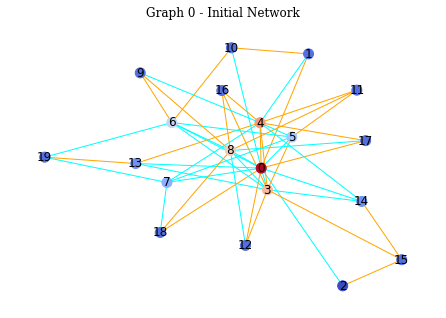

Topology File for Graph 0 saved successfully.


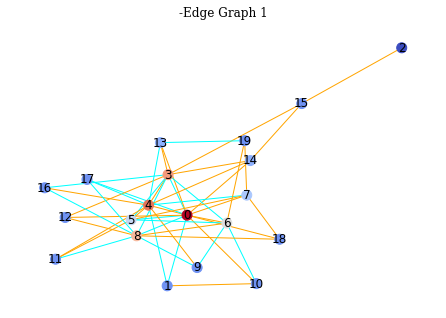

<Figure size 3600x2400 with 0 Axes>

Topology File for -Edge Graph 1 saved successfully.


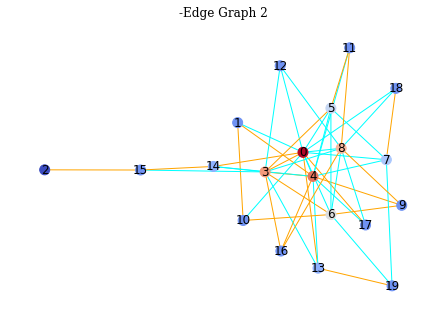

<Figure size 3600x2400 with 0 Axes>

Topology File for -Edge Graph 2 saved successfully.


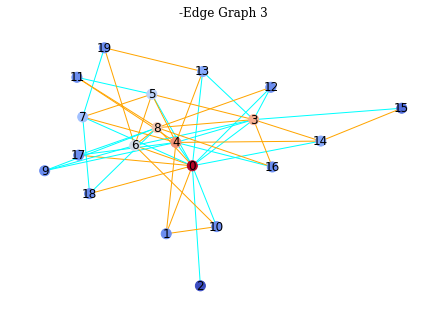

<Figure size 3600x2400 with 0 Axes>

Topology File for -Edge Graph 3 saved successfully.


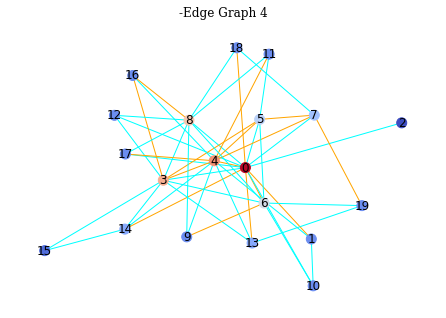

<Figure size 3600x2400 with 0 Axes>

Topology File for -Edge Graph 4 saved successfully.


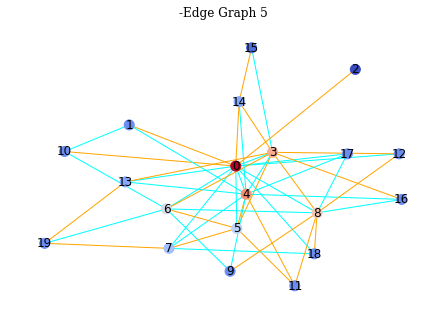

<Figure size 3600x2400 with 0 Axes>

Topology File for -Edge Graph 5 saved successfully.


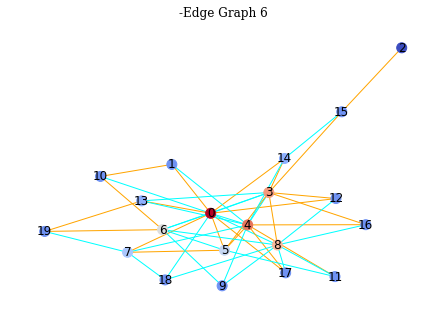

<Figure size 3600x2400 with 0 Axes>

Topology File for -Edge Graph 6 saved successfully.


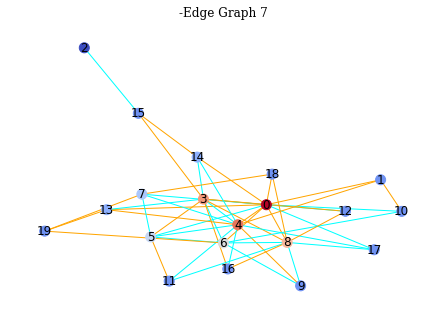

<Figure size 3600x2400 with 0 Axes>

Topology File for -Edge Graph 7 saved successfully.


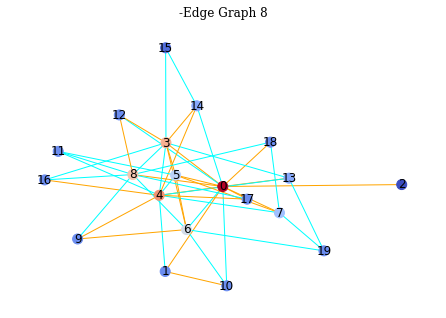

<Figure size 3600x2400 with 0 Axes>

Topology File for -Edge Graph 8 saved successfully.


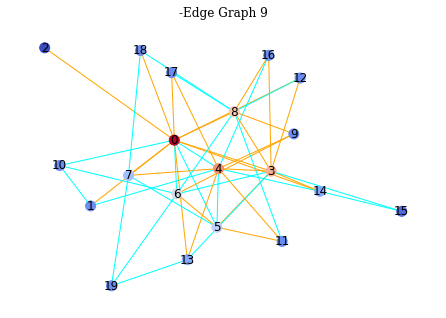

<Figure size 3600x2400 with 0 Axes>

Topology File for -Edge Graph 9 saved successfully.


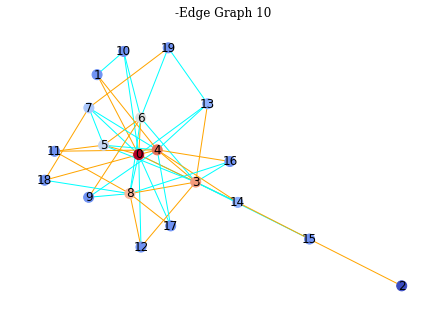

<Figure size 3600x2400 with 0 Axes>

Topology File for -Edge Graph 10 saved successfully.


/tmp/ipykernel_21071/1789493418.py:137: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  existing_nodes = random.sample(G_modified.nodes(), m)


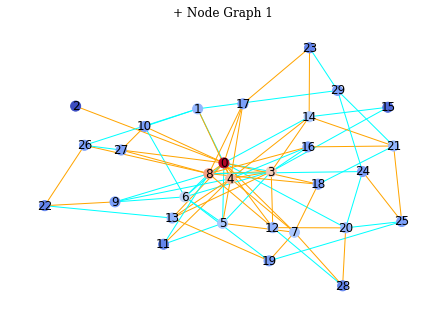

Topology File for +Node Graph 1 saved successfully.


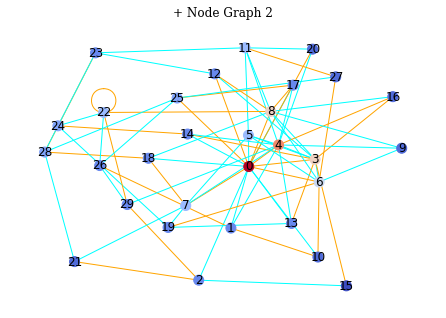

Topology File for +Node Graph 2 saved successfully.


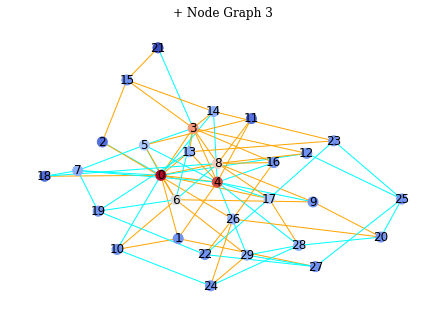

Topology File for +Node Graph 3 saved successfully.


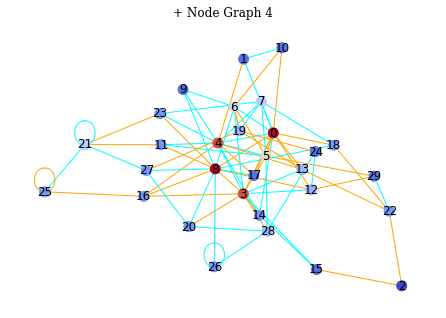

Topology File for +Node Graph 4 saved successfully.


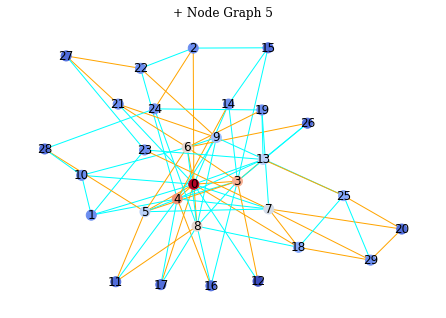

Topology File for +Node Graph 5 saved successfully.


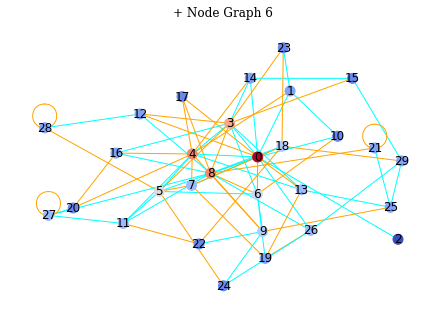

Topology File for +Node Graph 6 saved successfully.


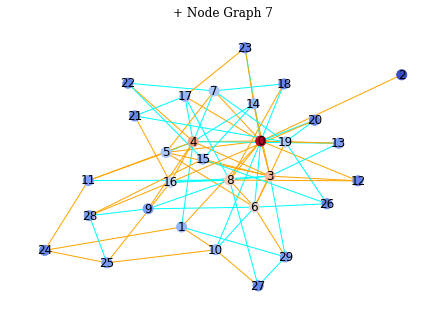

Topology File for +Node Graph 7 saved successfully.


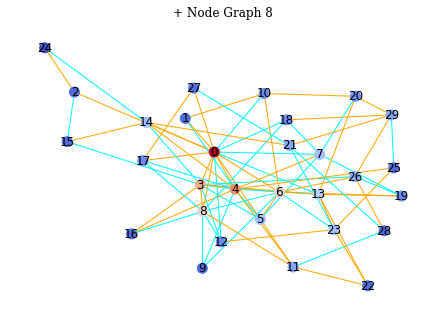

Topology File for +Node Graph 8 saved successfully.


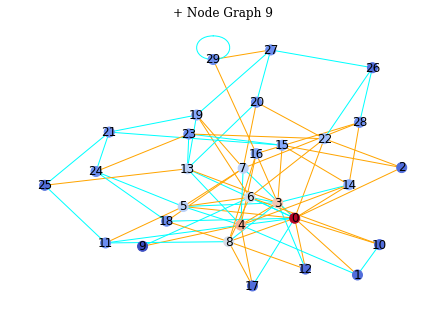

Topology File for +Node Graph 9 saved successfully.


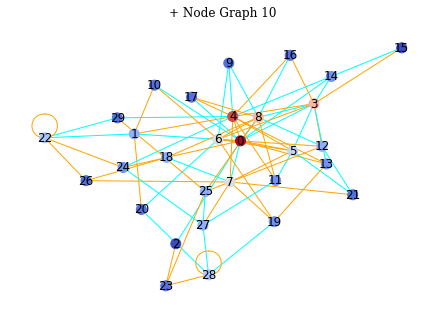

Topology File for +Node Graph 10 saved successfully.


<Figure size 432x288 with 0 Axes>

In [ ]:
n = 20  # Number of nodes
m = 3   # Number of edges to attach from a new node
num_graphs = 10  # Number of graphs to generate

# Generate Barabási-Albert random network
G = nx.barabasi_albert_graph(n, m)

# Assign scores to each edge
for u, v in G.edges():
    G[u][v]['score'] = random.choice([1, 2])

# Extract scores of each edge
edge_scores = [G[u][v]['score'] for u, v in G.edges()]
edge_colors = {1: 'cyan', 2: 'orange'}
edge_color_list = [edge_colors[G[u][v]['score']] for u, v in G.edges()]

# Calculate the degree of each node
degrees = G.degree()

# Calculate color values based on the node degree
max_degree = max(dict(degrees).values())
node_colors = [degree / max_degree for _, degree in degrees]

# Draw the initial network with nodes colored by their degree
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, node_color=node_colors, edge_color=edge_color_list, cmap='coolwarm')

# Show the initial plot as "Graph 0"
plt.title("Graph 0 - Initial Network")
image_file_path = "/home/sanjana/Downloads/RACIPE/Periphery/c/graph_c_0.png"  # Image file path
plt.savefig(image_file_path)
plt.show()

# Clear the figure
plt.clf()

# Create the Topology File content for graph 0
topo_lines_original = []
for u, v, attr in G.edges(data=True):
    u, v, score = u + 1, v + 1, attr['score']  # Adjust node numbering to start from 1
    line = f"{u} {v} {score}"
    topo_lines_original.append(line)

# Save the Topology File for graph 0
topo_file_path_original = "/home/sanjana/Downloads/RACIPE/Periphery/c/graph_c_0.topo"
with open(topo_file_path_original, "w") as topo_file_original:
    topo_file_original.write("\n".join(topo_lines_original))

print("Topology File for Graph 0 saved successfully.")

## Removing edges

for i in range(1, num_graphs + 1):
    # Create a copy of the original graph
    G_modified = G.copy()

    # Calculate the degree of each node
    degrees_modified = G_modified.degree()

    # Find the node(s) with the lowest degree
    min_degree_modified = min(dict(degrees_modified).values())
    lowest_degree_nodes_modified = [node for node, degree in degrees_modified if degree == min_degree_modified]

    if len(lowest_degree_nodes_modified) > 0:
        # Randomly choose a node from the lowest degree nodes
        node_to_remove = random.choice(lowest_degree_nodes_modified)

        # Find the edges connected to the chosen node
        edges_to_remove = list(G_modified.edges(node_to_remove))

        if len(edges_to_remove) > 0:
            # Randomly select an edge to remove
            edge_to_remove = random.choice(edges_to_remove)

            # Remove the chosen edge
            G_modified.remove_edge(*edge_to_remove)

    # Assign scores to each edge
    for u, v in G_modified.edges():
        G_modified[u][v]['score'] = random.choice([1, 2])

    # Extract scores of each edge
    edge_scores_modified = [G_modified[u][v]['score'] for u, v in G_modified.edges()]
    edge_color_list_modified = [edge_colors[G_modified[u][v]['score']] for u, v in G_modified.edges()]

    # Calculate color values based on the node degree
    max_degree_modified = max(dict(degrees_modified).values())
    node_colors_modified = [degree / max_degree_modified for _, degree in degrees_modified]

    # Draw the modified network with nodes colored by their degree
    pos_modified = nx.spring_layout(G_modified)
    nx.draw(G_modified, pos_modified, with_labels=True, node_size=100, node_color=node_colors_modified, edge_color=edge_color_list_modified, cmap='coolwarm')

        # Show the plot for the current graph
    image_file_path = f"/home/sanjana/Downloads/RACIPE/Periphery/c/-edge_graph_c_{i}.png"  # Image file path
    plt.title(f"-Edge Graph {i}")
    plt.savefig(image_file_path)
    plt.figure(figsize=(12, 8), dpi=300)
    plt.show()

    # Clear the figure
    plt.clf()

    # Create the Topology File content
    topo_lines_modified = []
    for u, v, attr in G_modified.edges(data=True):
        u, v, score = u + 1, v + 1, attr['score']  # Adjust node numbering to start from 1
        line = f"{u} {v} {score}"
        topo_lines_modified.append(line)

    # Save the Topology File
    topo_file_path_modified = f"/home/sanjana/Downloads/RACIPE/Periphery/c/-edge_graph_c_{i}.topo" #for 2 core network
    with open(topo_file_path_modified, "w") as topo_file_modified:
        topo_file_modified.write("\n".join(topo_lines_modified))

    print(f"Topology File for -Edge Graph {i} saved successfully.")

## Adding Nodes

# New network parameters
n_new = 30  # Number of nodes in the new network

# Repeat the process for a larger network size
for i in range(1, num_graphs + 1):
    # Create a copy of the original graph
    G_modified = G.copy()

    # Generate additional nodes for the new network
    new_nodes = list(range(n, n_new))

    # Add the new nodes to the existing network
    G_modified.add_nodes_from(new_nodes)

    # Connect the new nodes to the existing nodes randomly
    for node in new_nodes:
        existing_nodes = random.sample(G_modified.nodes(), m)
        G_modified.add_edges_from([(node, existing_node) for existing_node in existing_nodes])

    # Calculate the degree of each node in the modified network
    degrees_modified = G_modified.degree()

        # Find the node(s) with the lowest degree in the modified network
    min_degree_modified = min(dict(degrees_modified).values())
    lowest_degree_nodes_modified = [node for node, degree in degrees_modified if degree == min_degree_modified]

    if len(lowest_degree_nodes_modified) > 0:
        # Randomly choose a node from the lowest degree nodes
        node_to_remove = random.choice(lowest_degree_nodes_modified)

        # Find the edges connected to the chosen node
        edges_to_remove = list(G_modified.edges(node_to_remove))

        if len(edges_to_remove) > 0:
            # Randomly select an edge to remove
            edge_to_remove = random.choice(edges_to_remove)

            # Remove the chosen edge
            G_modified.remove_edge(*edge_to_remove)

    # Assign scores to each edge in the modified network
    for u, v in G_modified.edges():
        G_modified[u][v]['score'] = random.choice([1, 2])  # Assign default score value of 1

    # Extract scores of each edge in the modified network
    edge_scores_modified = [G_modified[u][v]['score'] for u, v in G_modified.edges()]
    edge_color_list_modified = [edge_colors[G_modified[u][v]['score']] for u, v in G_modified.edges()]

    # Calculate color values based on the node degree in the modified network
    max_degree_modified = max(dict(degrees_modified).values())
    node_colors_modified = [degree / max_degree_modified for _, degree in degrees_modified]

    # Draw the modified network with nodes colored by their degree
    pos_modified = nx.spring_layout(G_modified)
    nx.draw(G_modified, pos_modified, with_labels=True, node_size=100, node_color=node_colors_modified, edge_color=edge_color_list_modified, cmap='coolwarm')

    # Save and display the plot for the current graph
    image_file_path = f"/home/sanjana/Downloads/RACIPE/Periphery/c/+node_graph_c_{i}.png"  # Image file path
    plt.title(f"+ Node Graph {i}")
    plt.savefig(image_file_path)
    plt.show()

    # Clear the figure
    plt.clf()

    # Create the Topology File content for the modified graph
    topo_lines_modified = []
    for u, v, attr in G_modified.edges(data=True):
        u, v, score = u + 1, v + 1, attr['score']  # Adjust node numbering to start from 1
        line = f"{u} {v} {score}"
        topo_lines_modified.append(line)

    # Save the Topology File for the modified graph
    topo_file_path_modified = f"/home/sanjana/Downloads/RACIPE/Periphery/c/+node_graph_c_{i}.topo"
    with open(topo_file_path_modified, "w") as topo_file_modified:
        topo_file_modified.write("\n".join(topo_lines_modified))

    print(f"Topology File for +Node Graph {i} saved successfully.")

# Output and Results

## Total Correlation Visualization

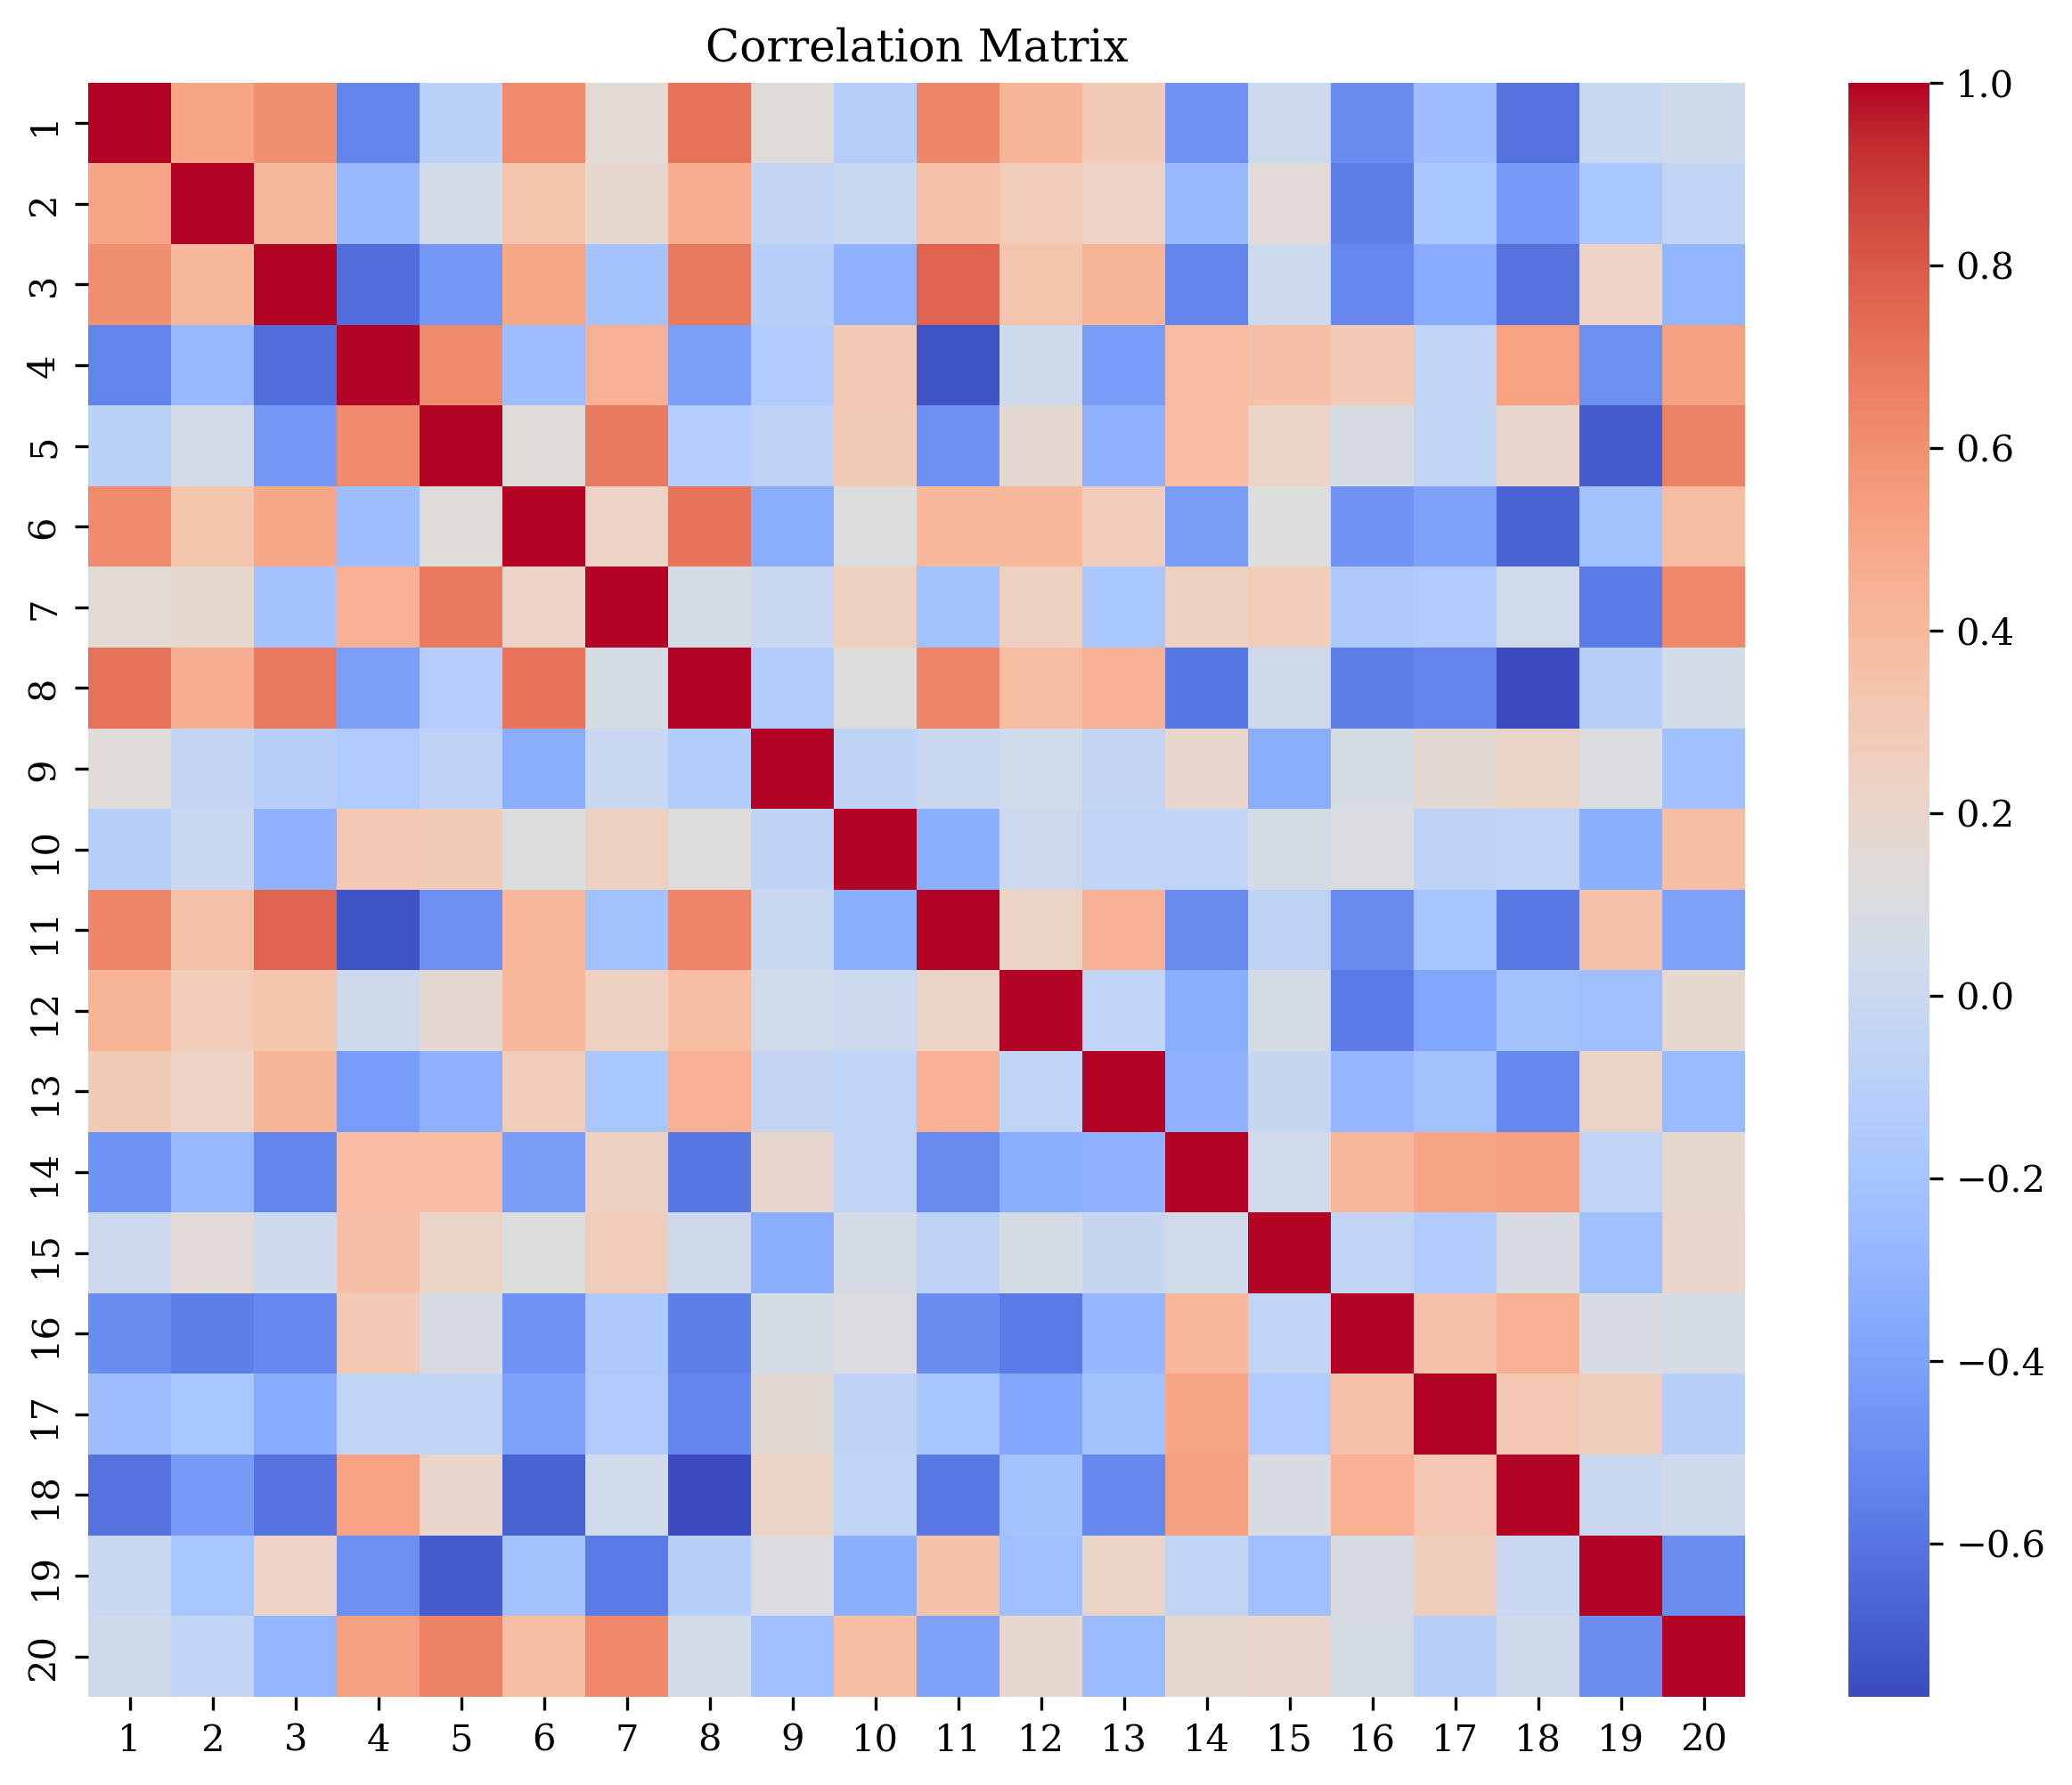

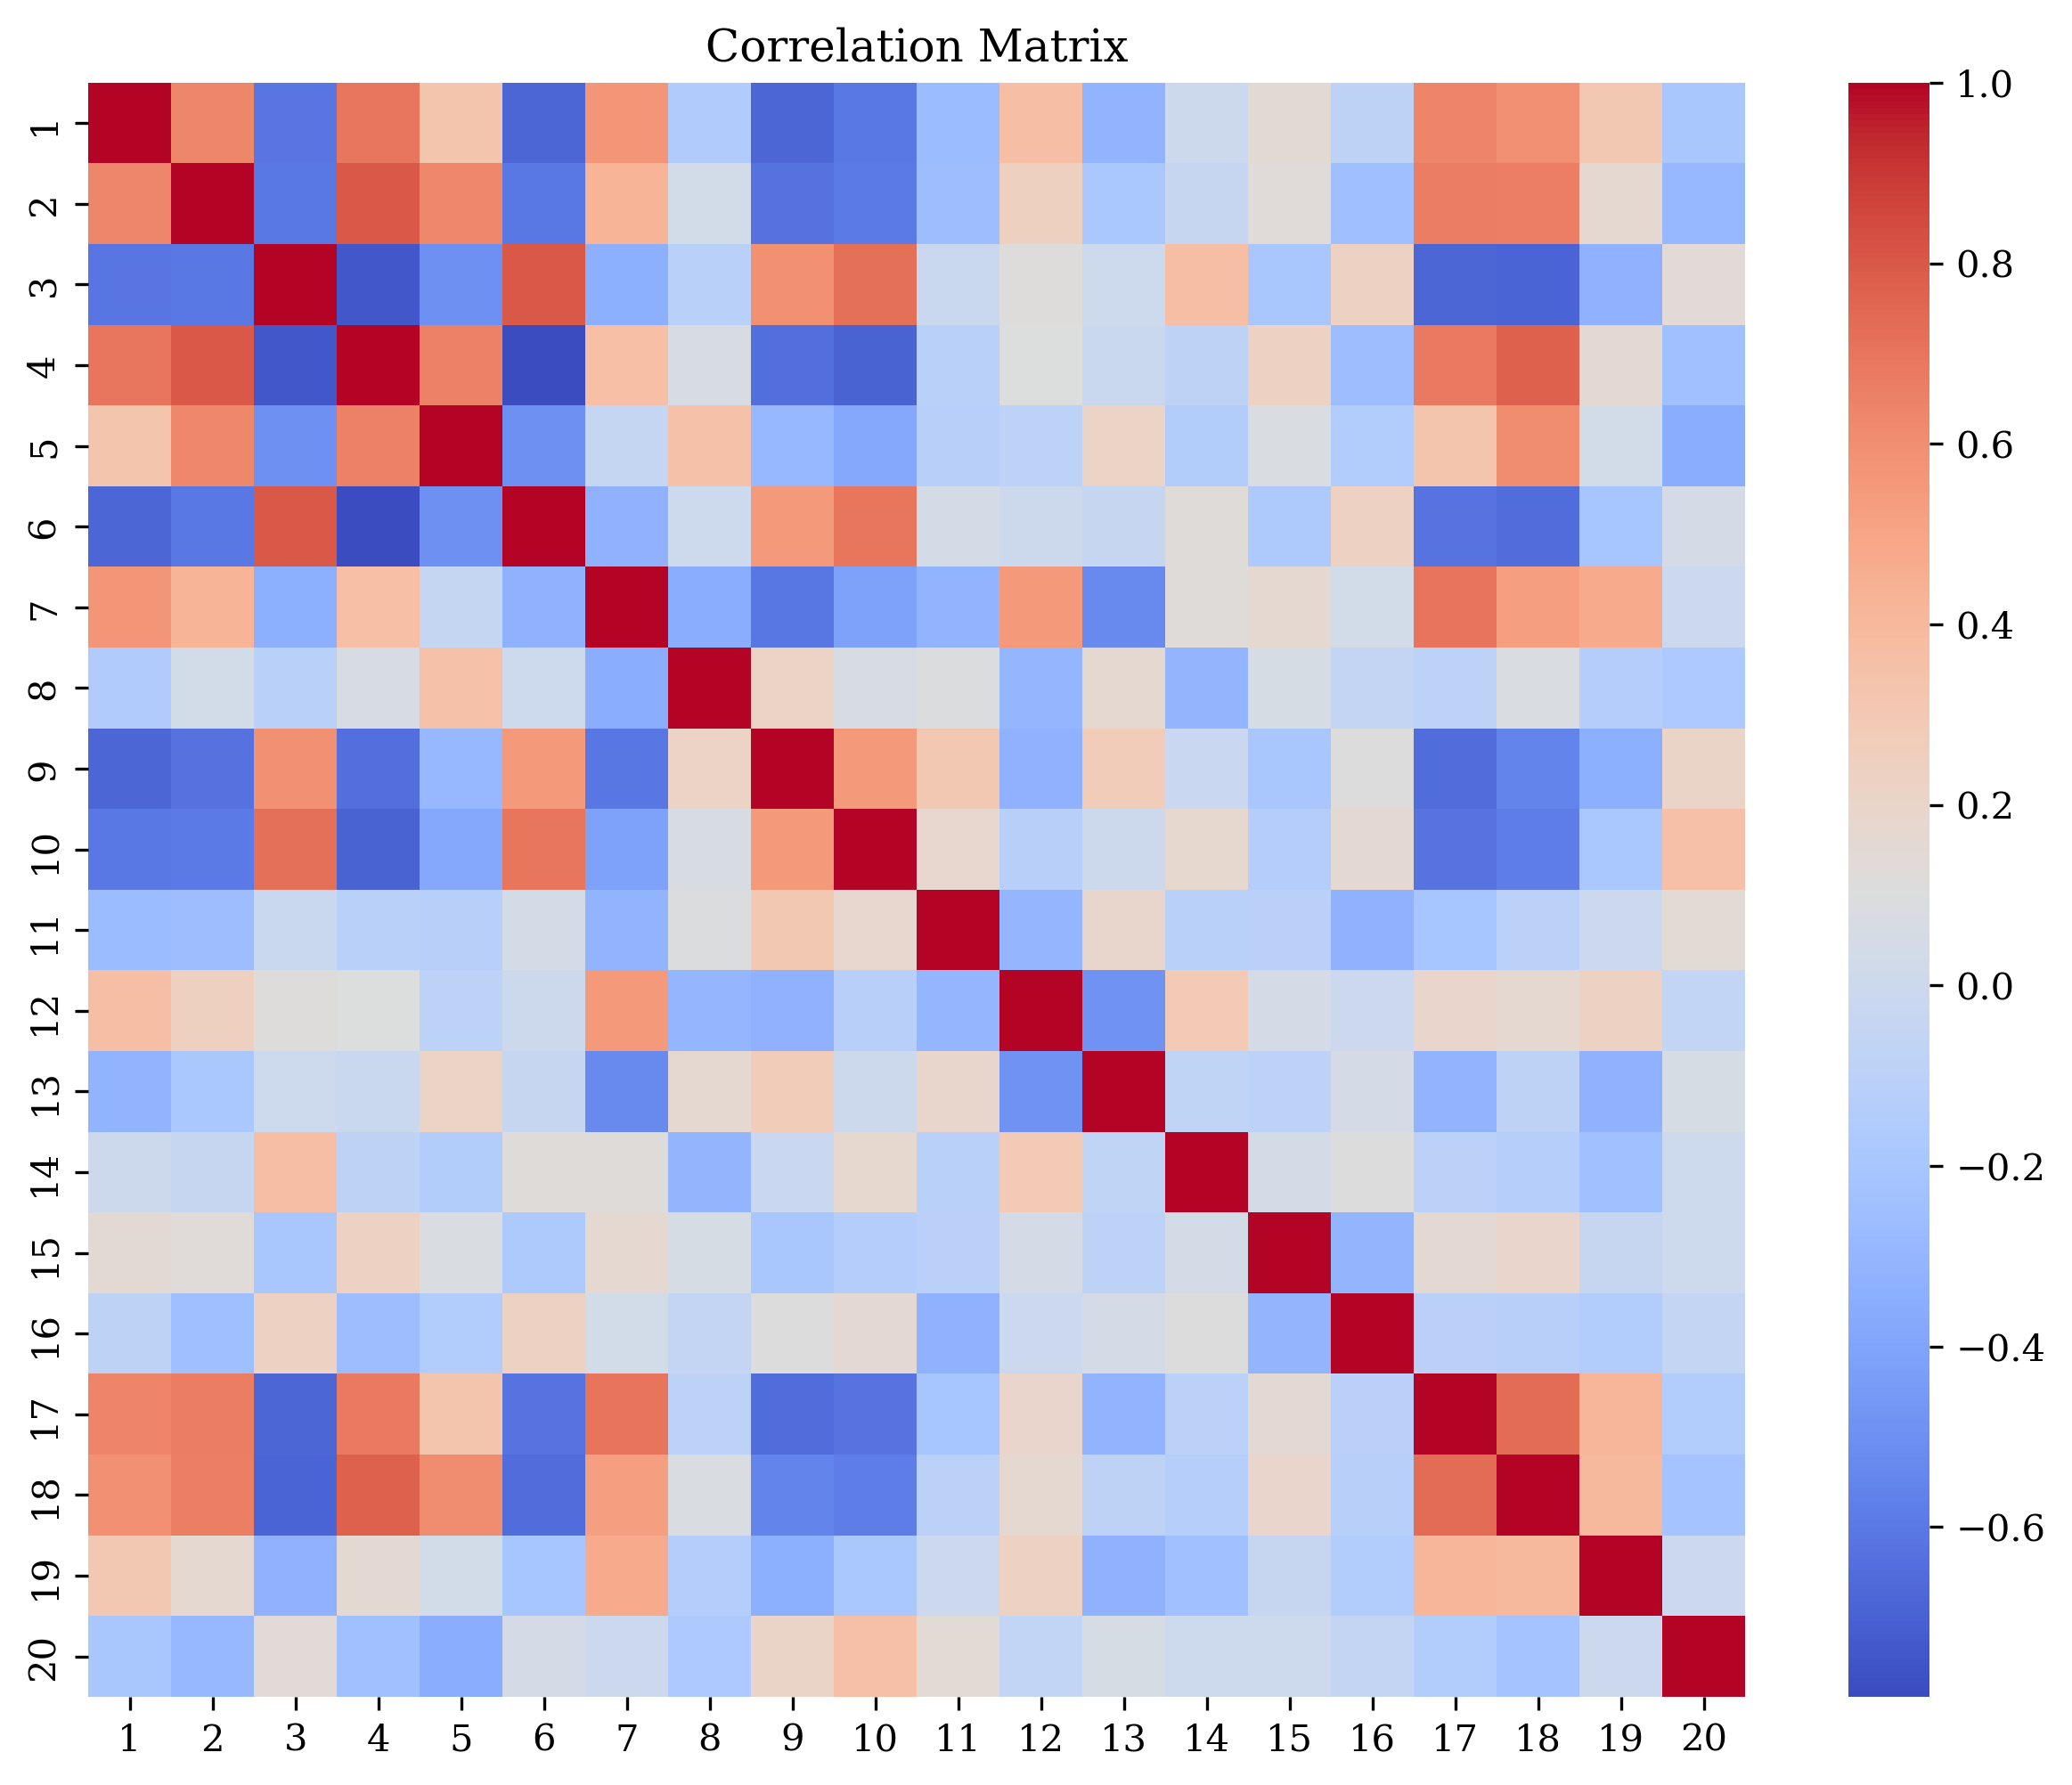

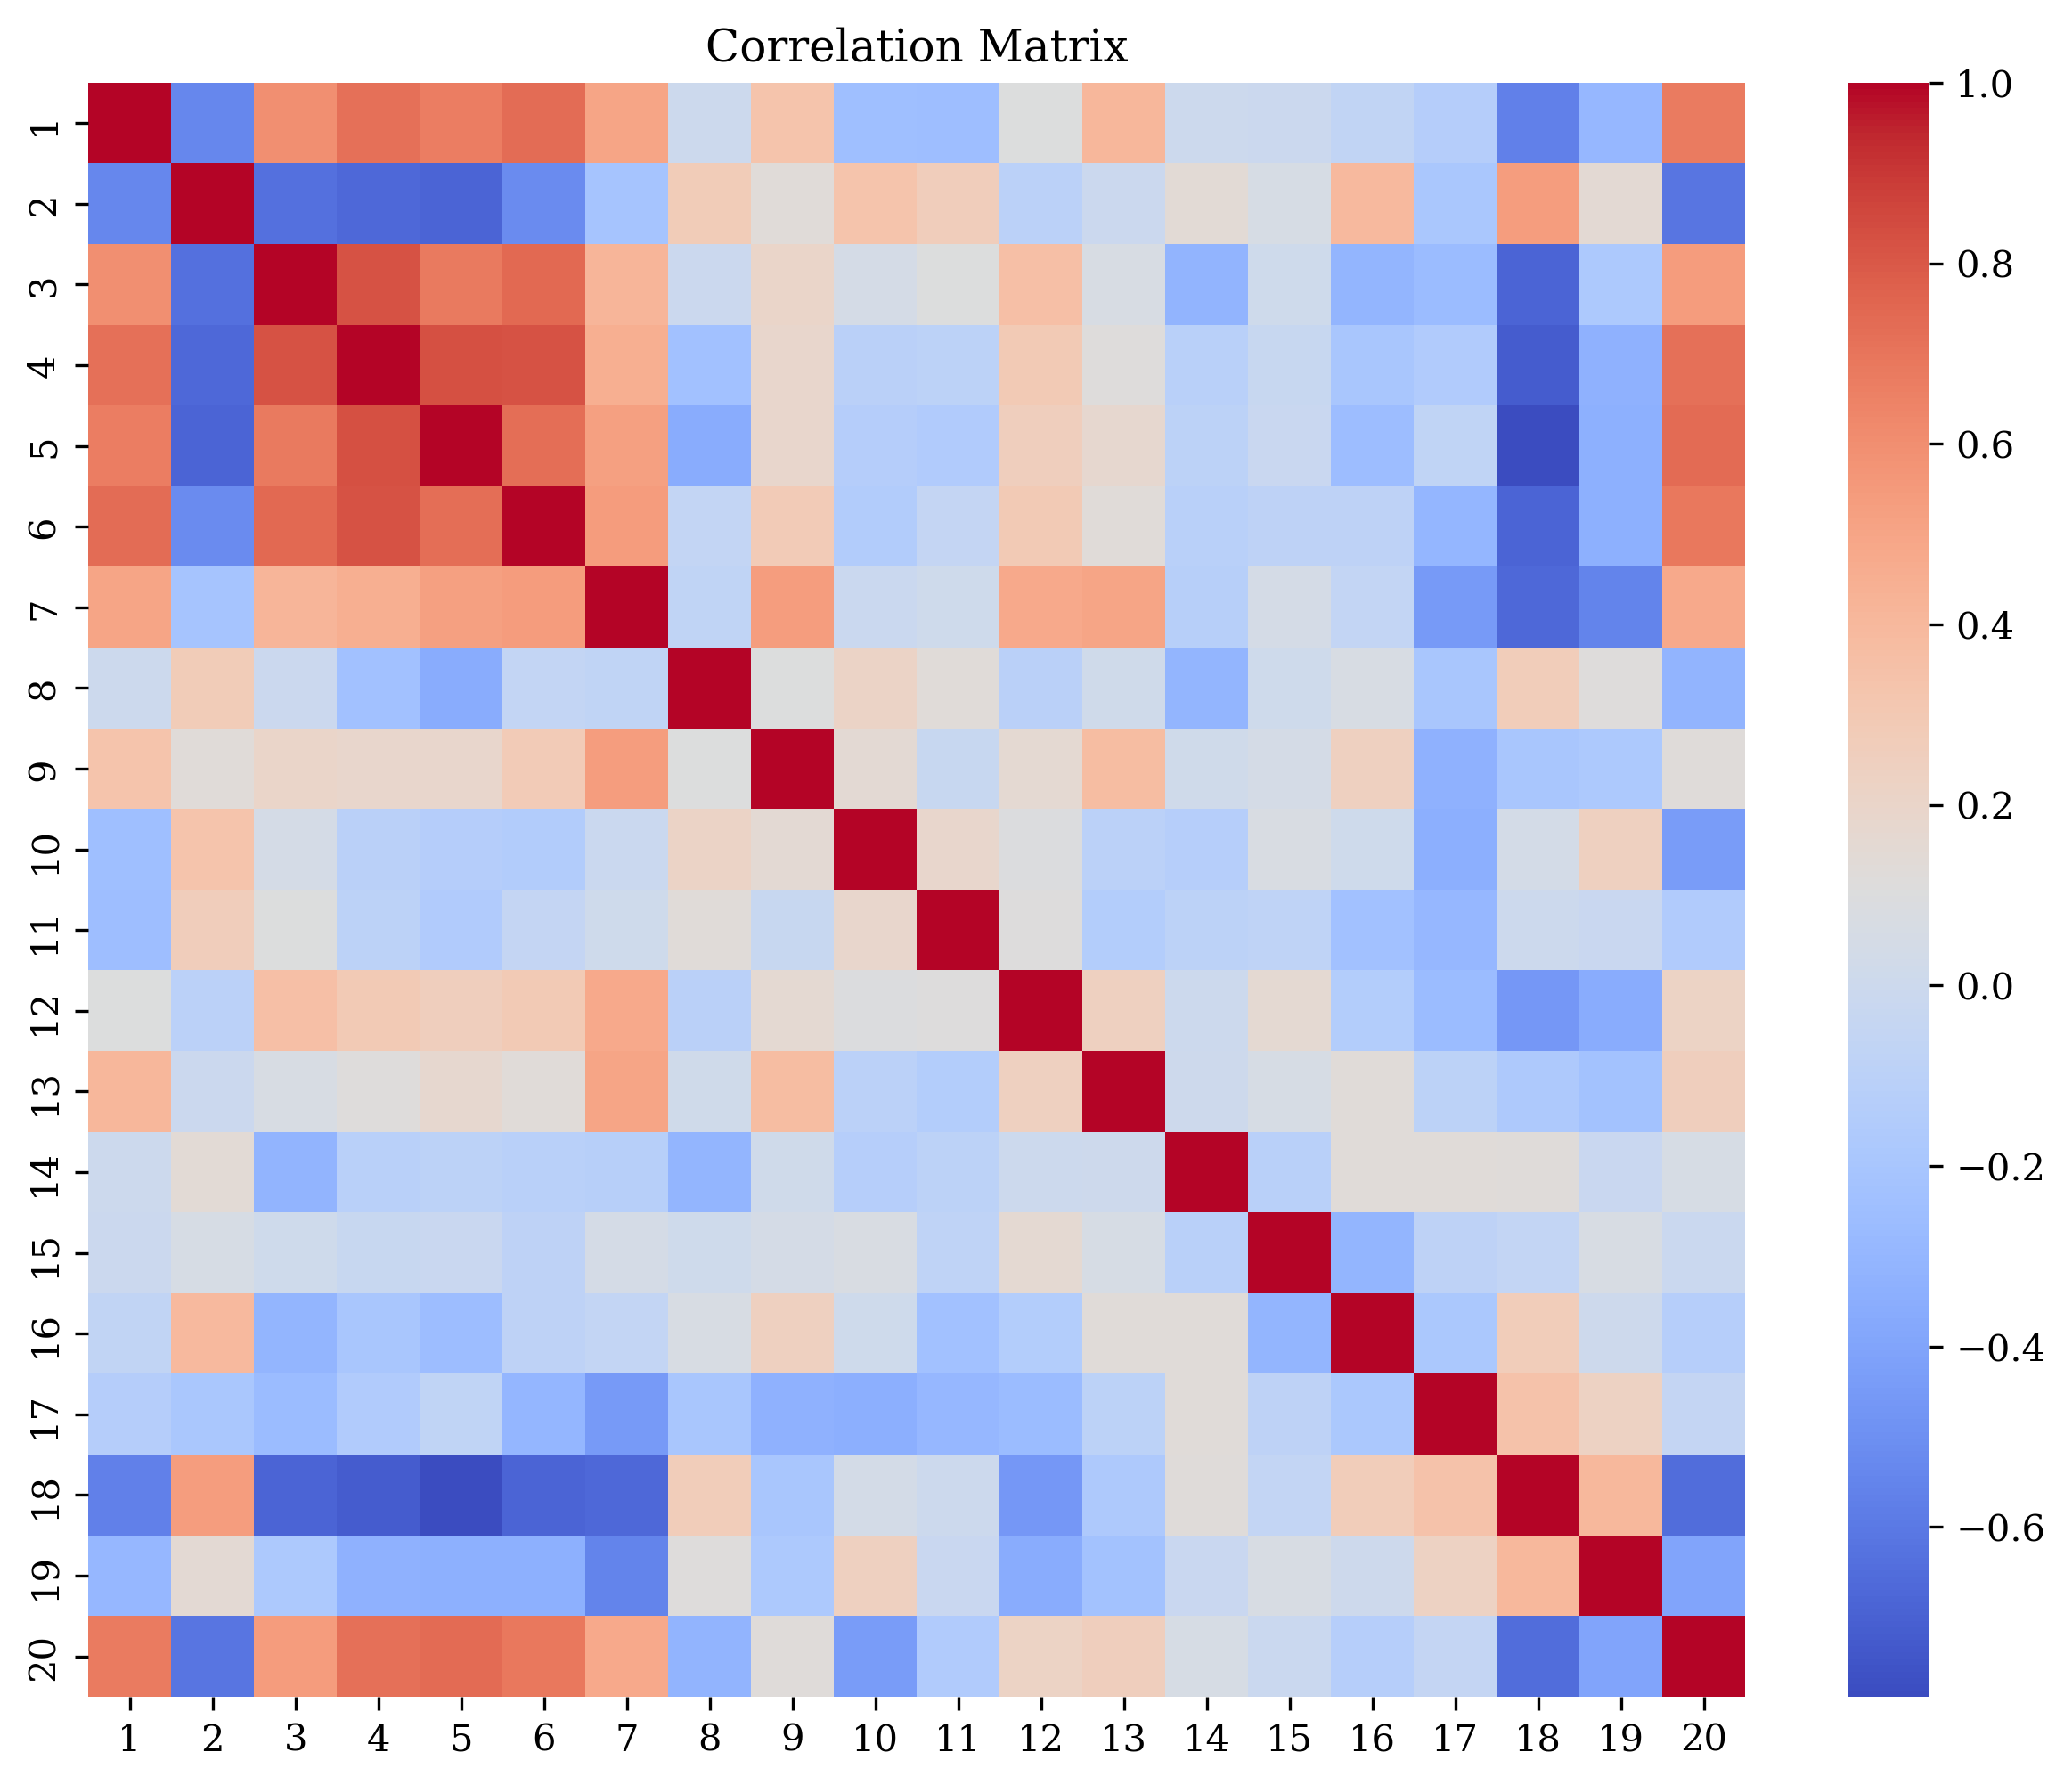

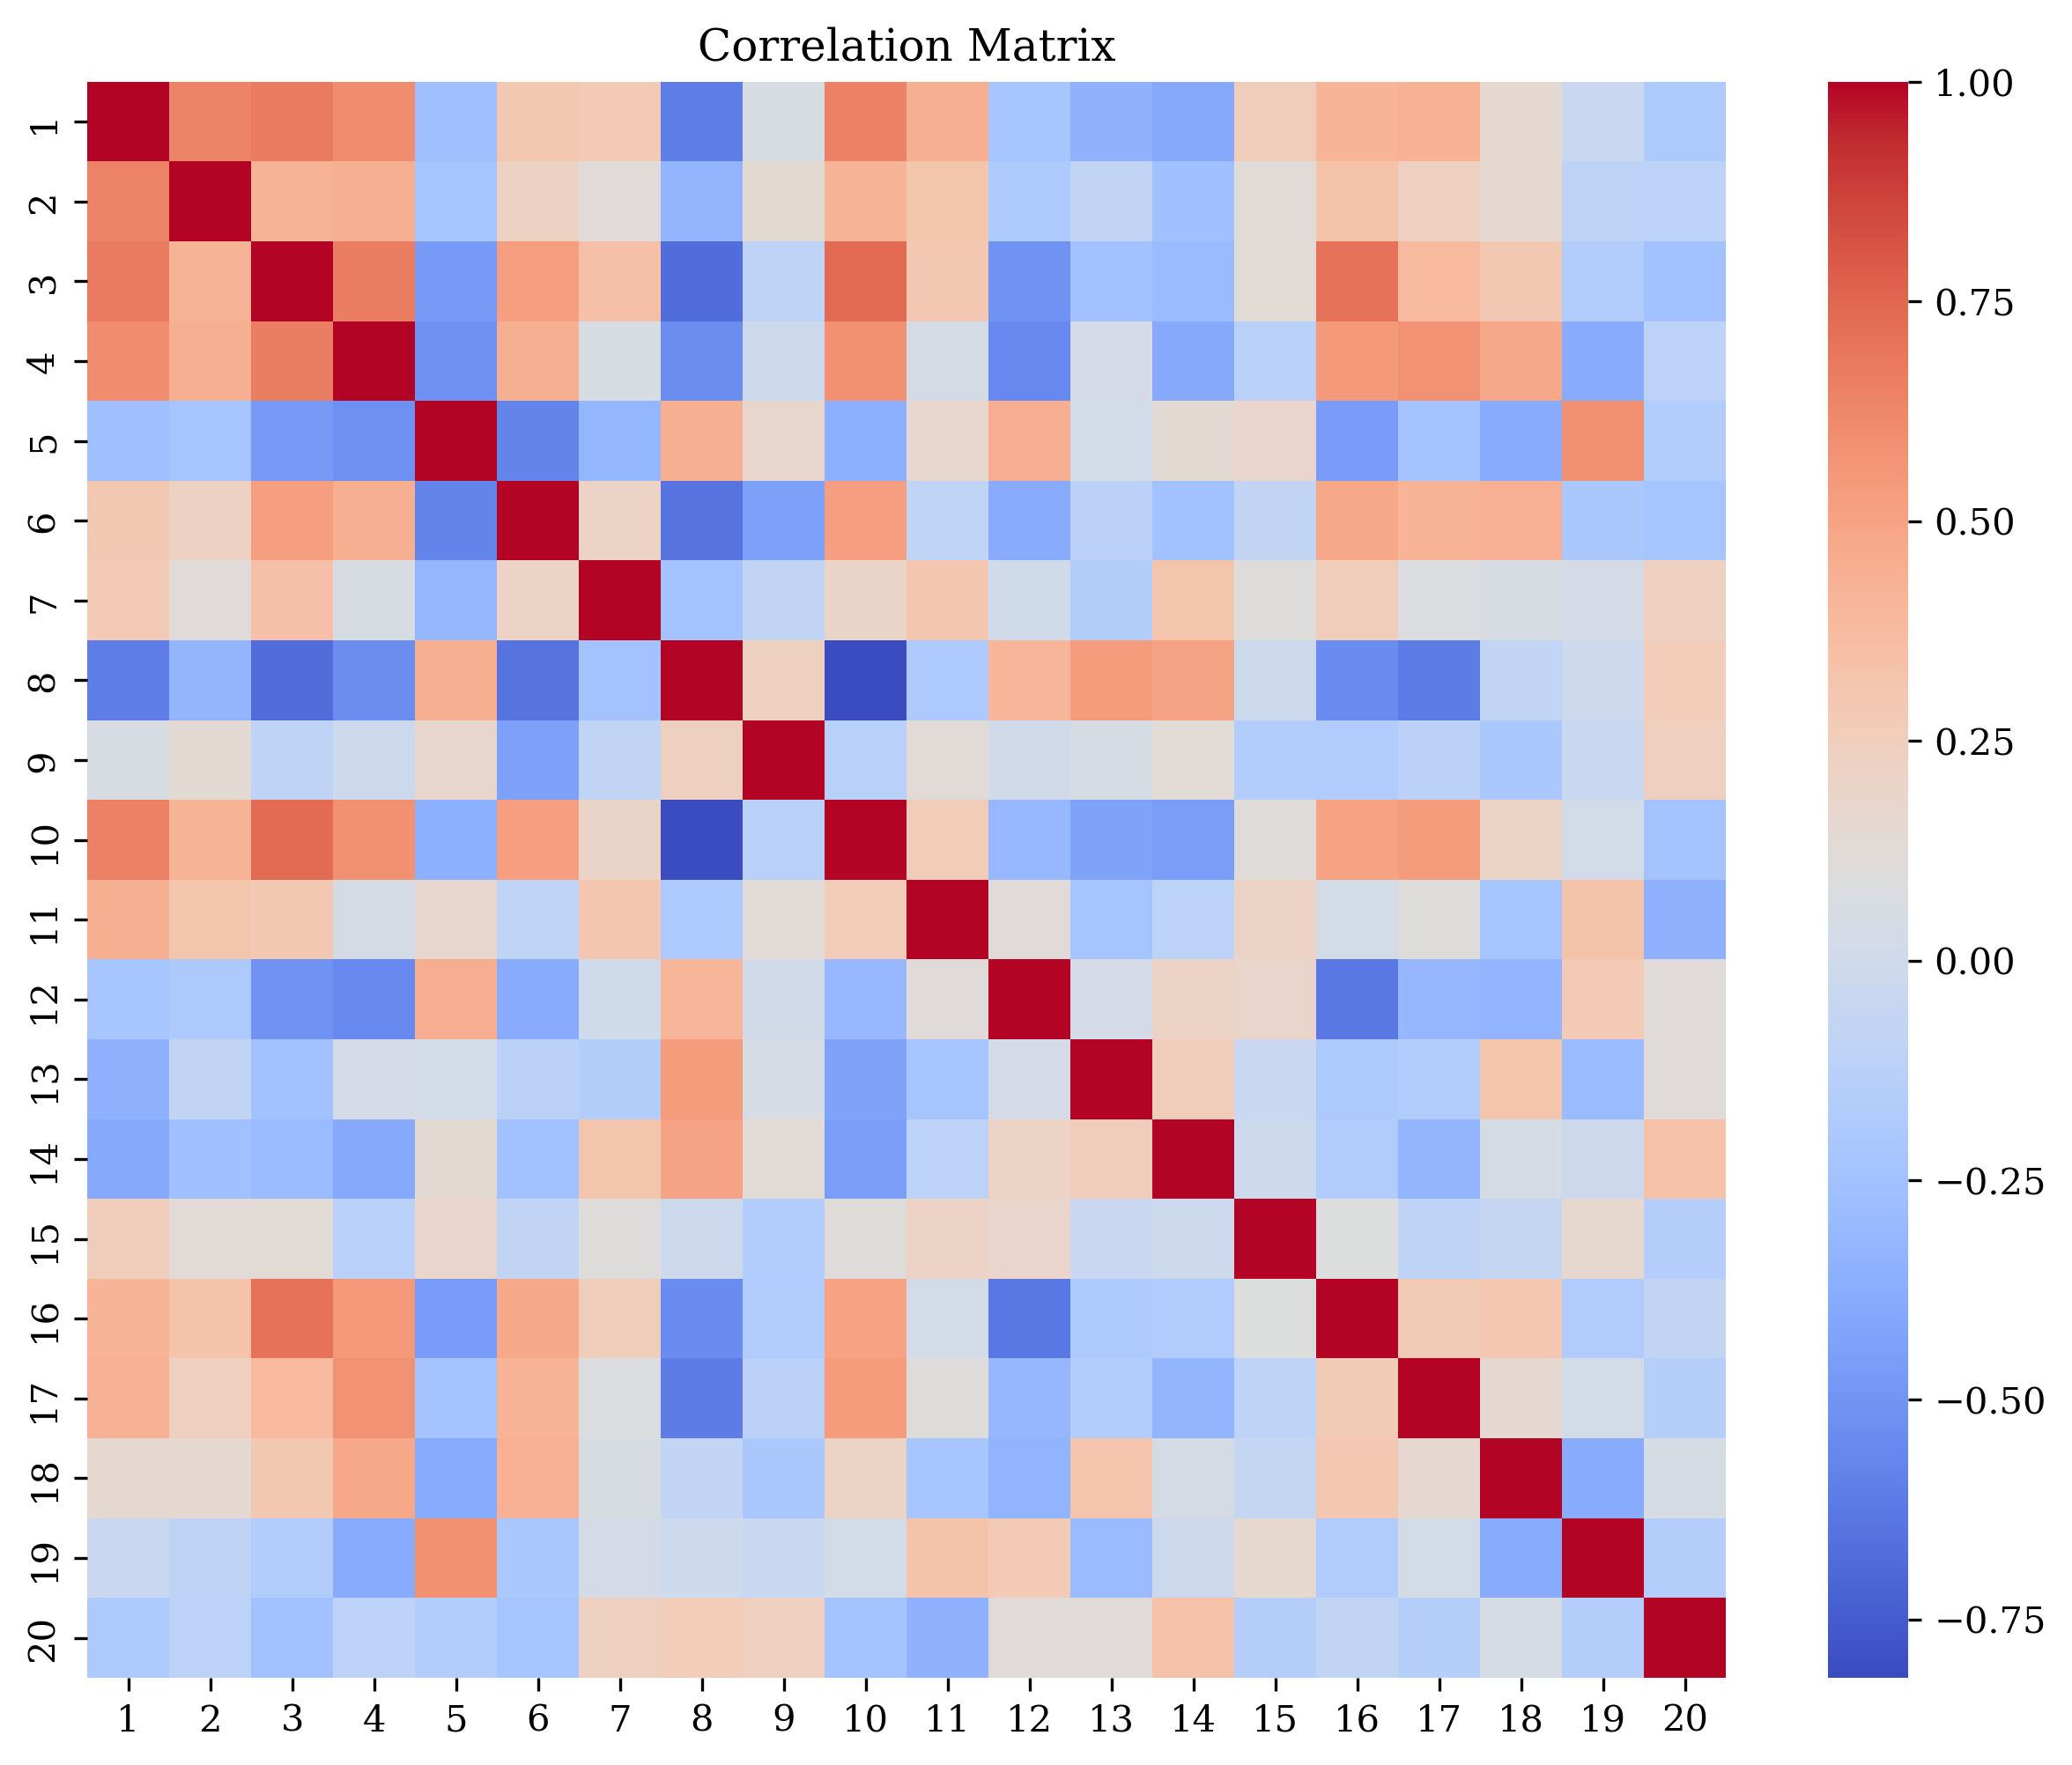

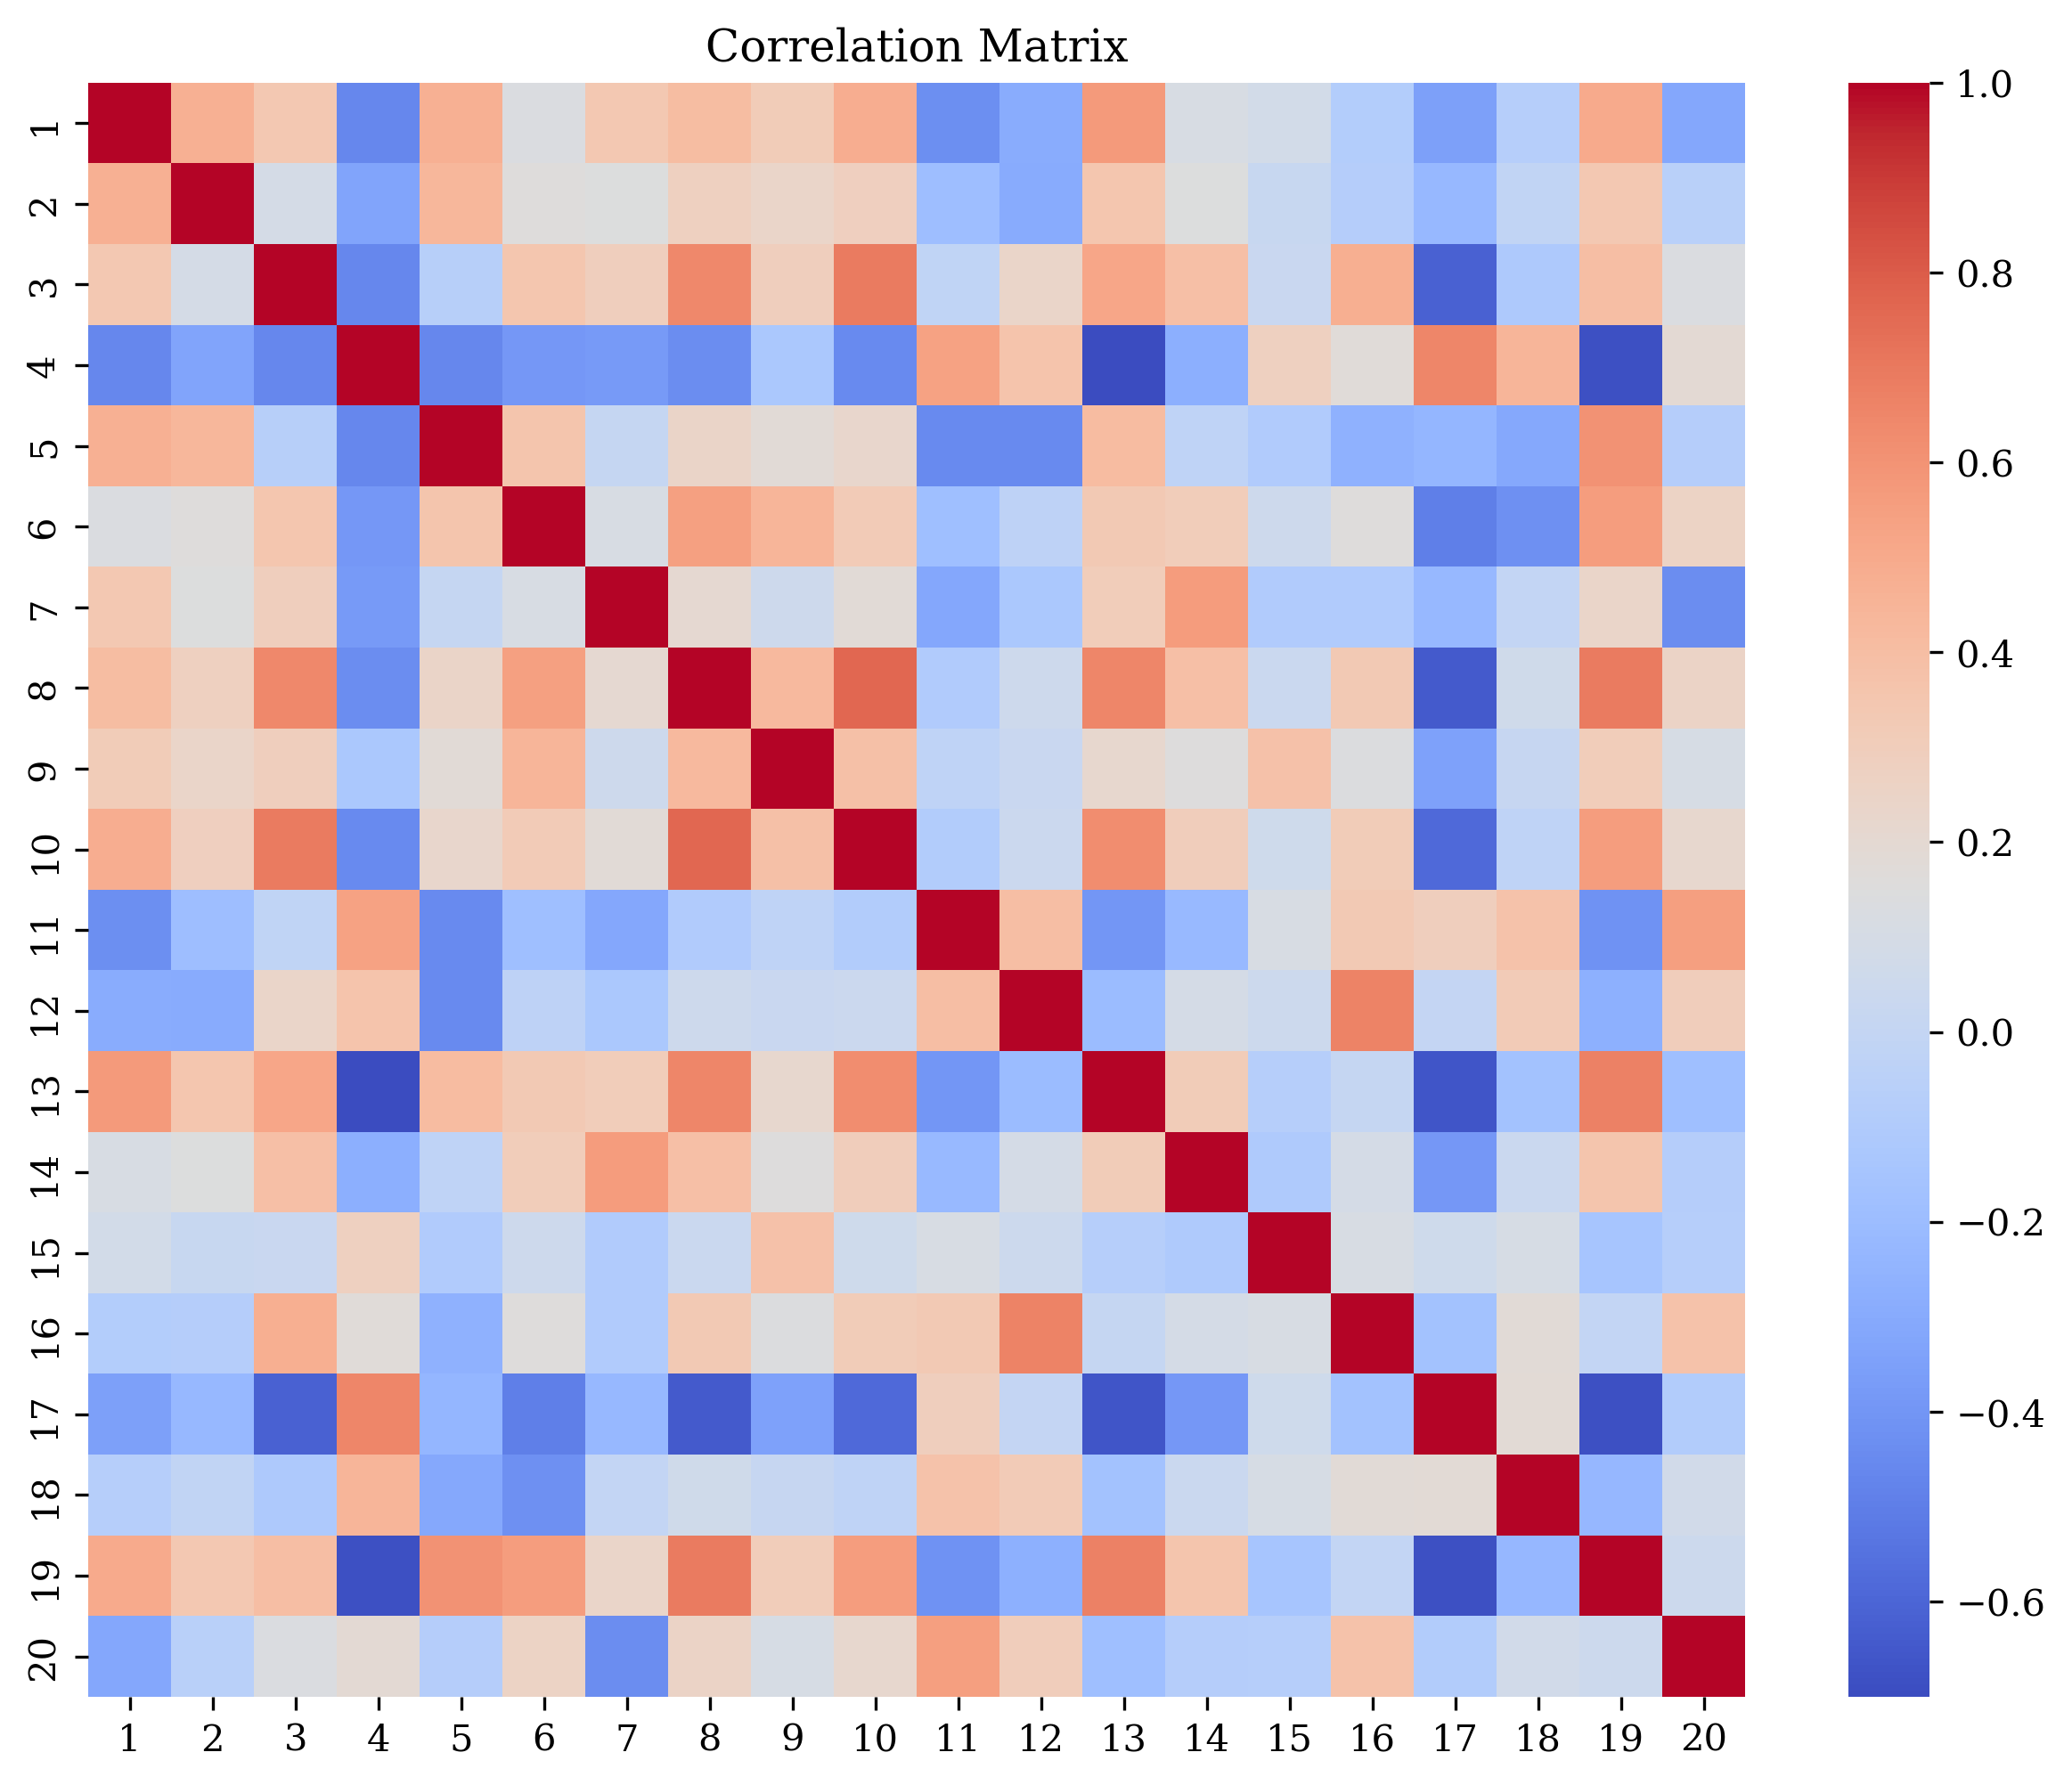

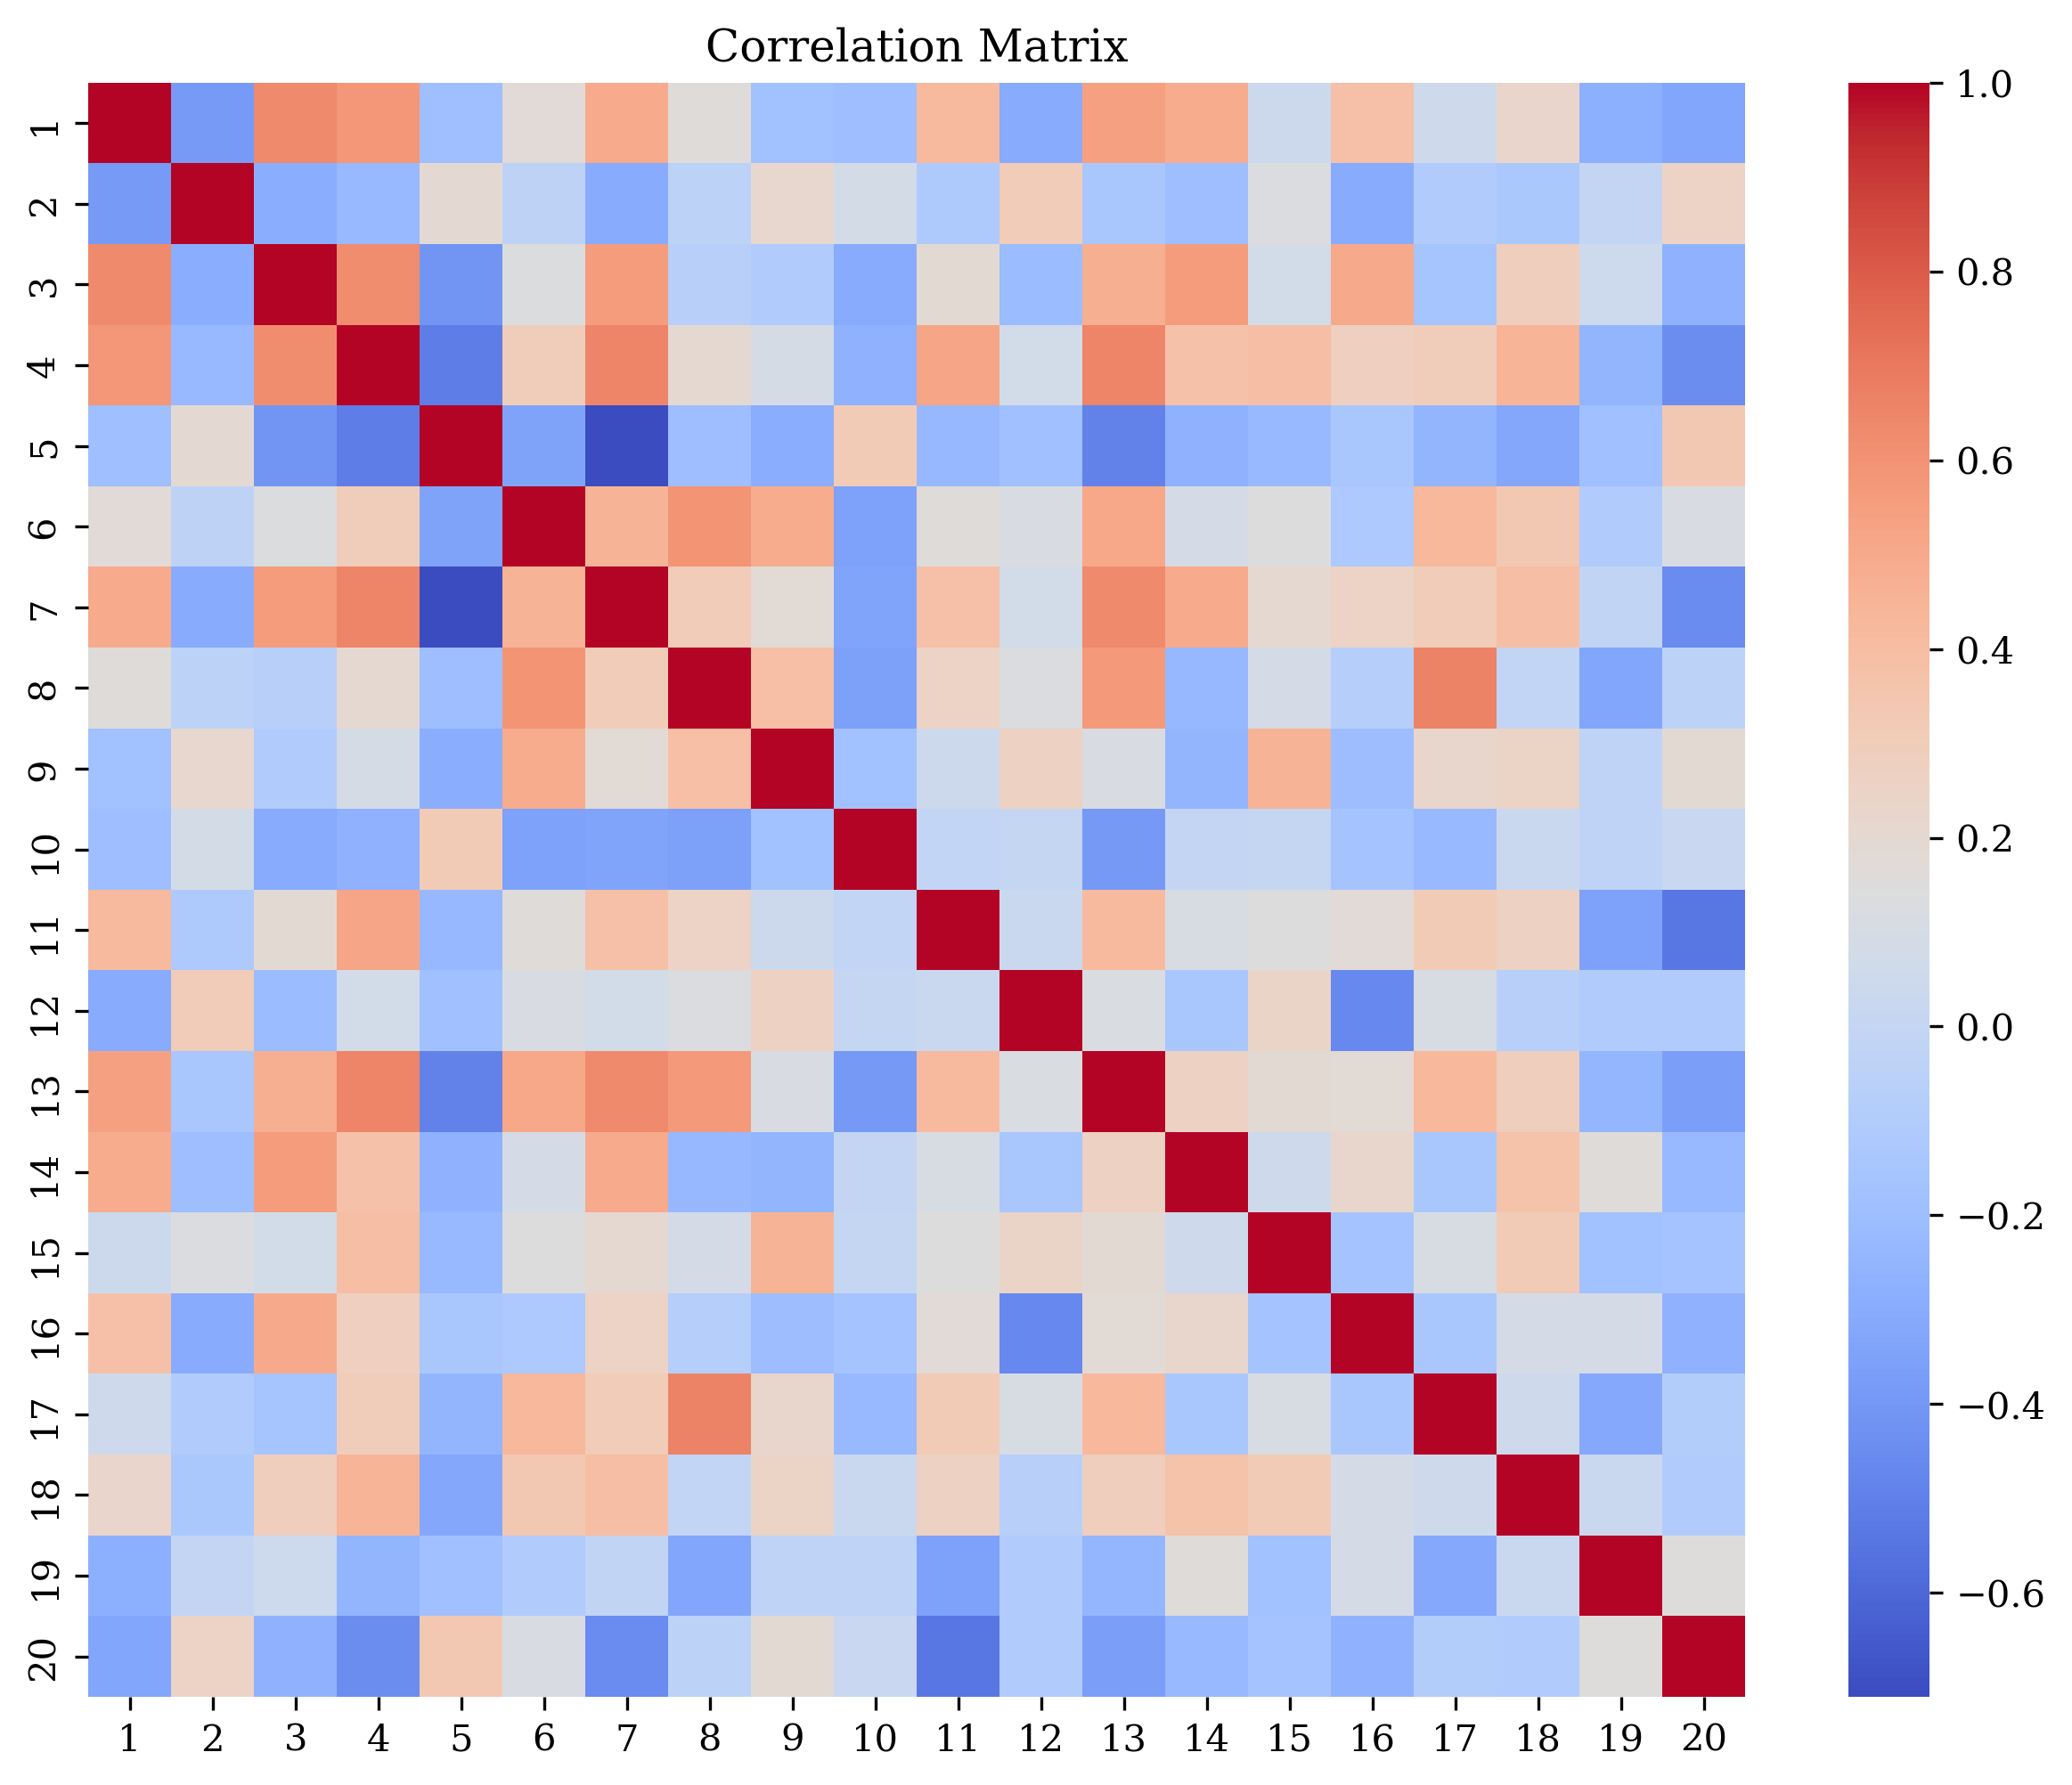

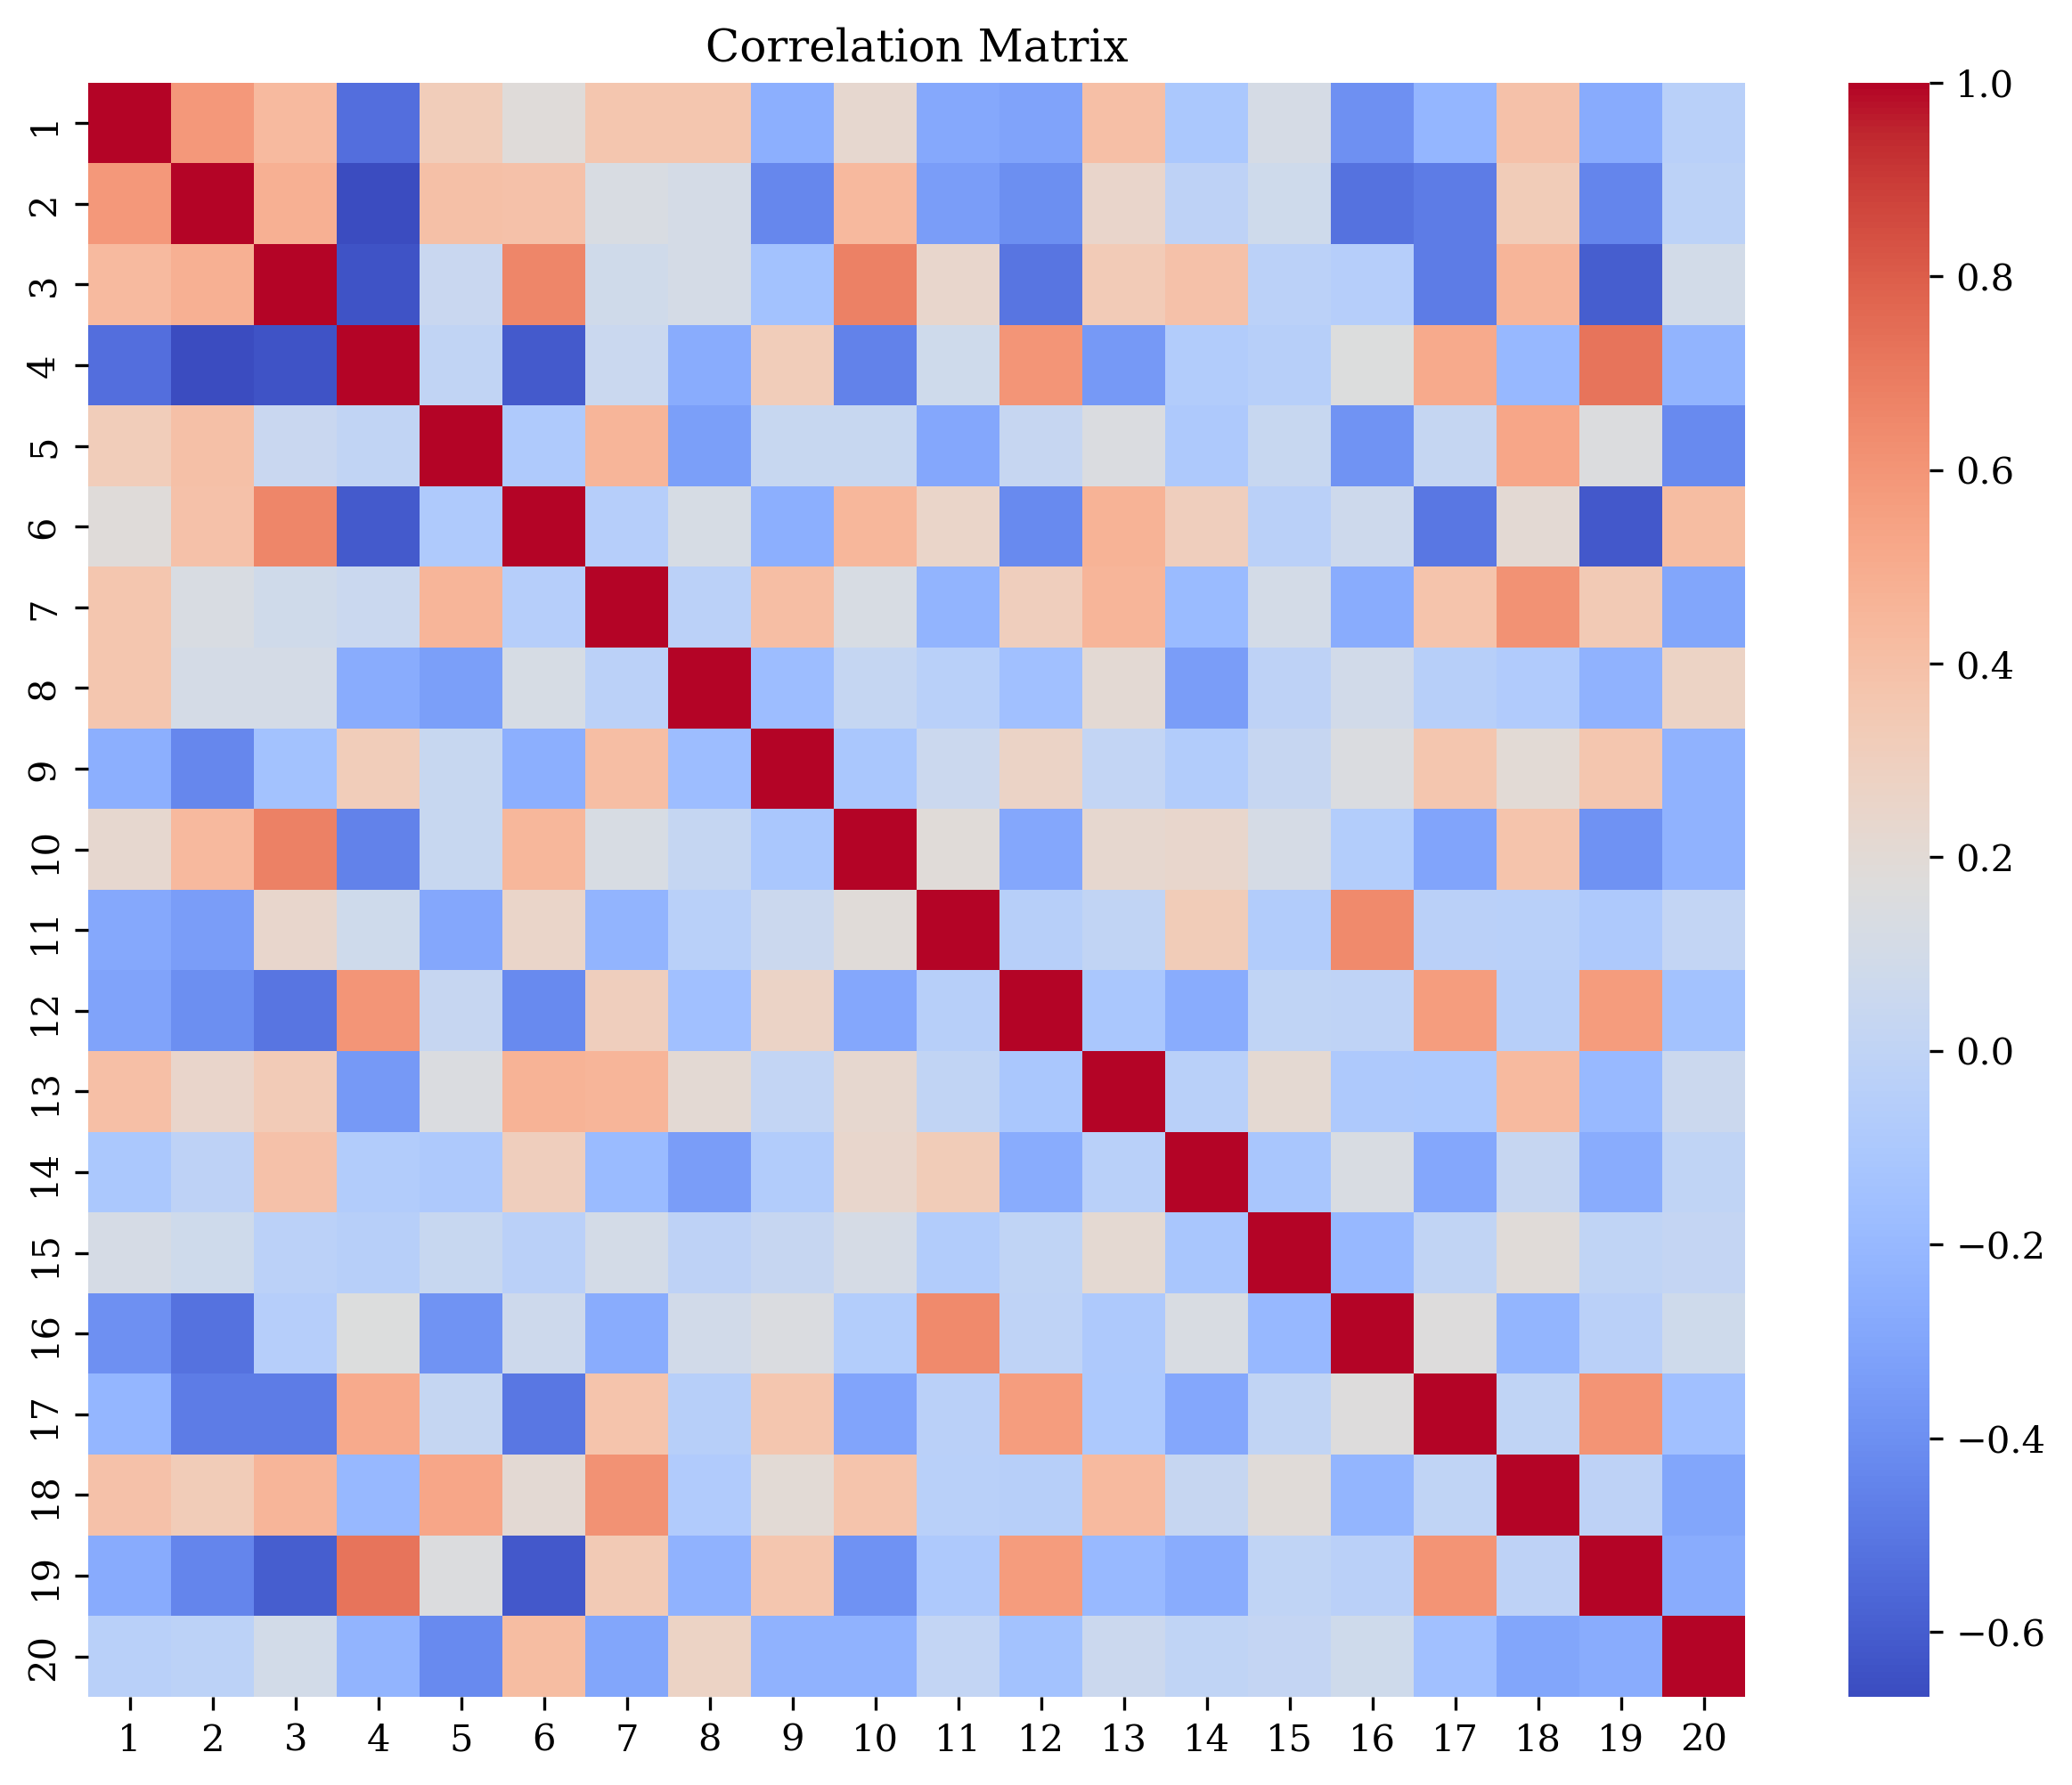

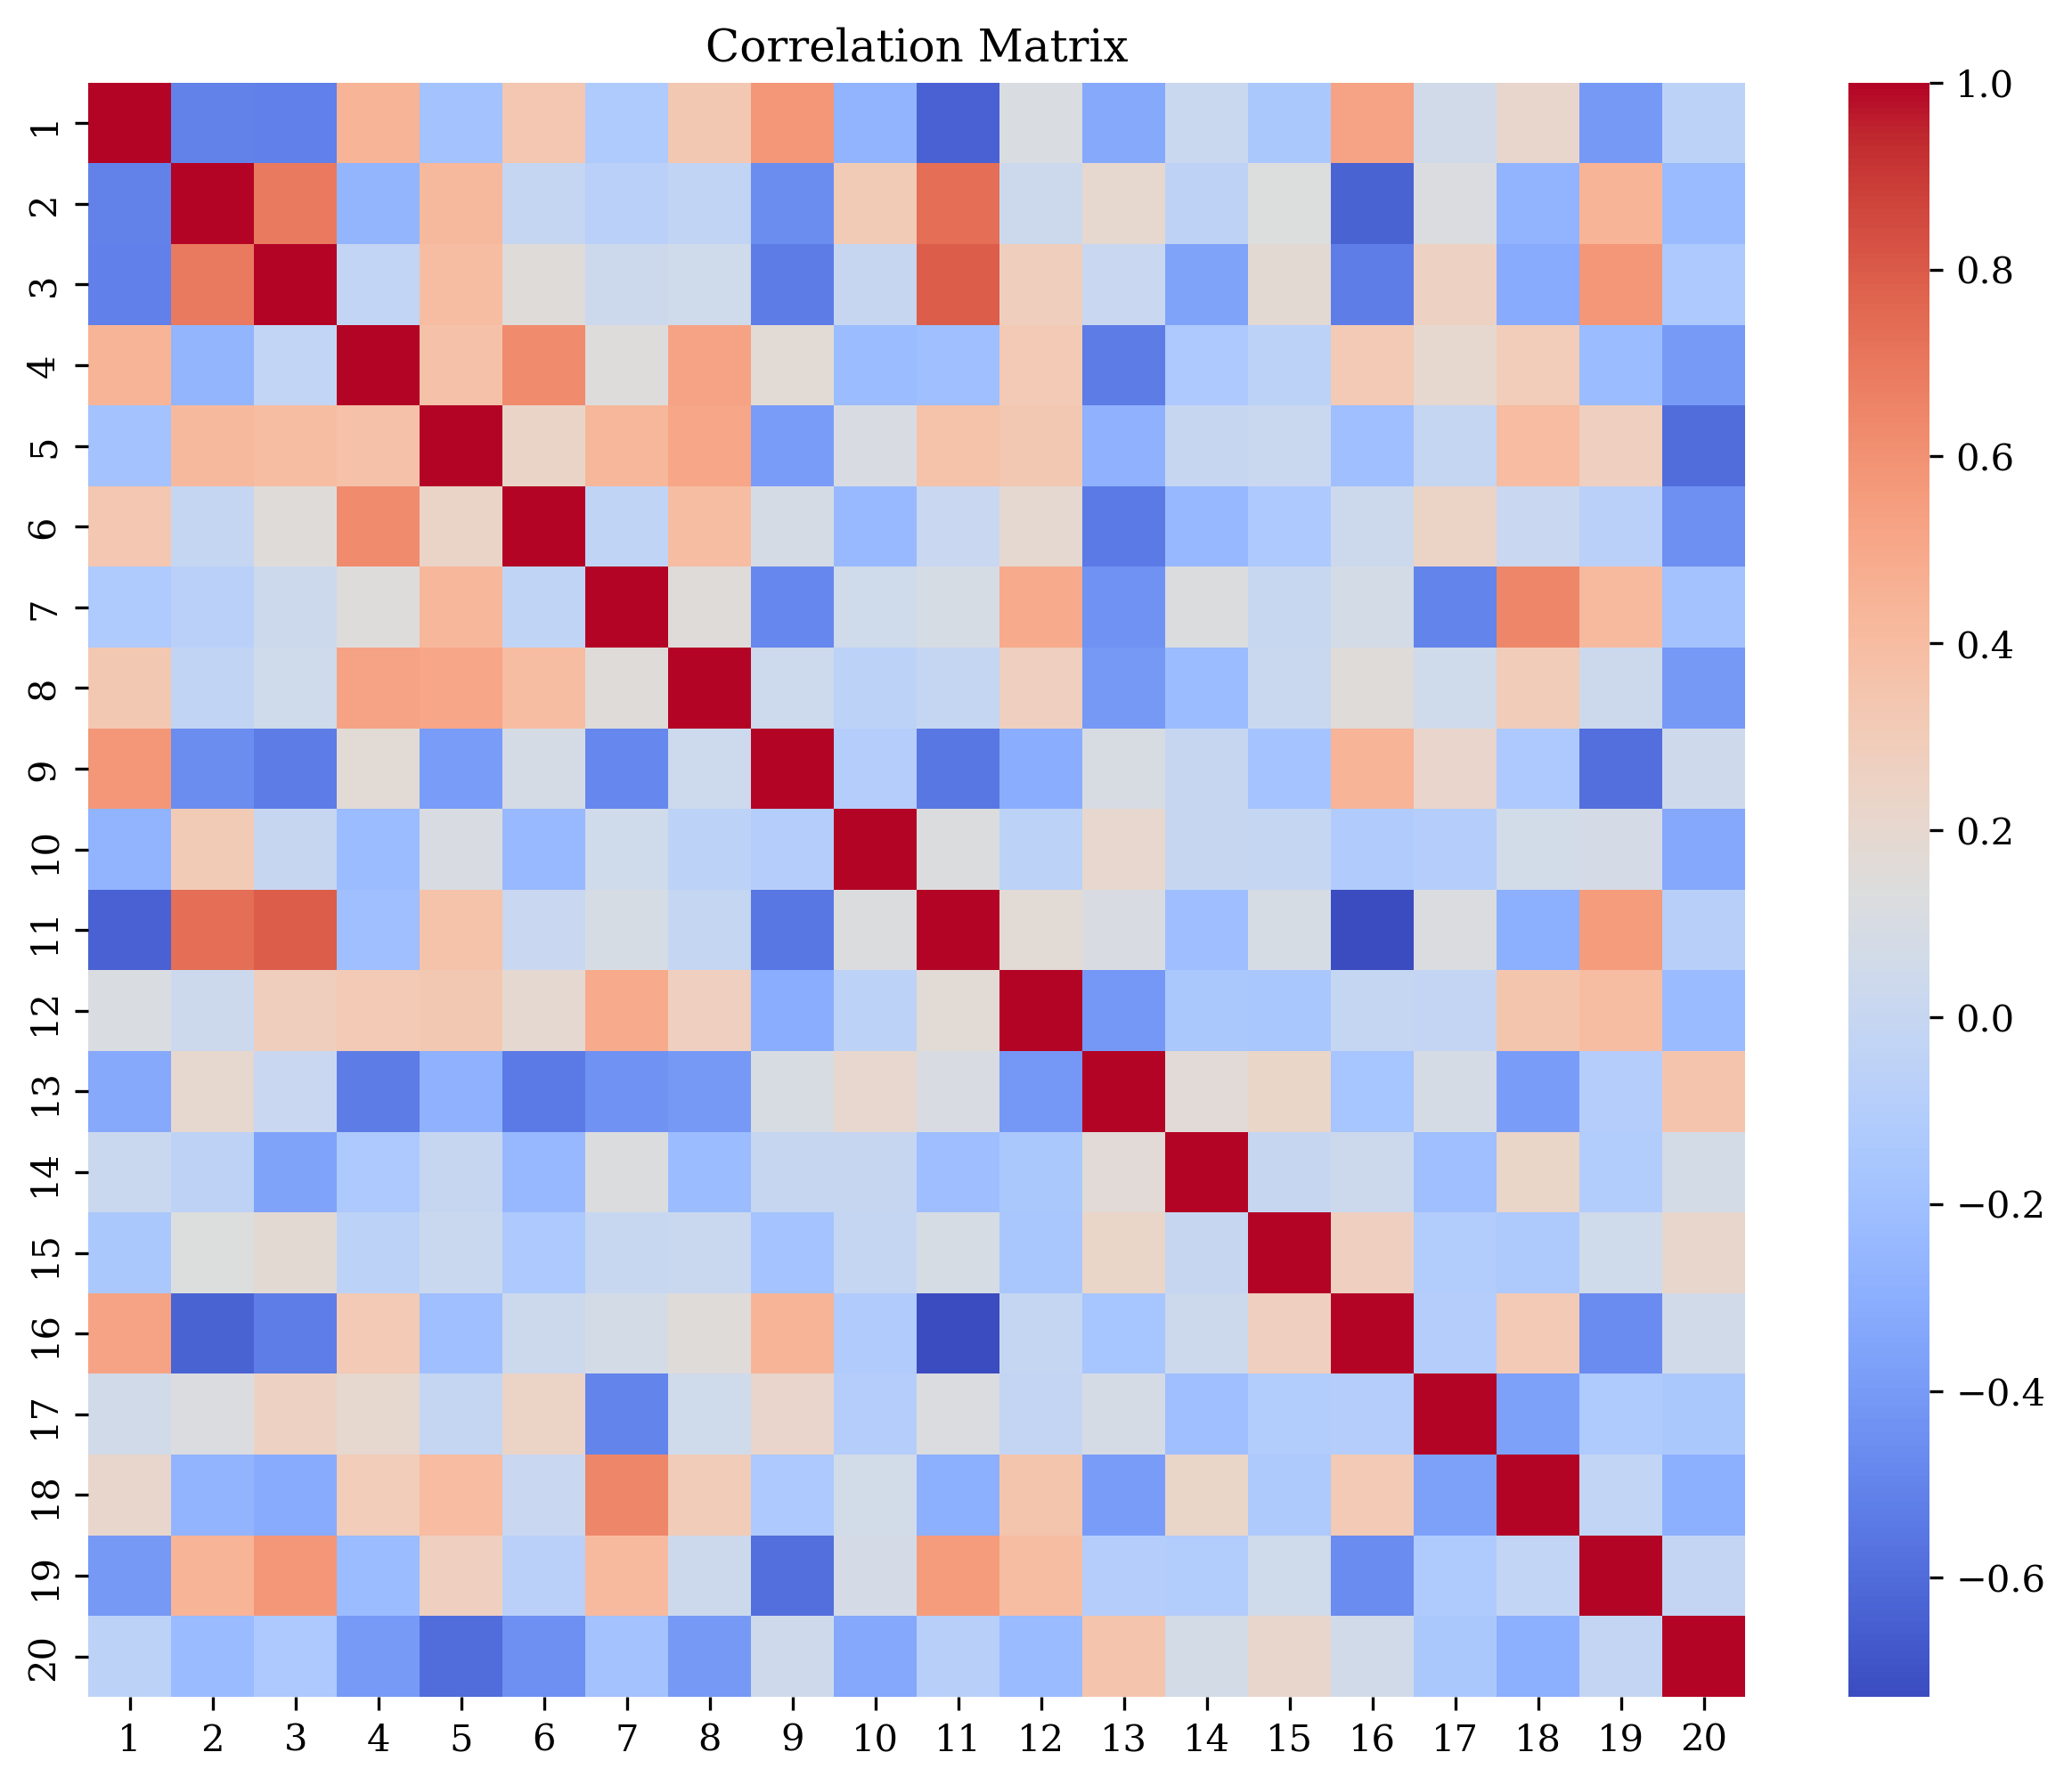

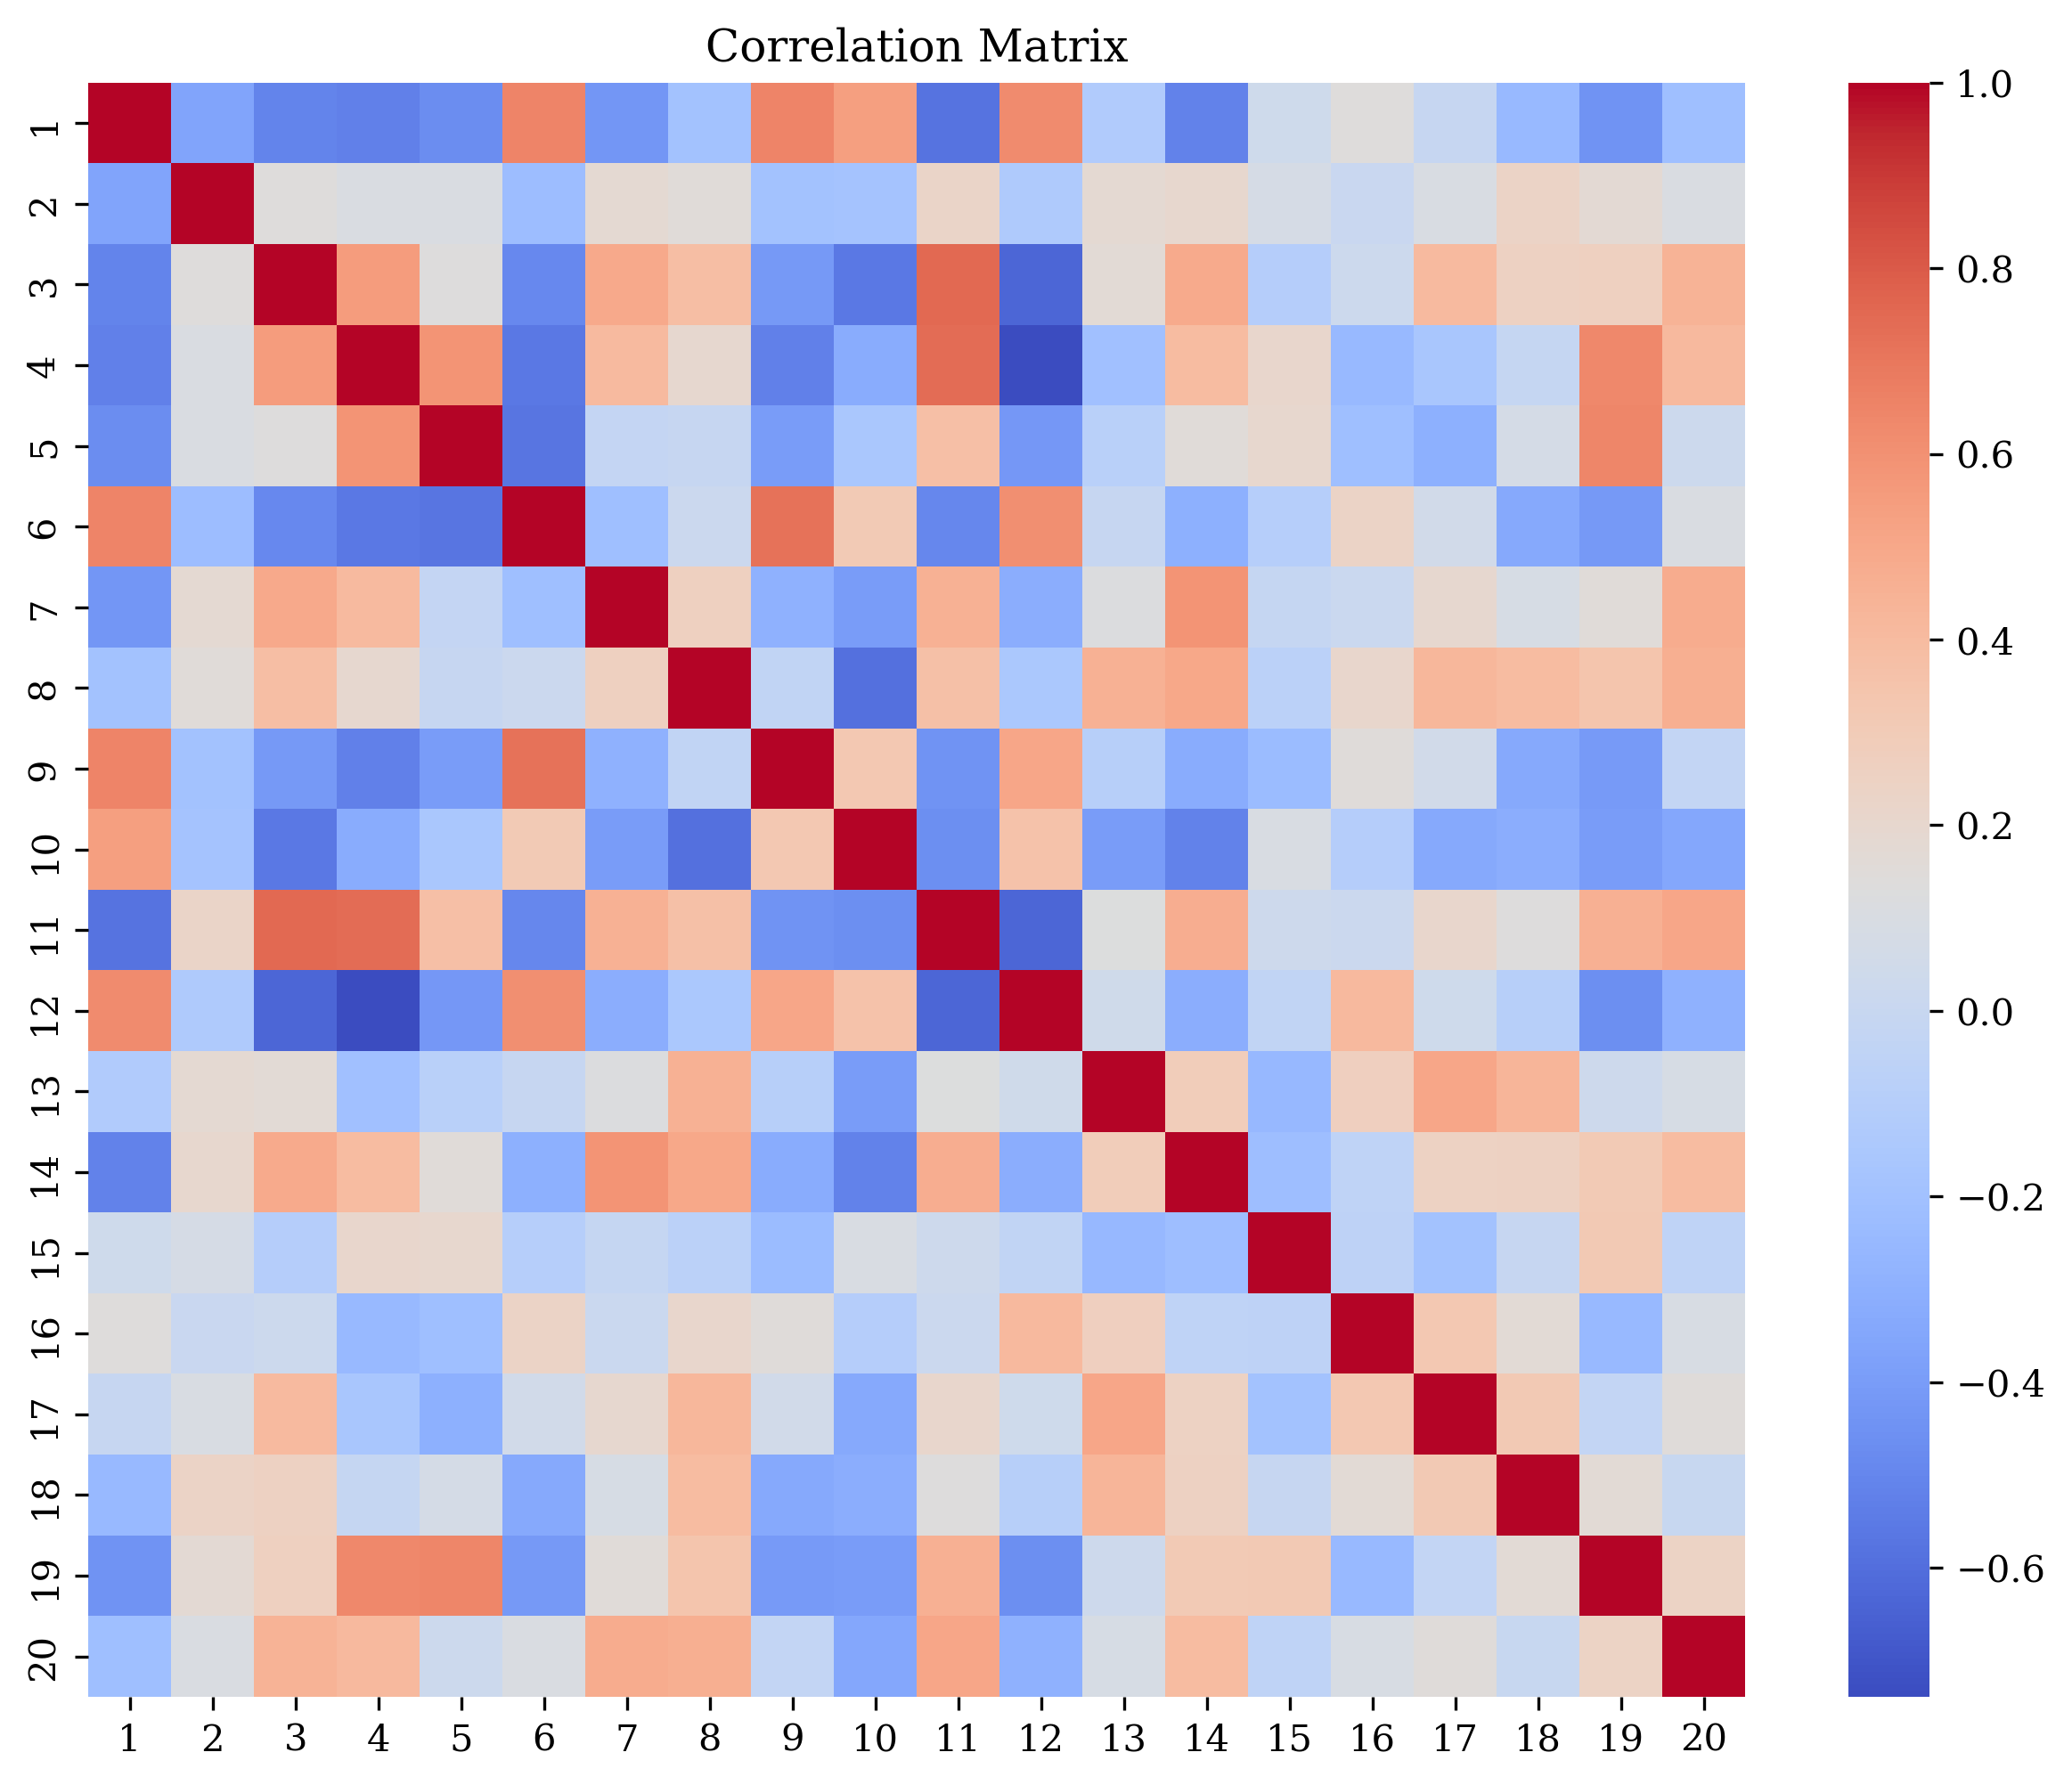

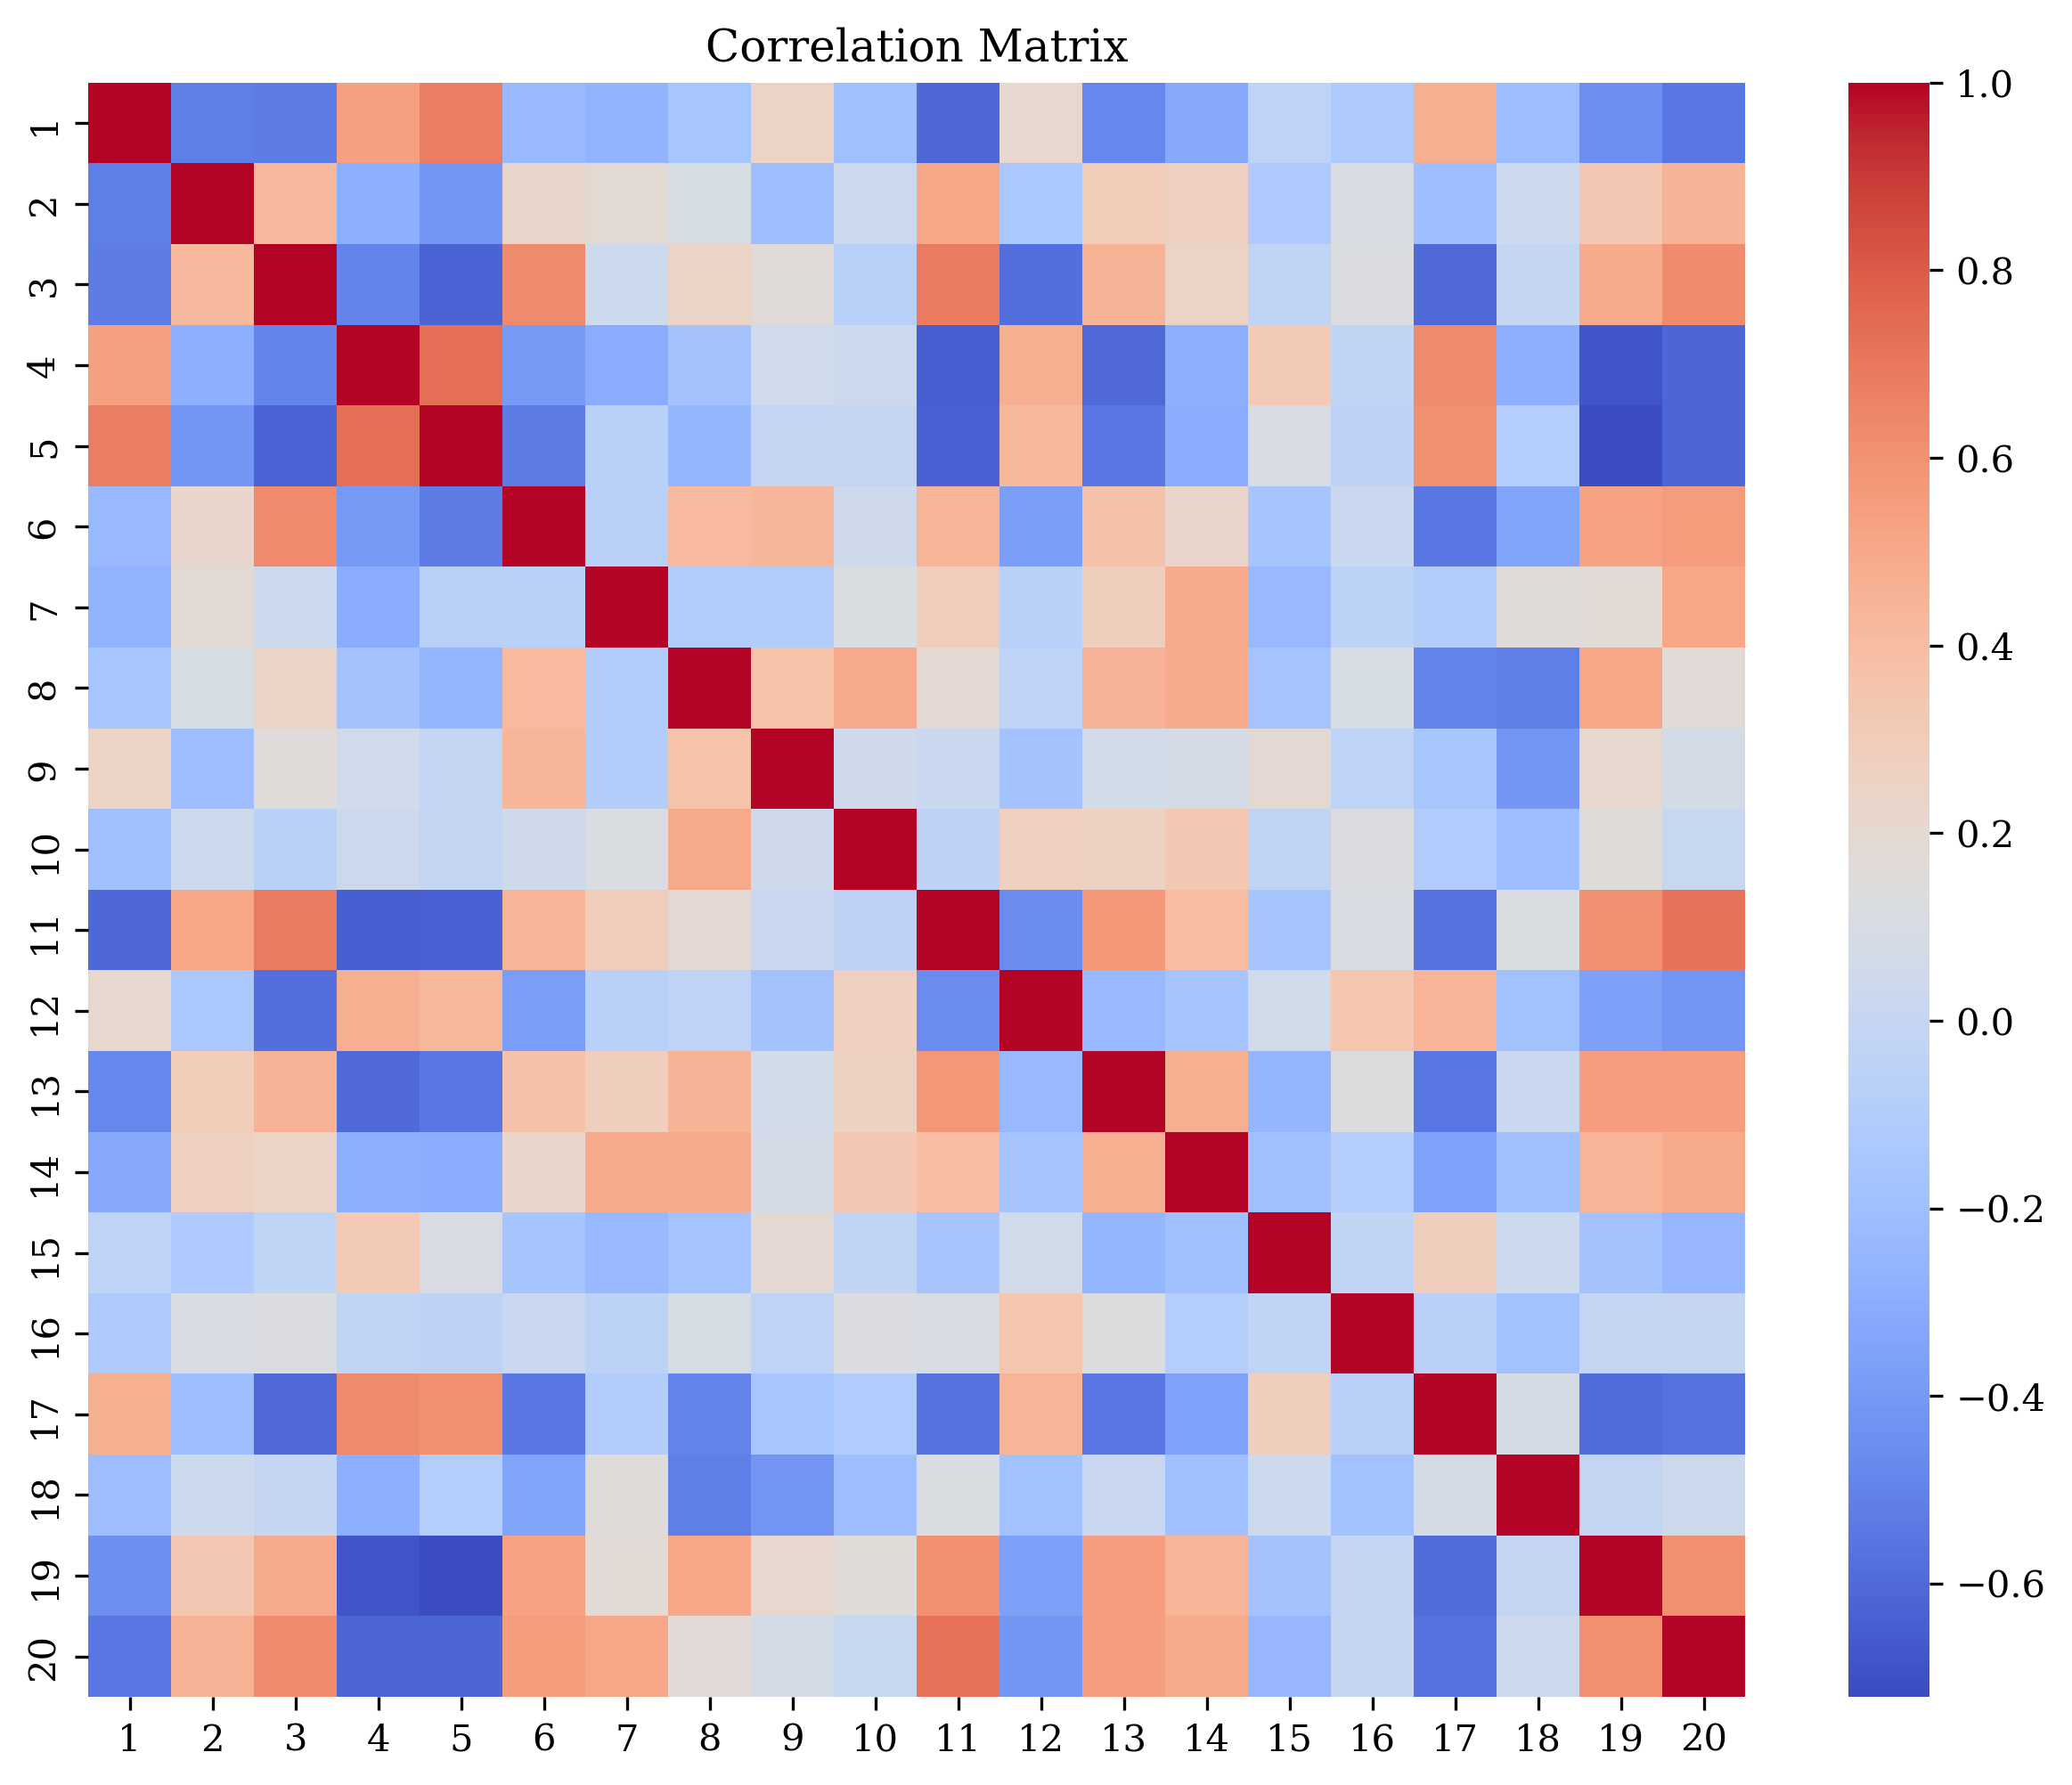

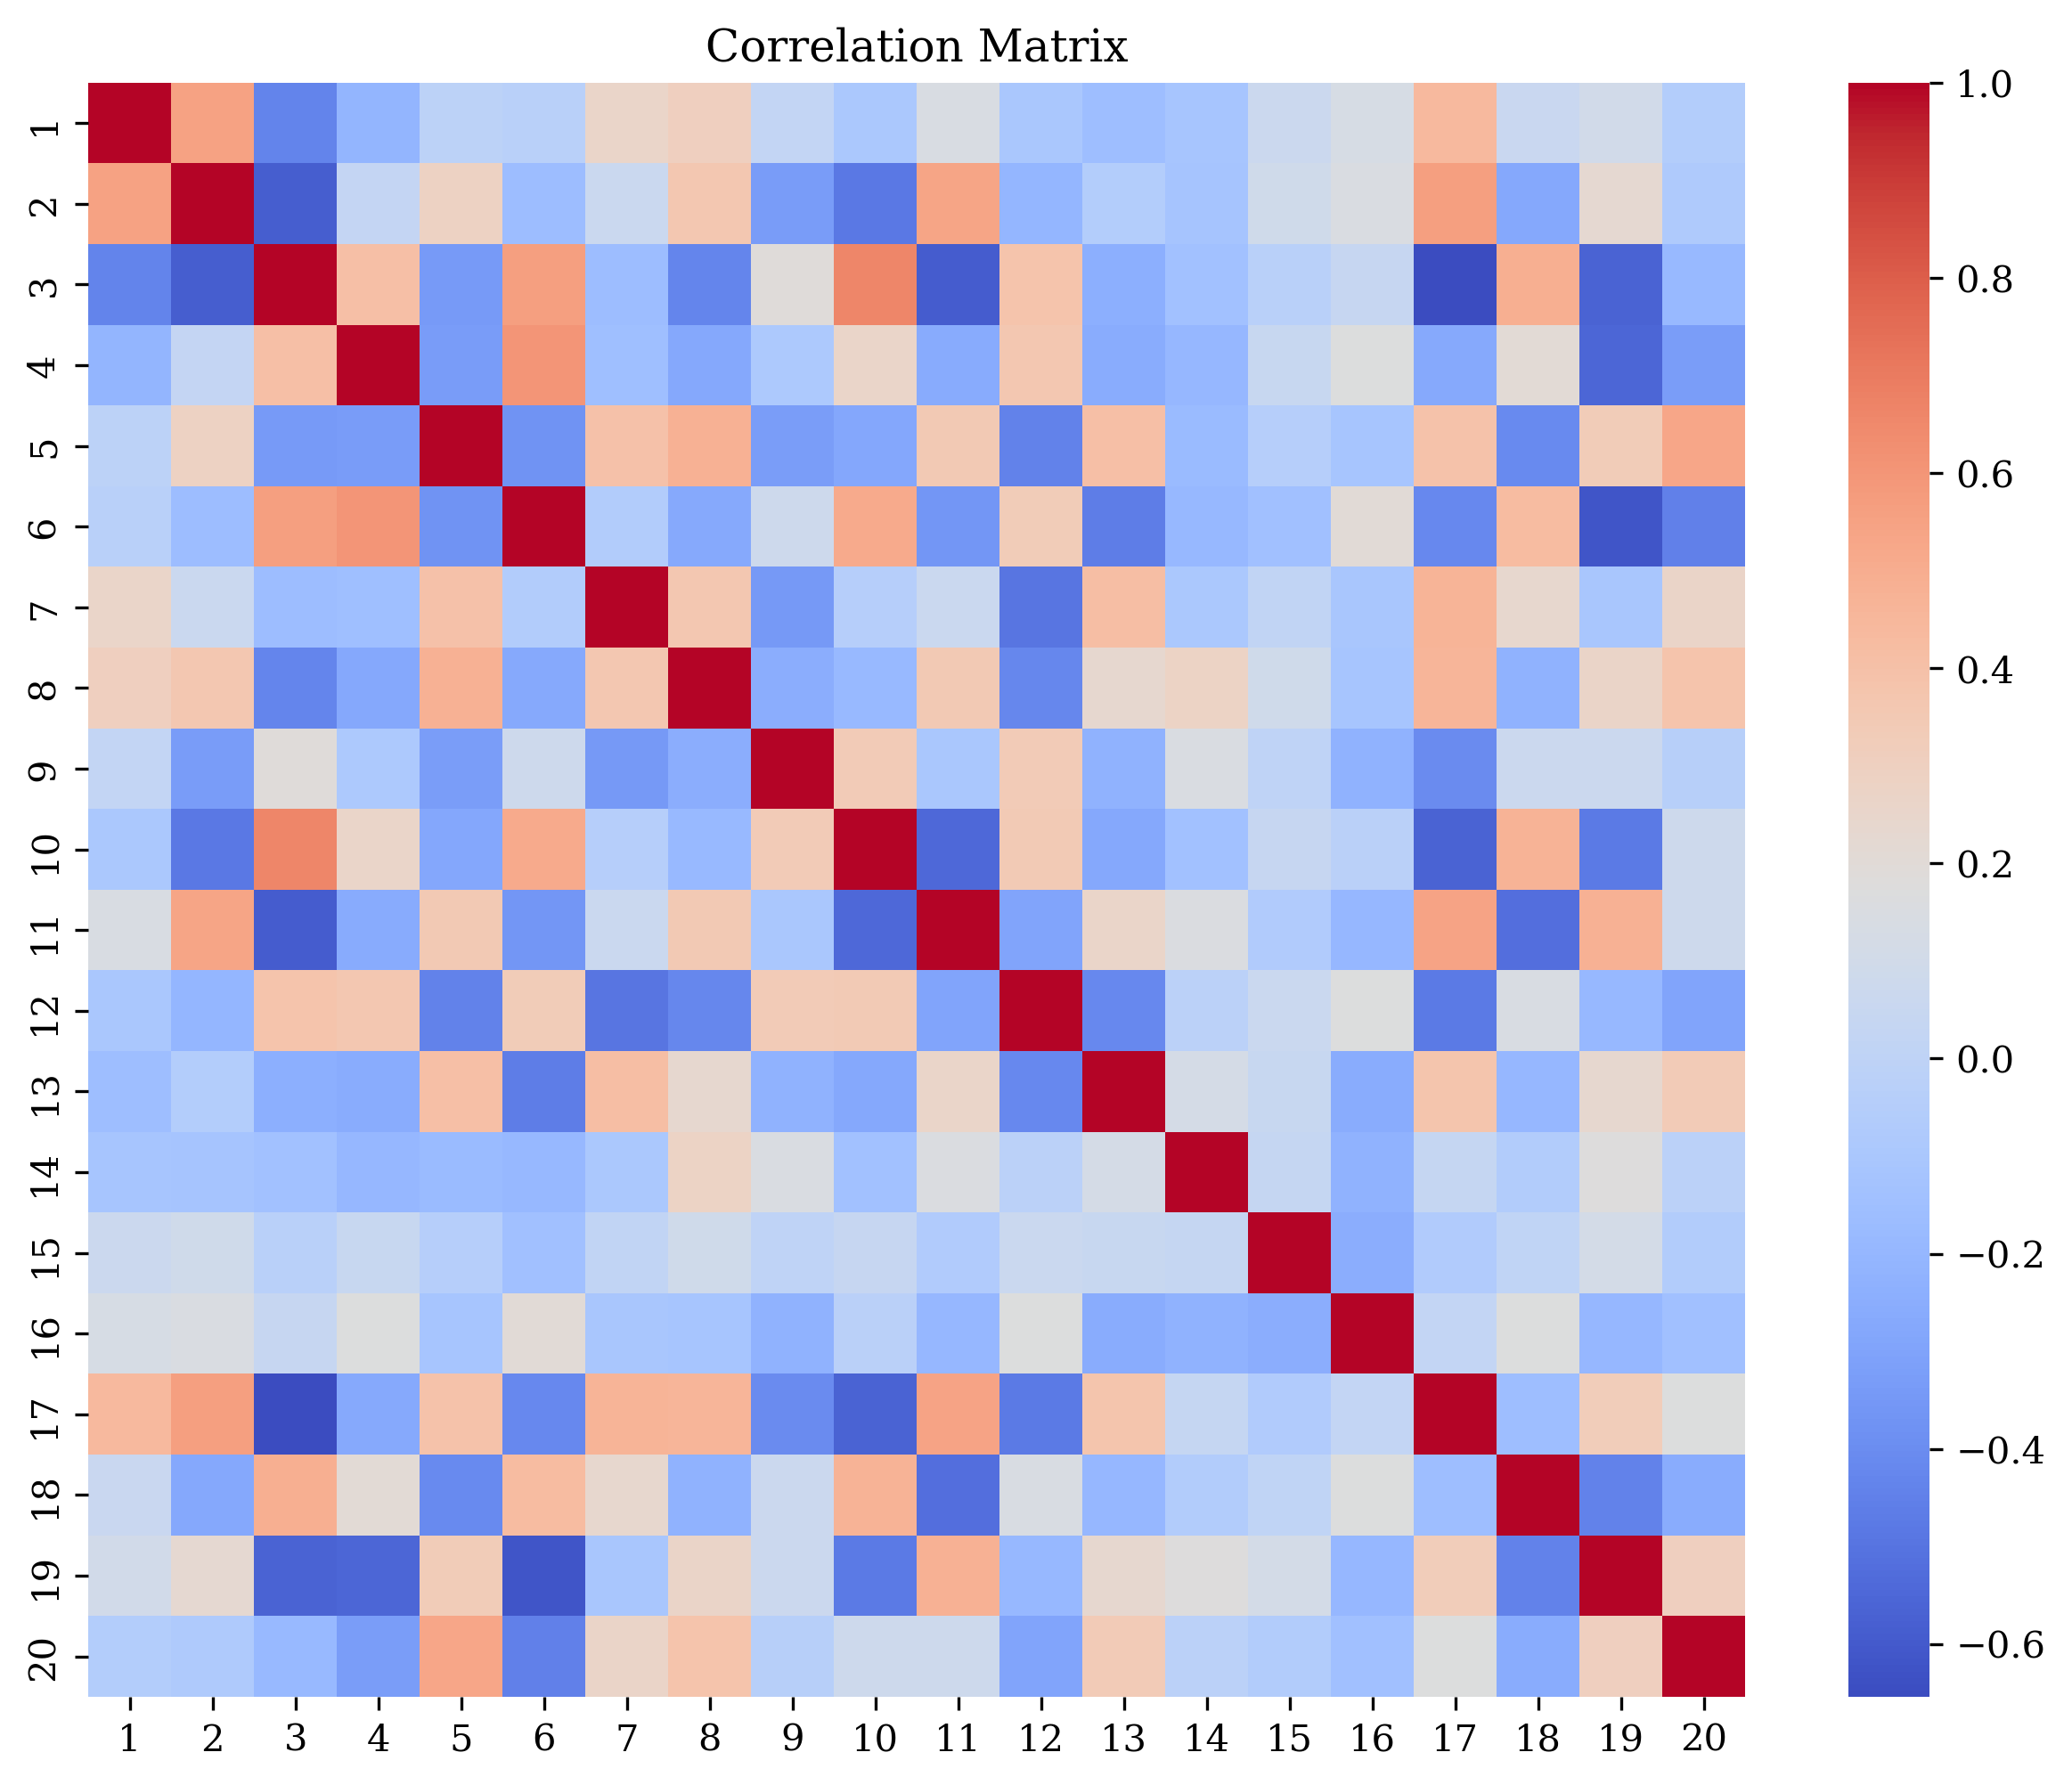

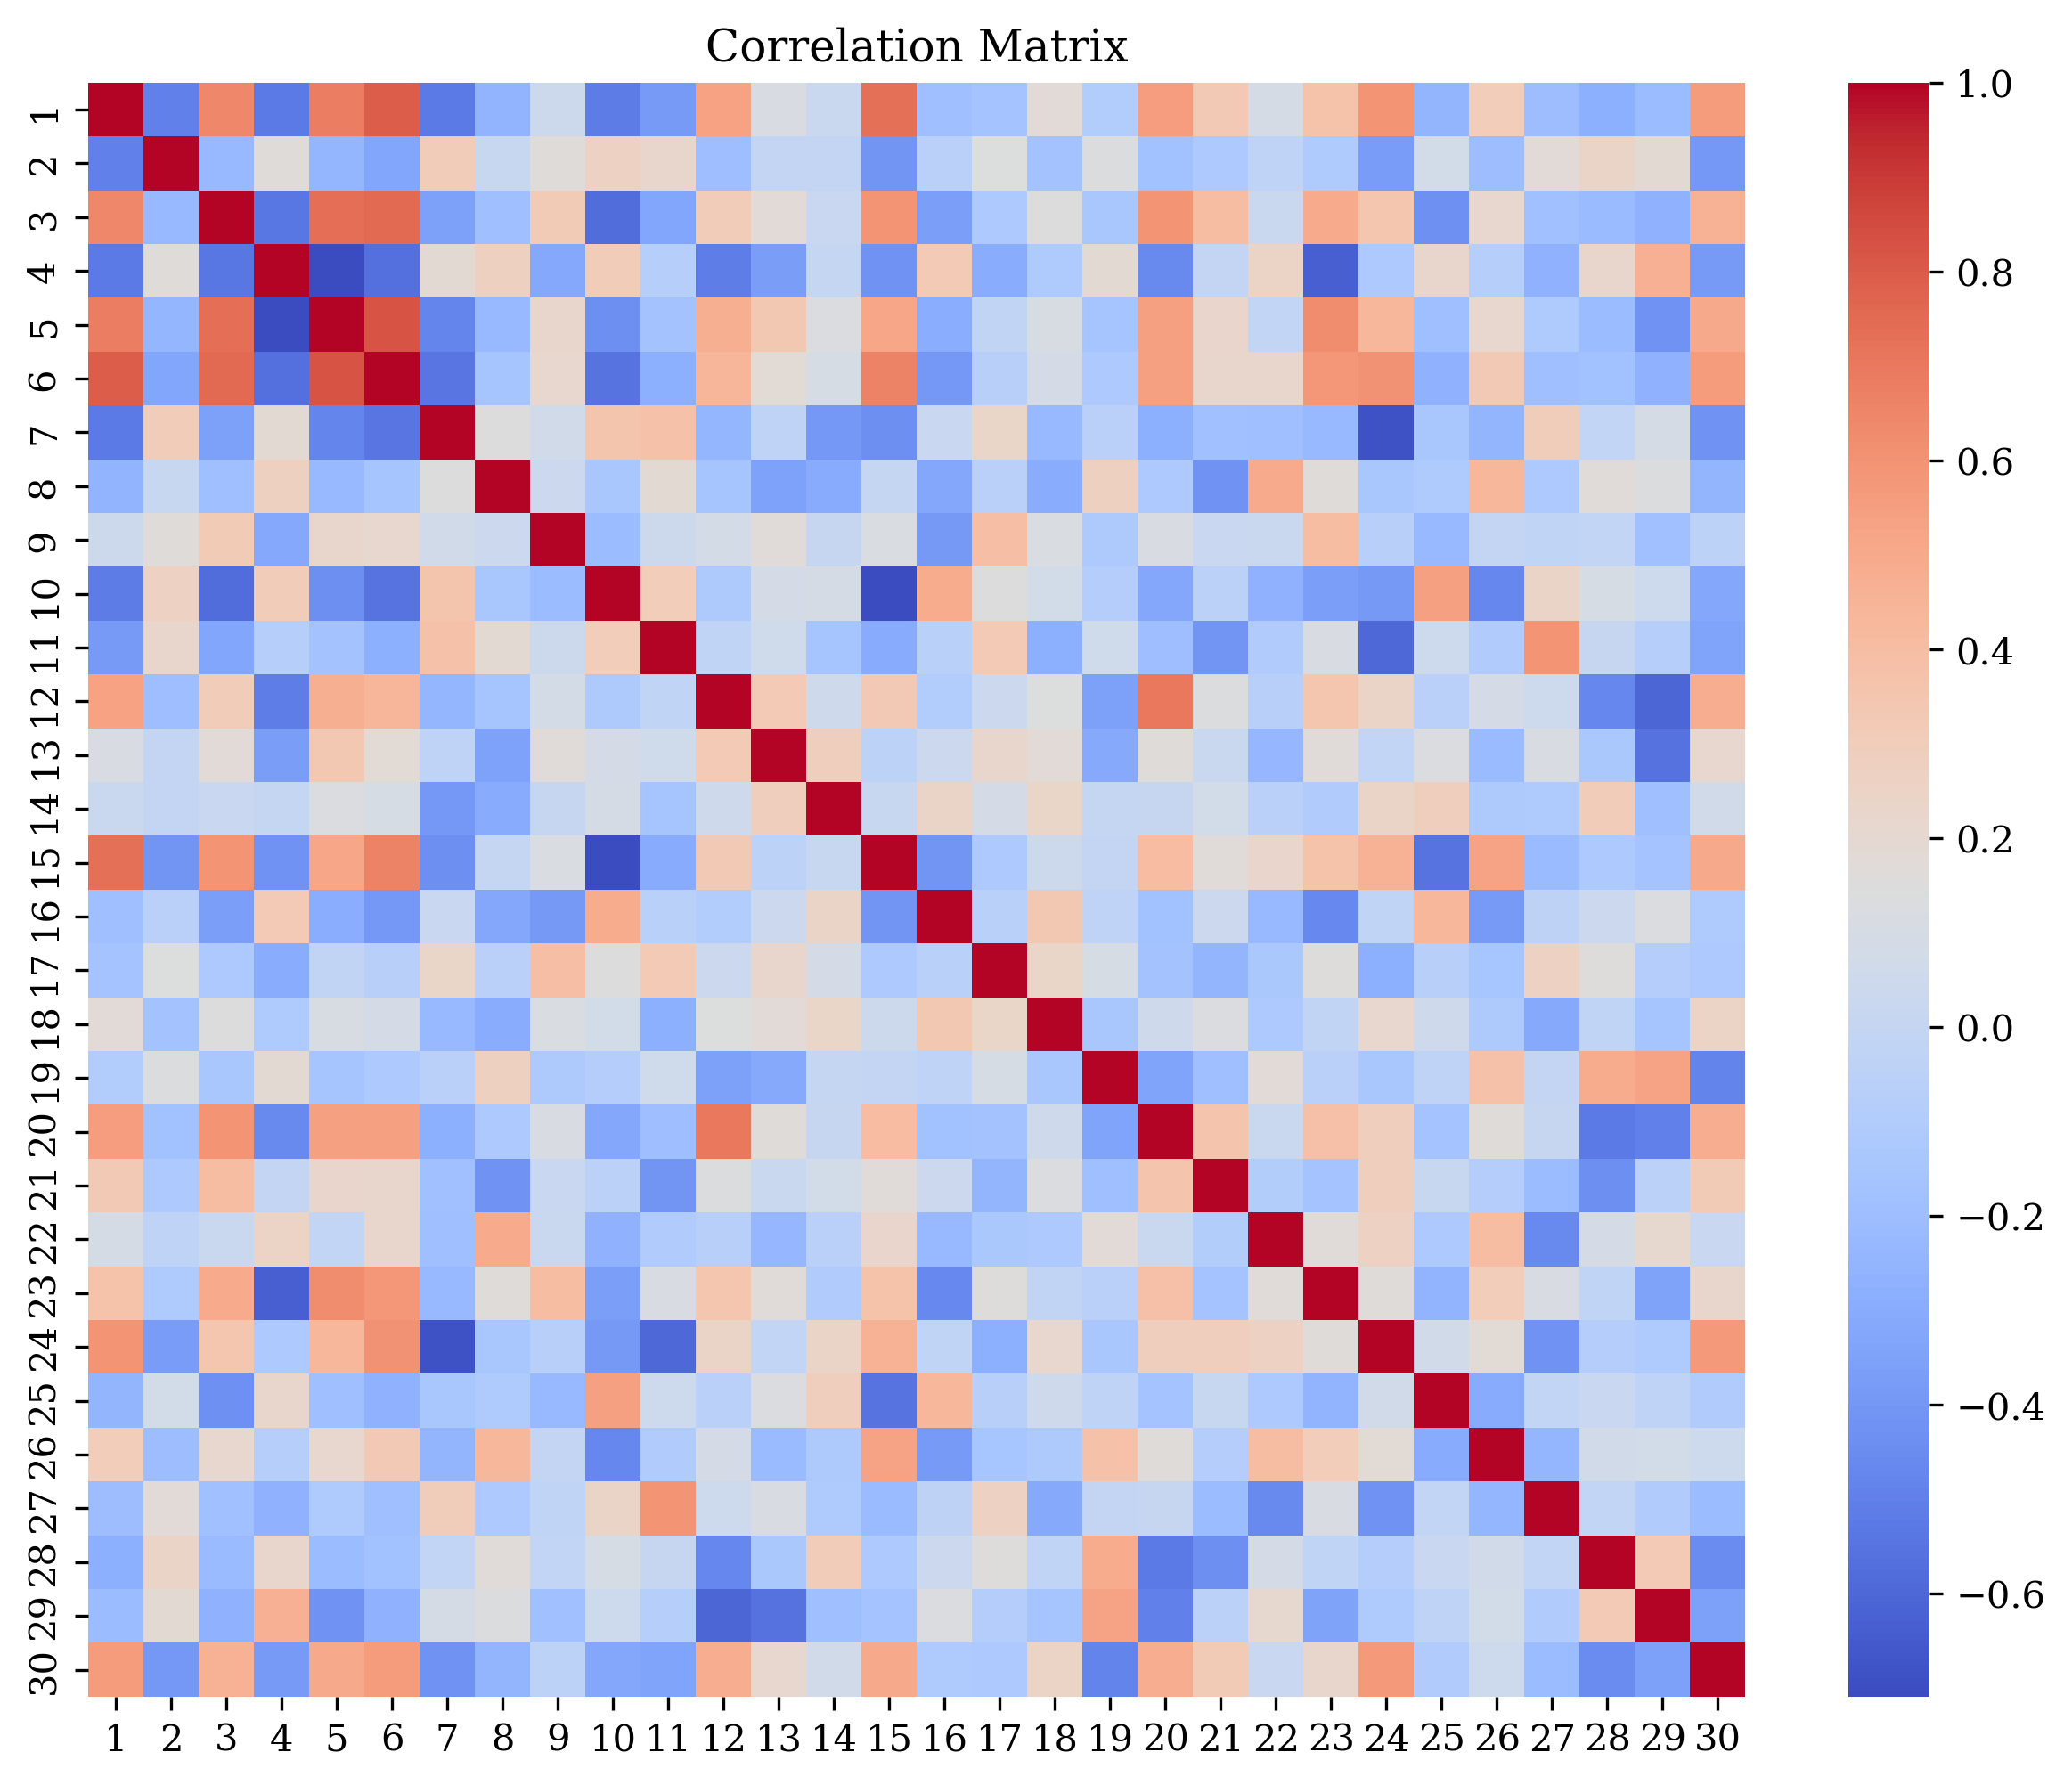

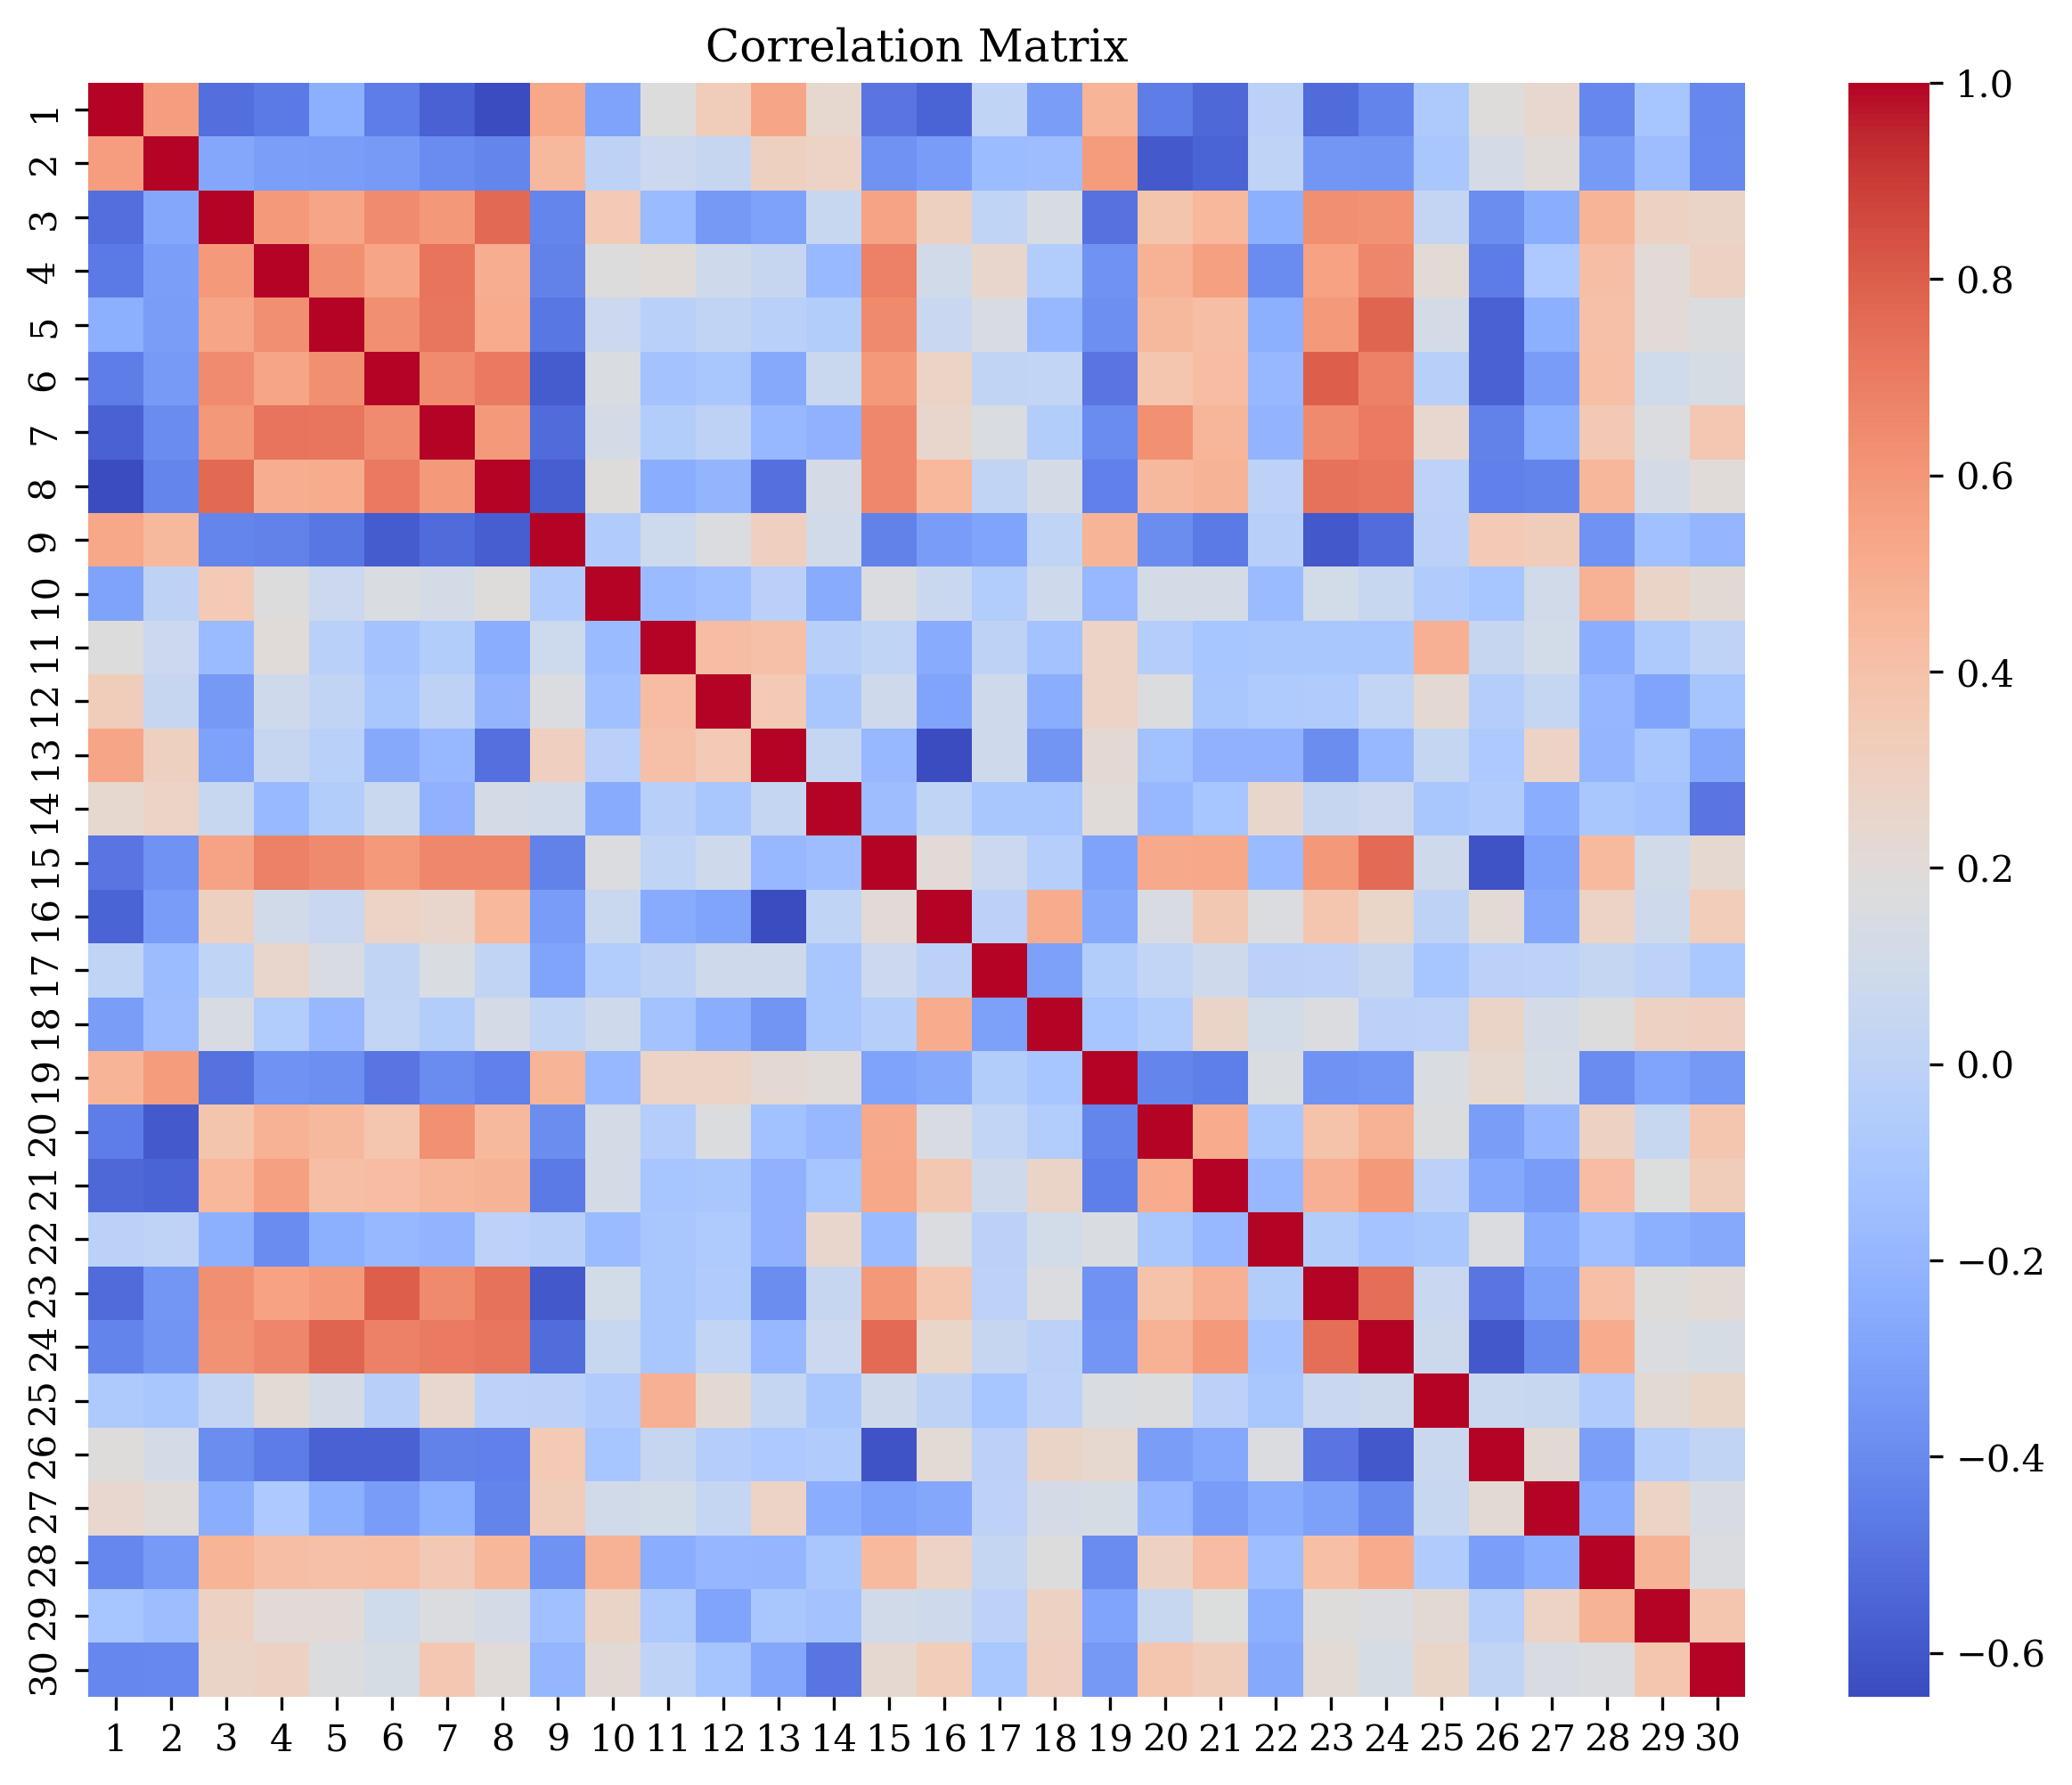

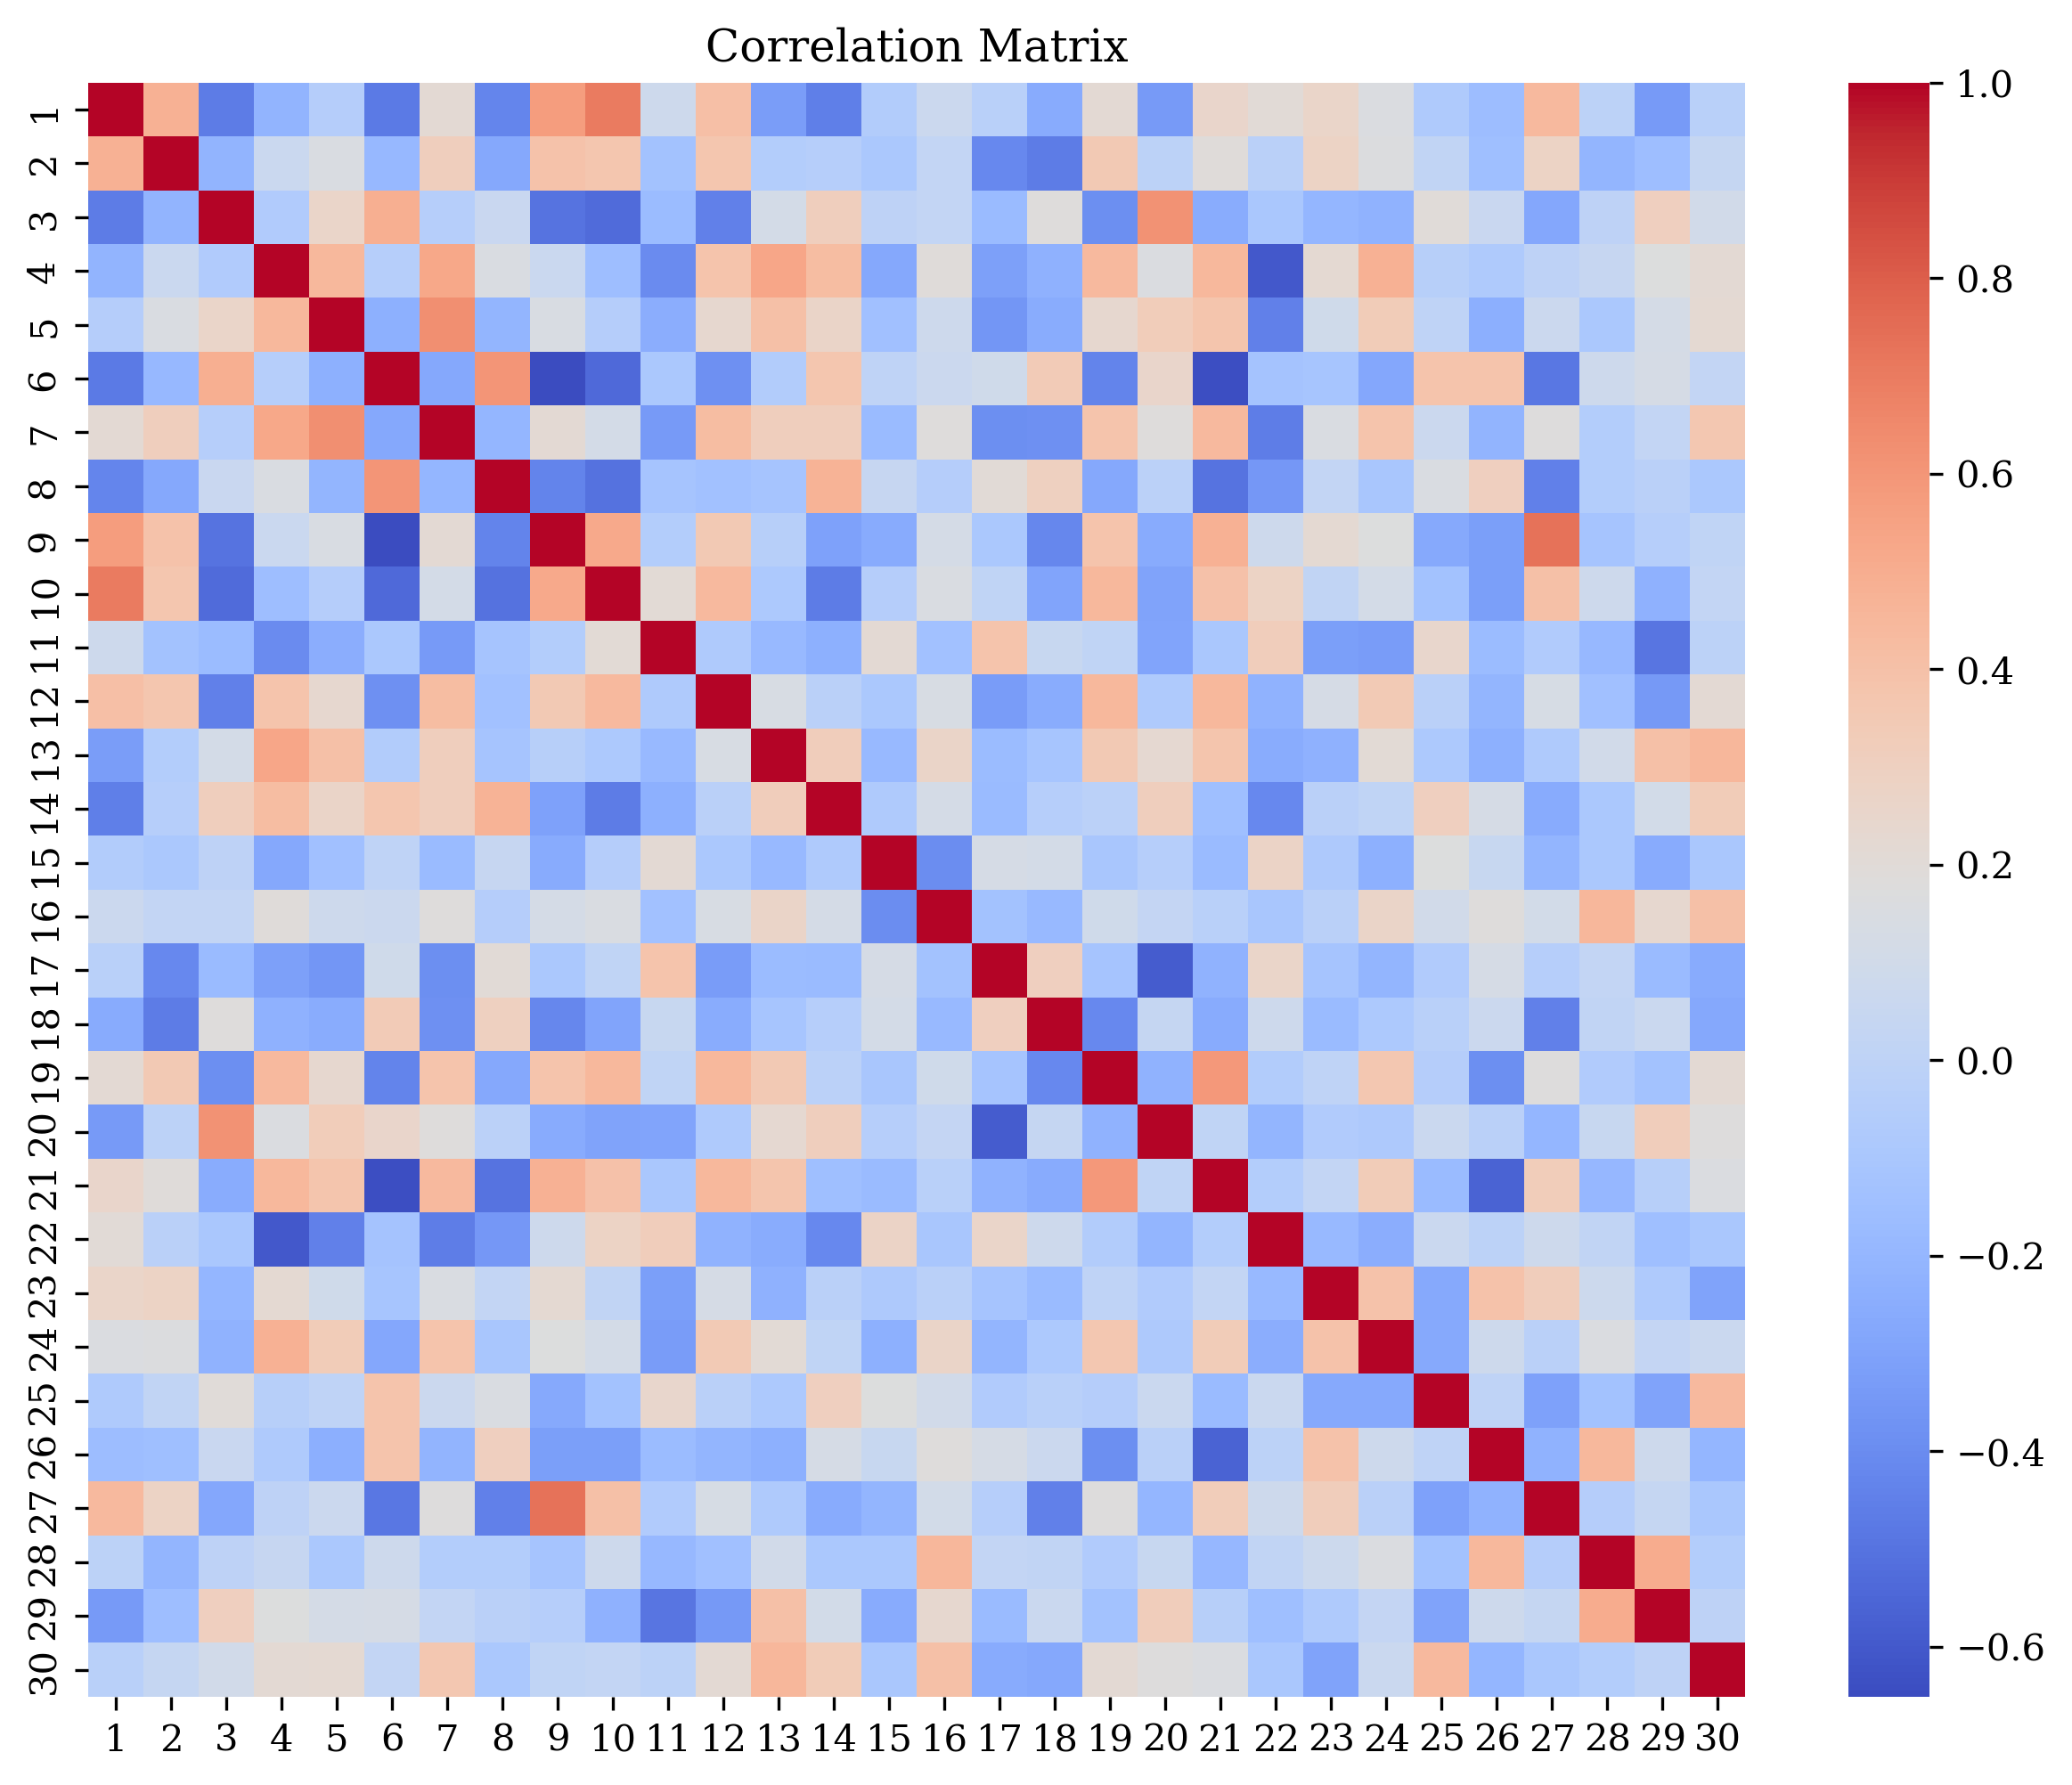

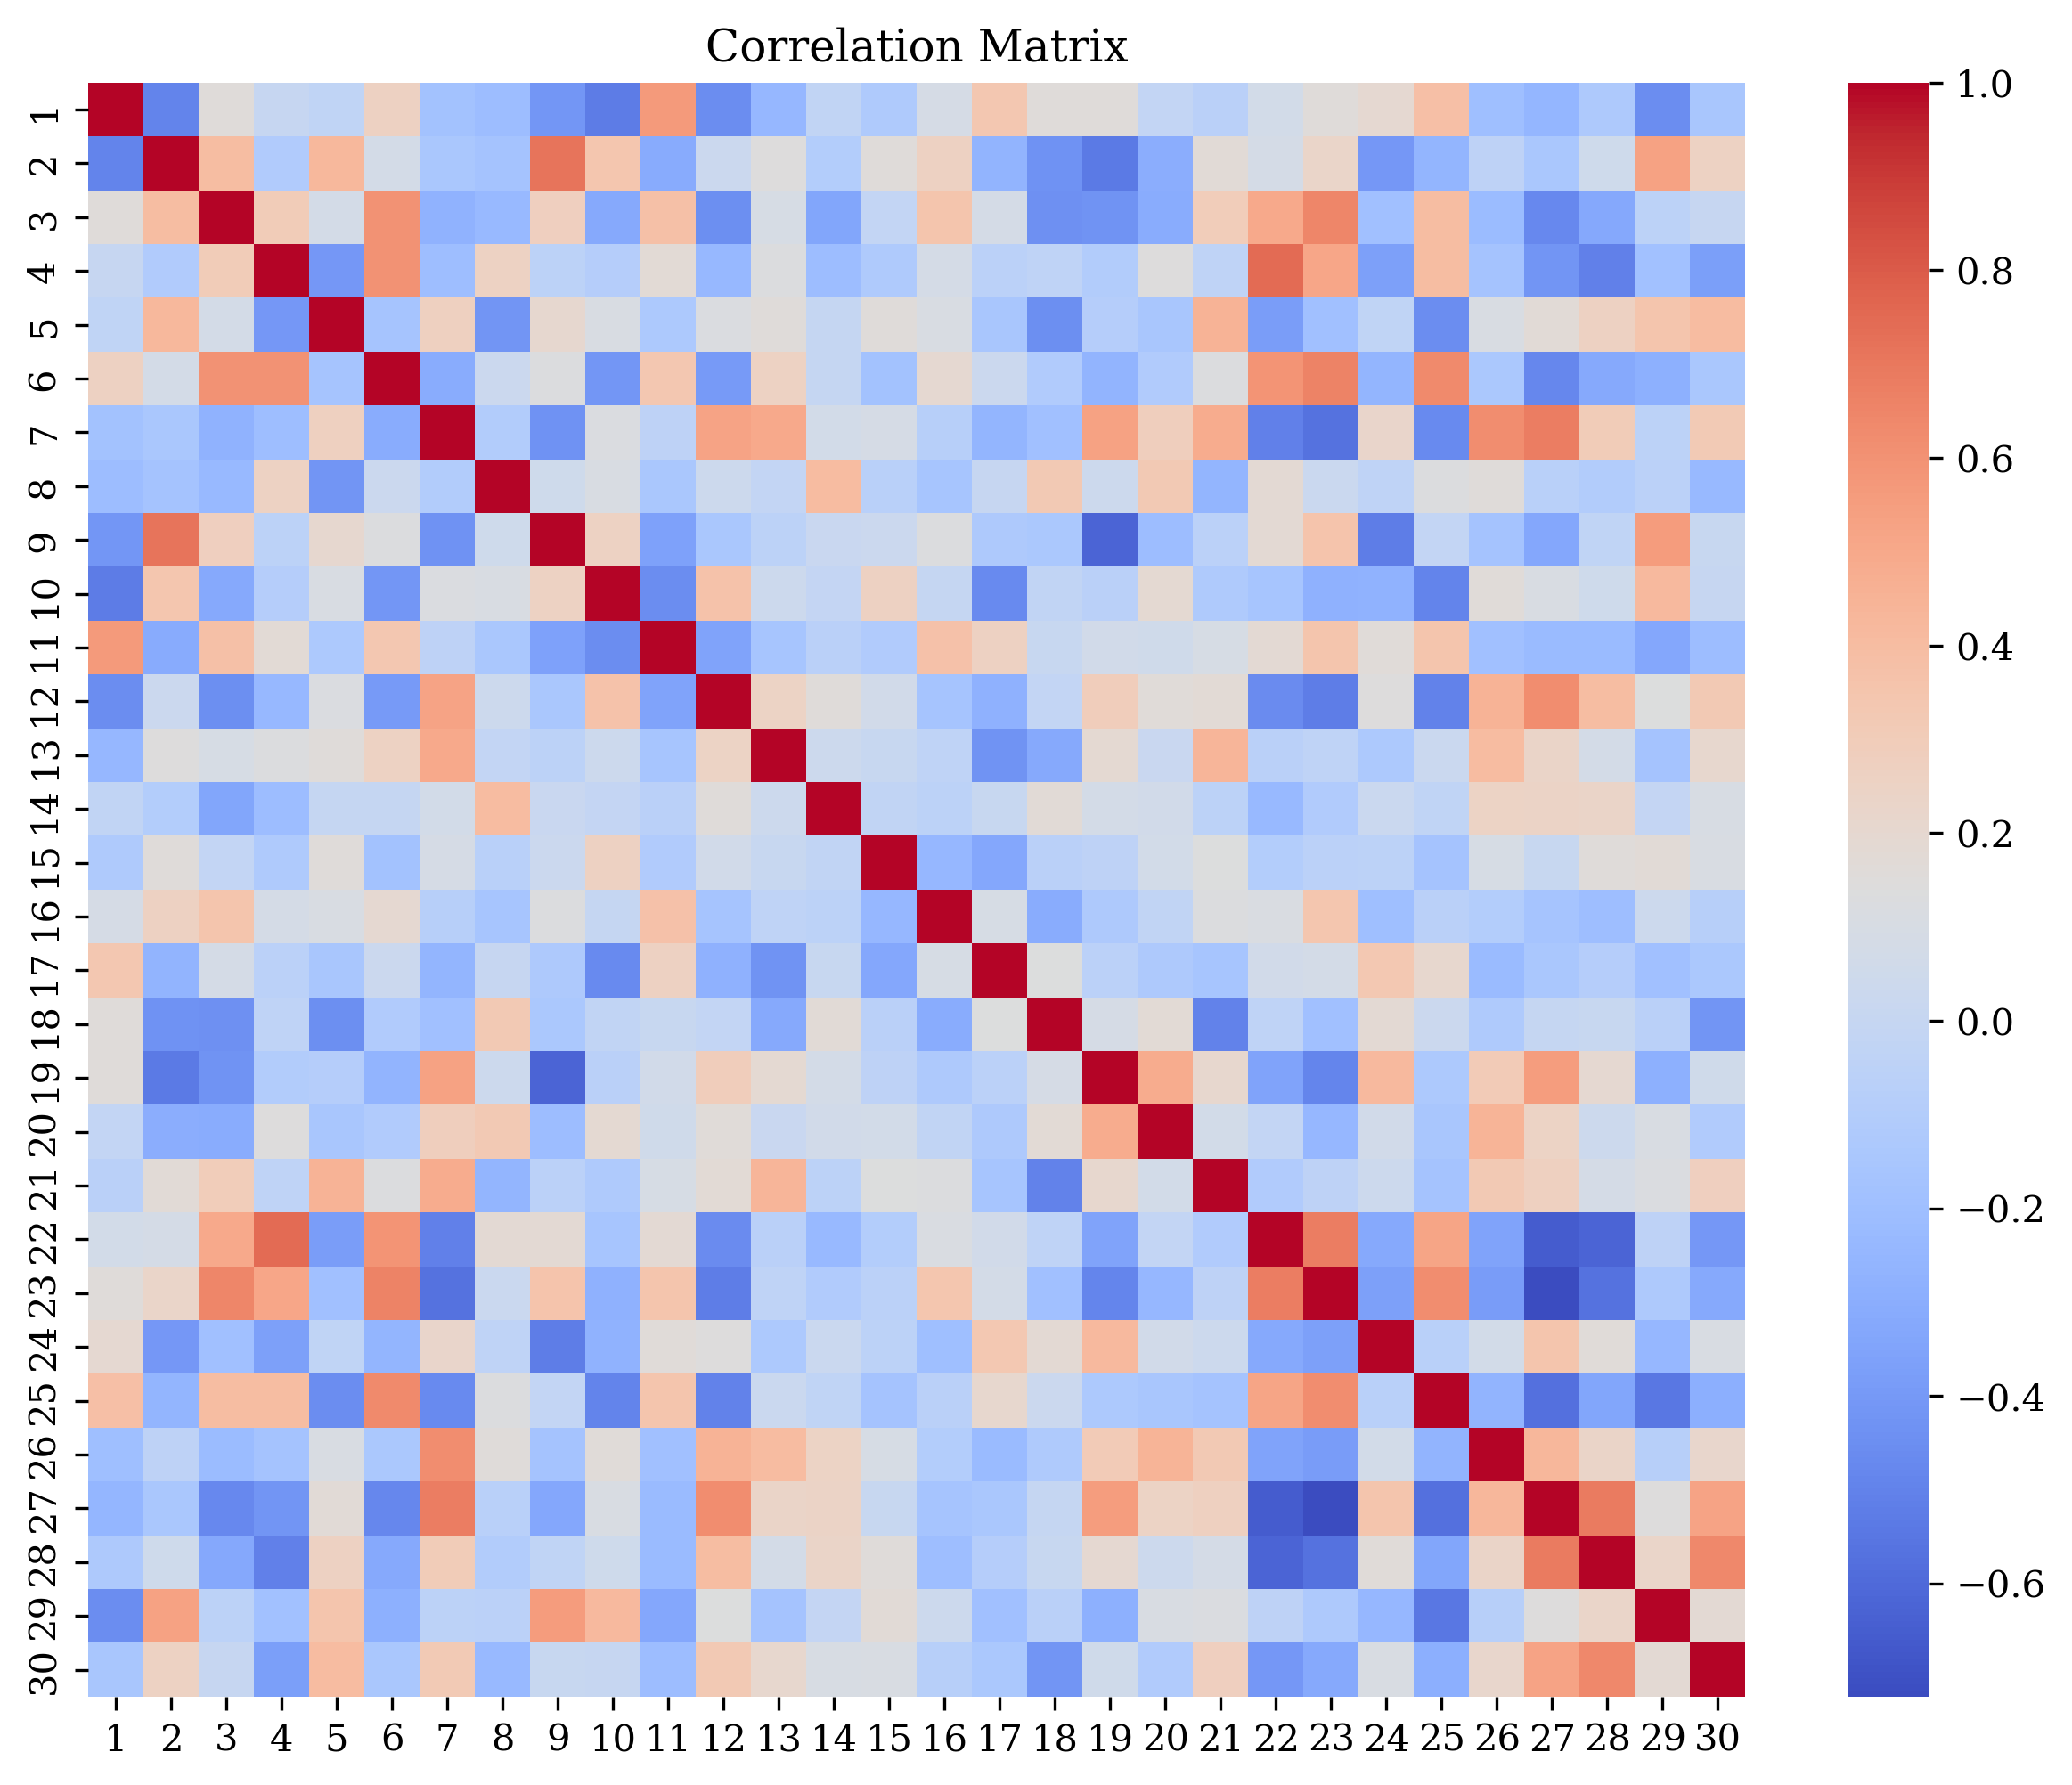

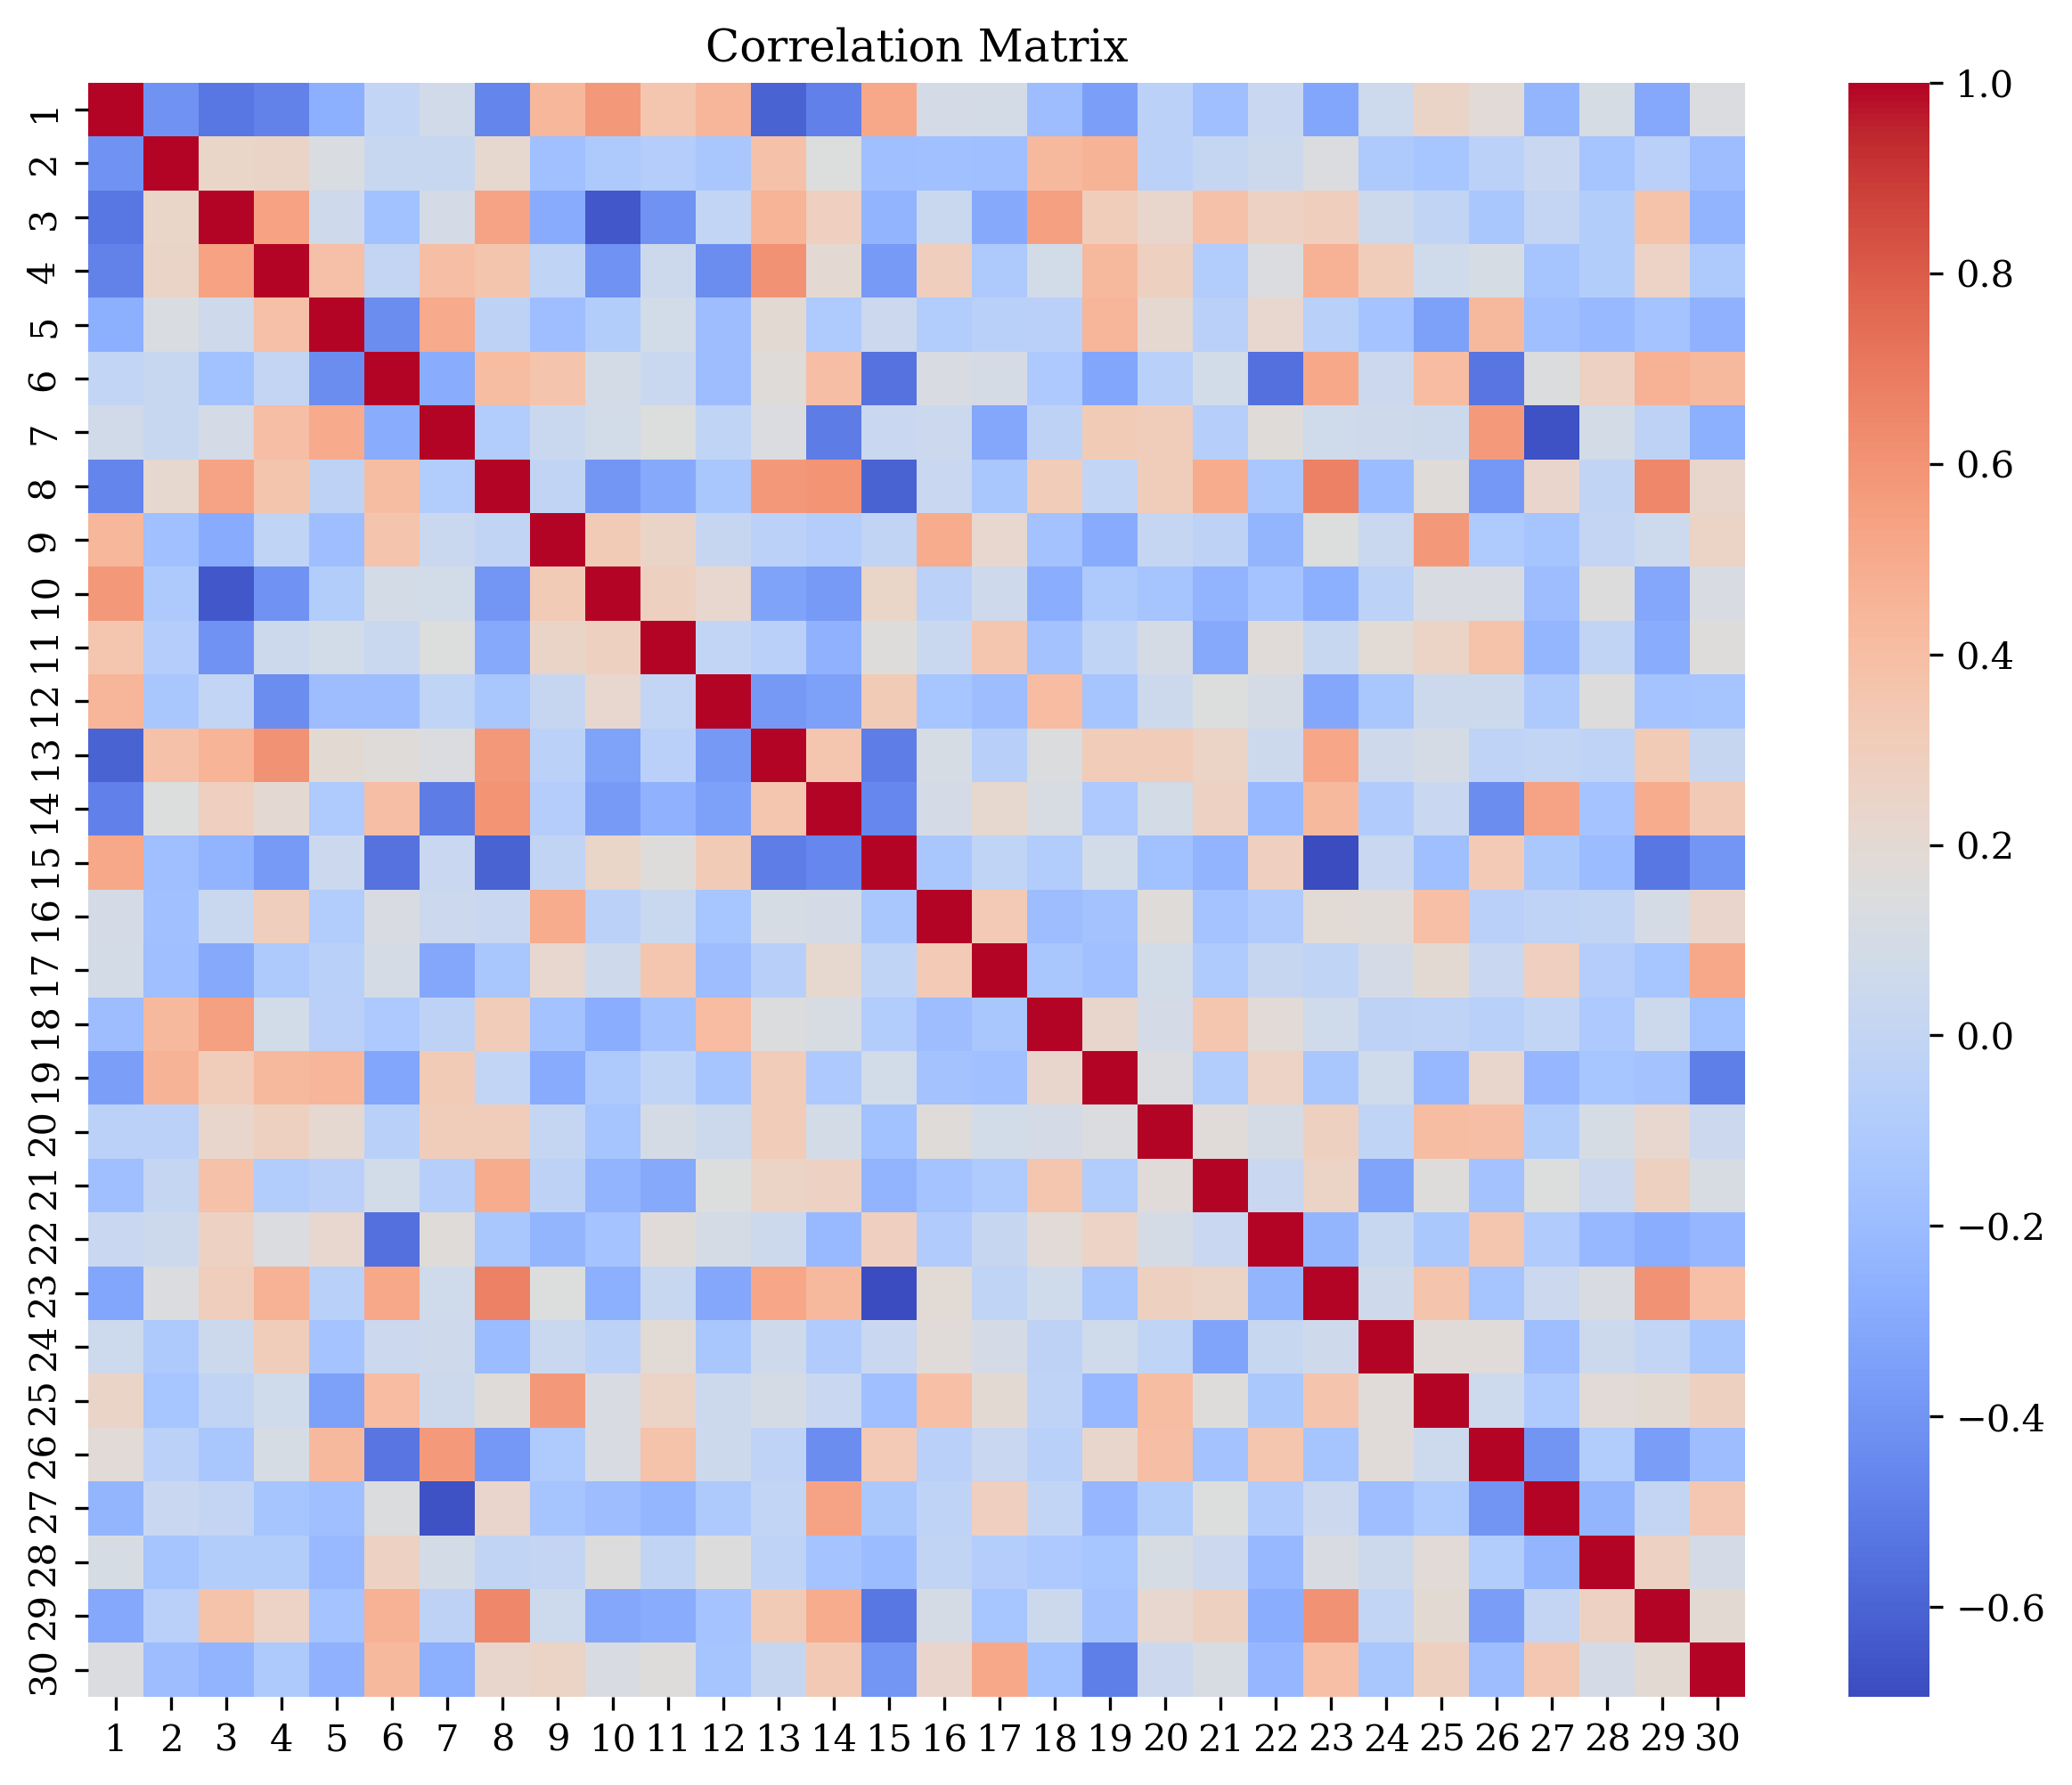

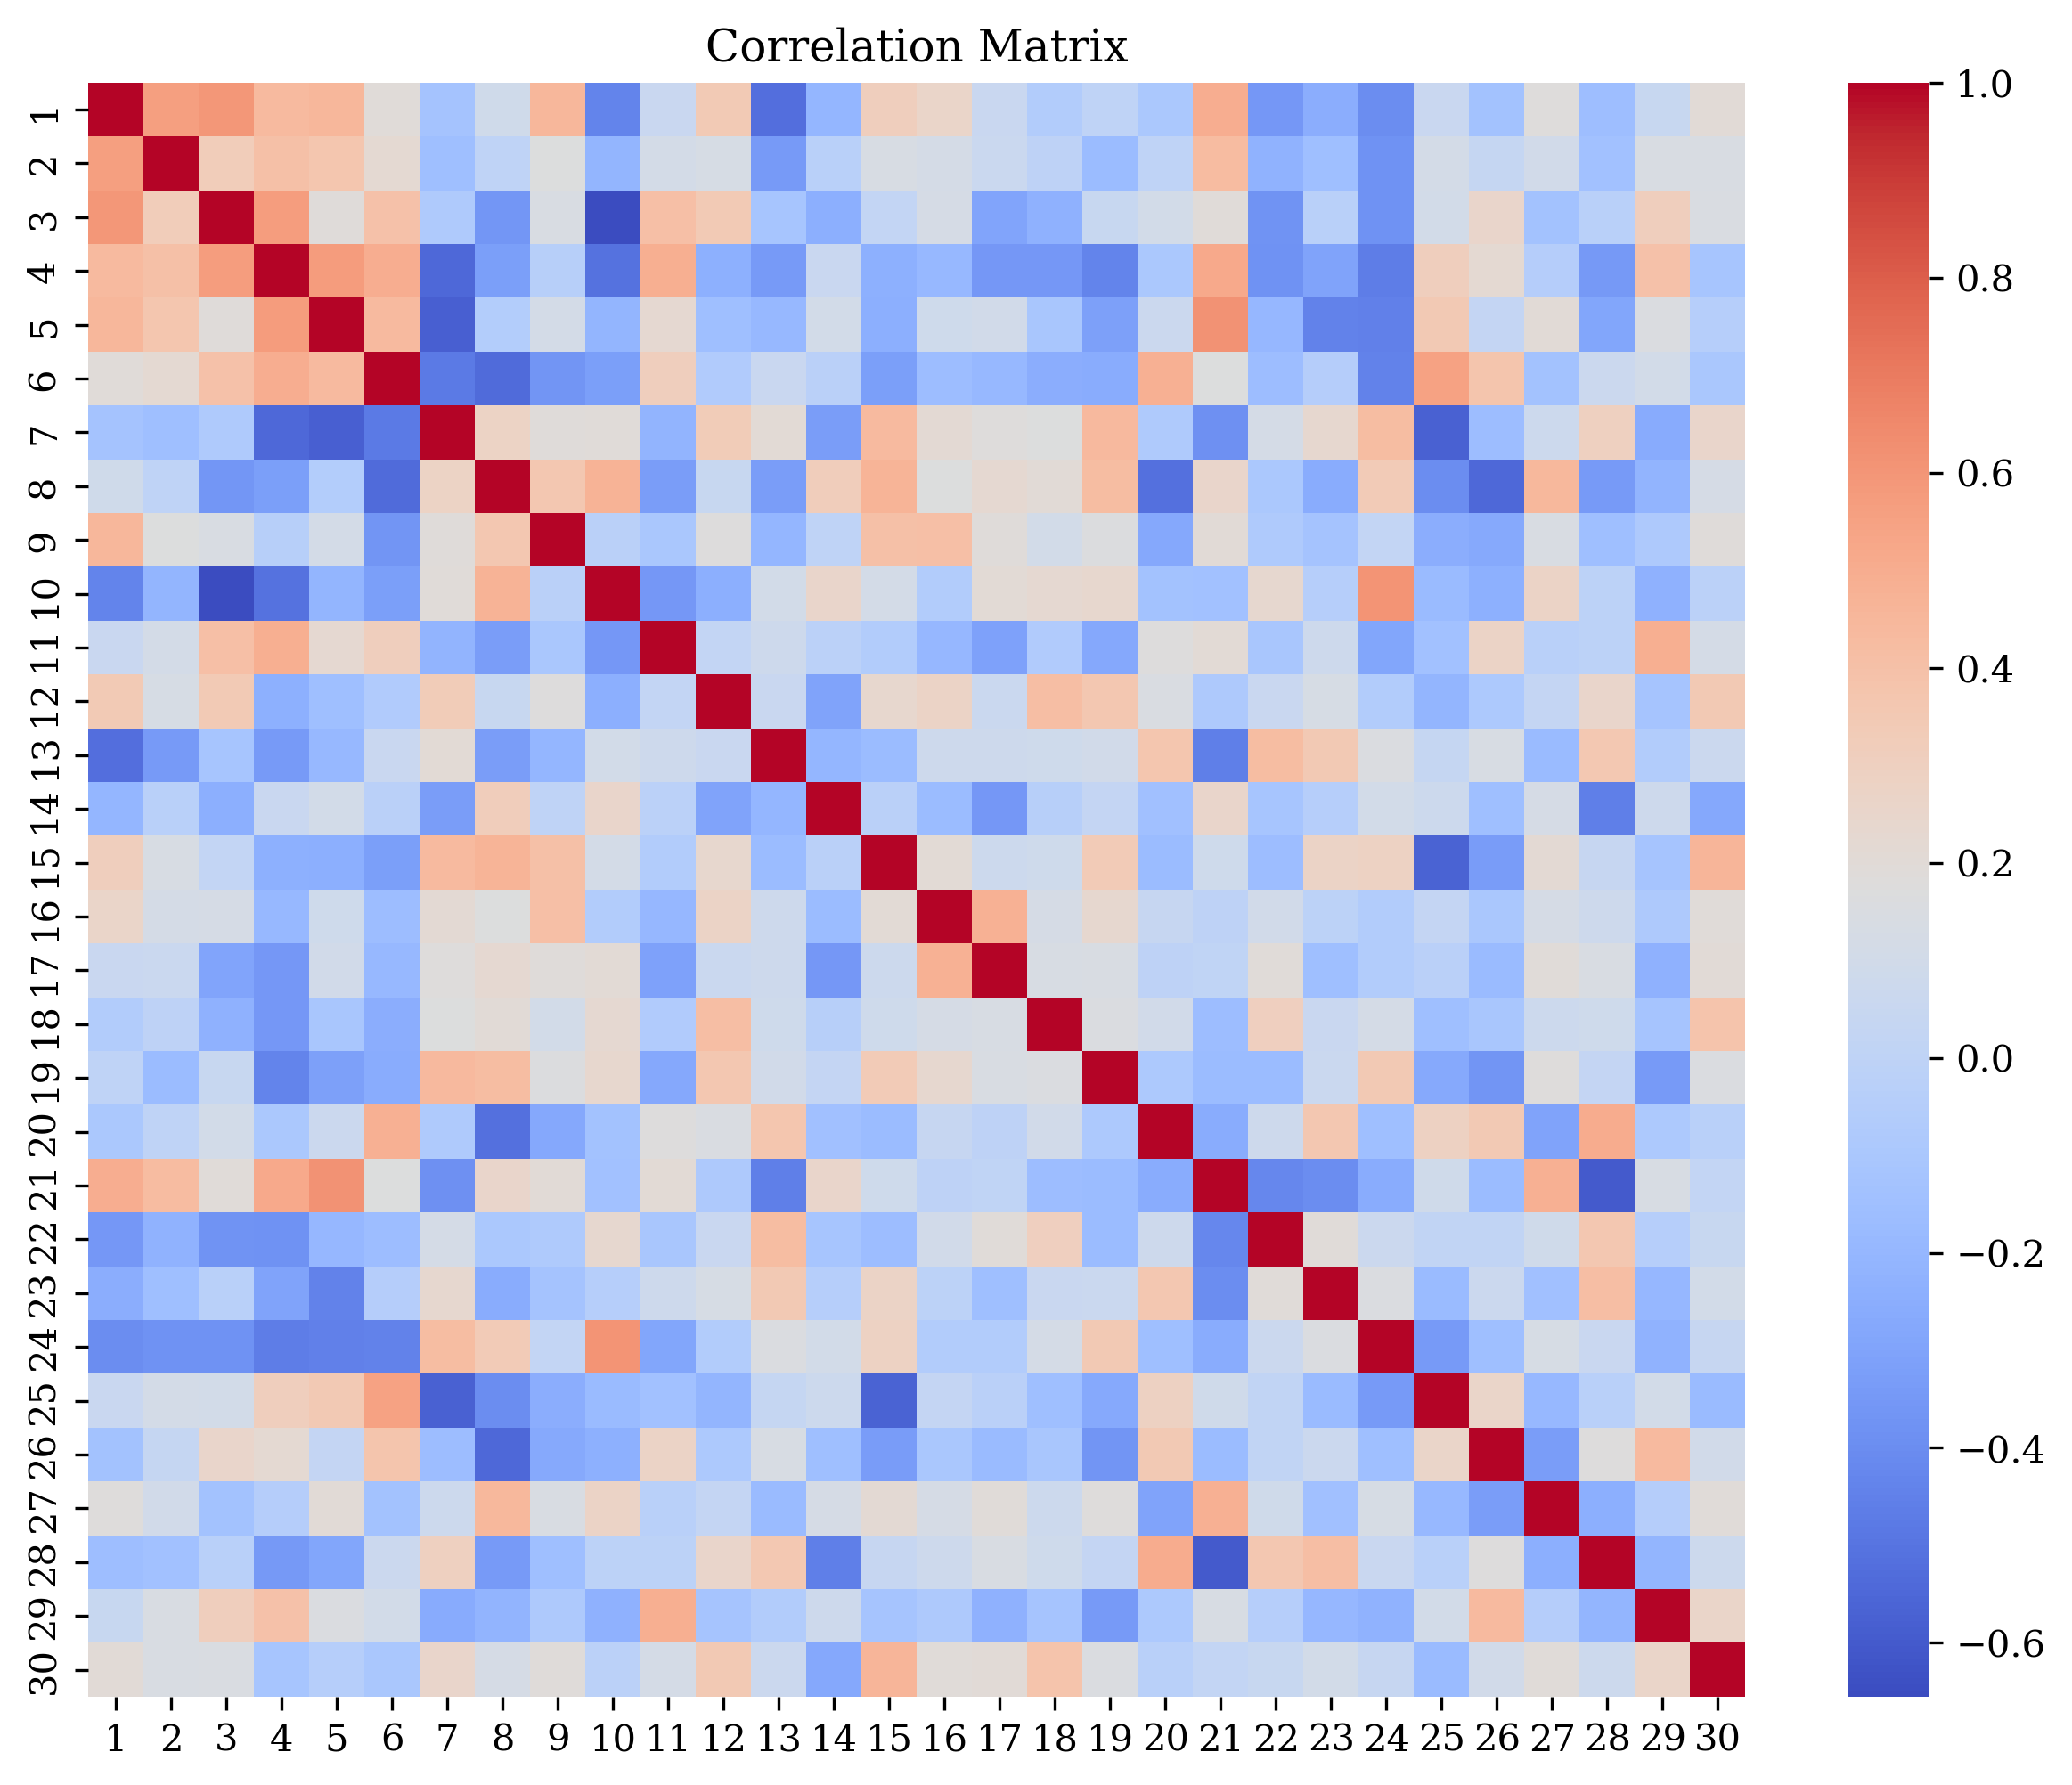

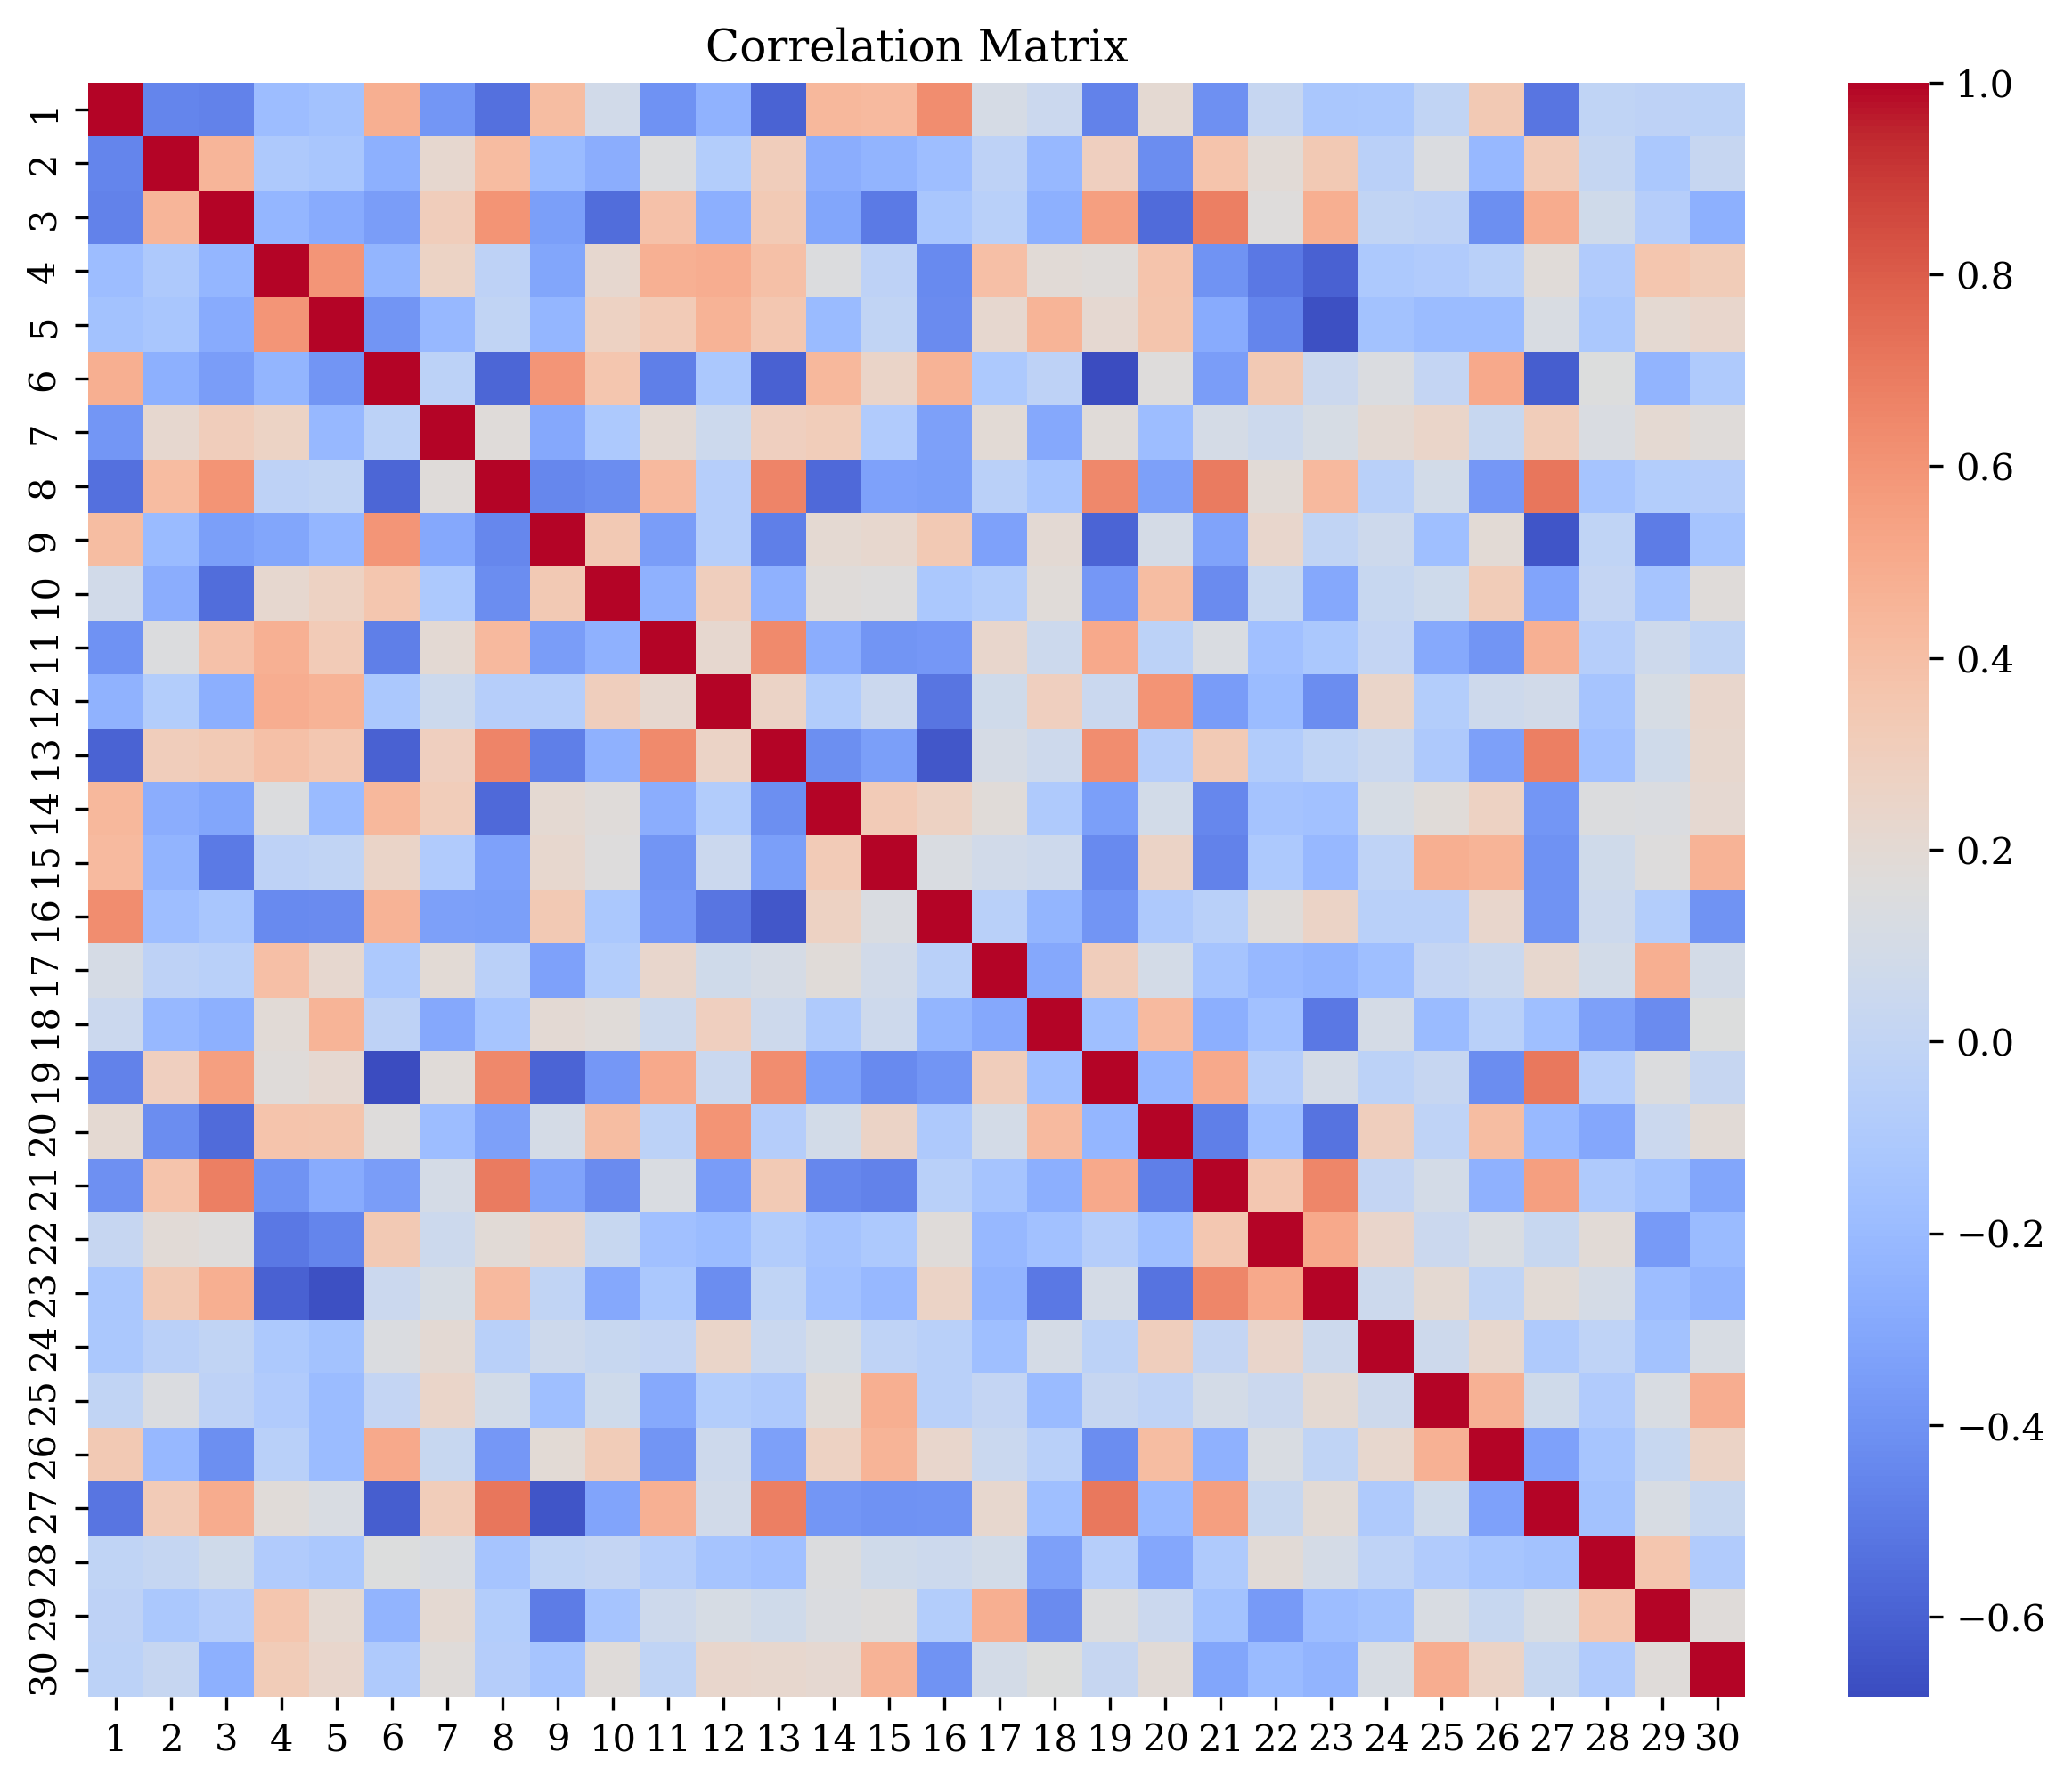

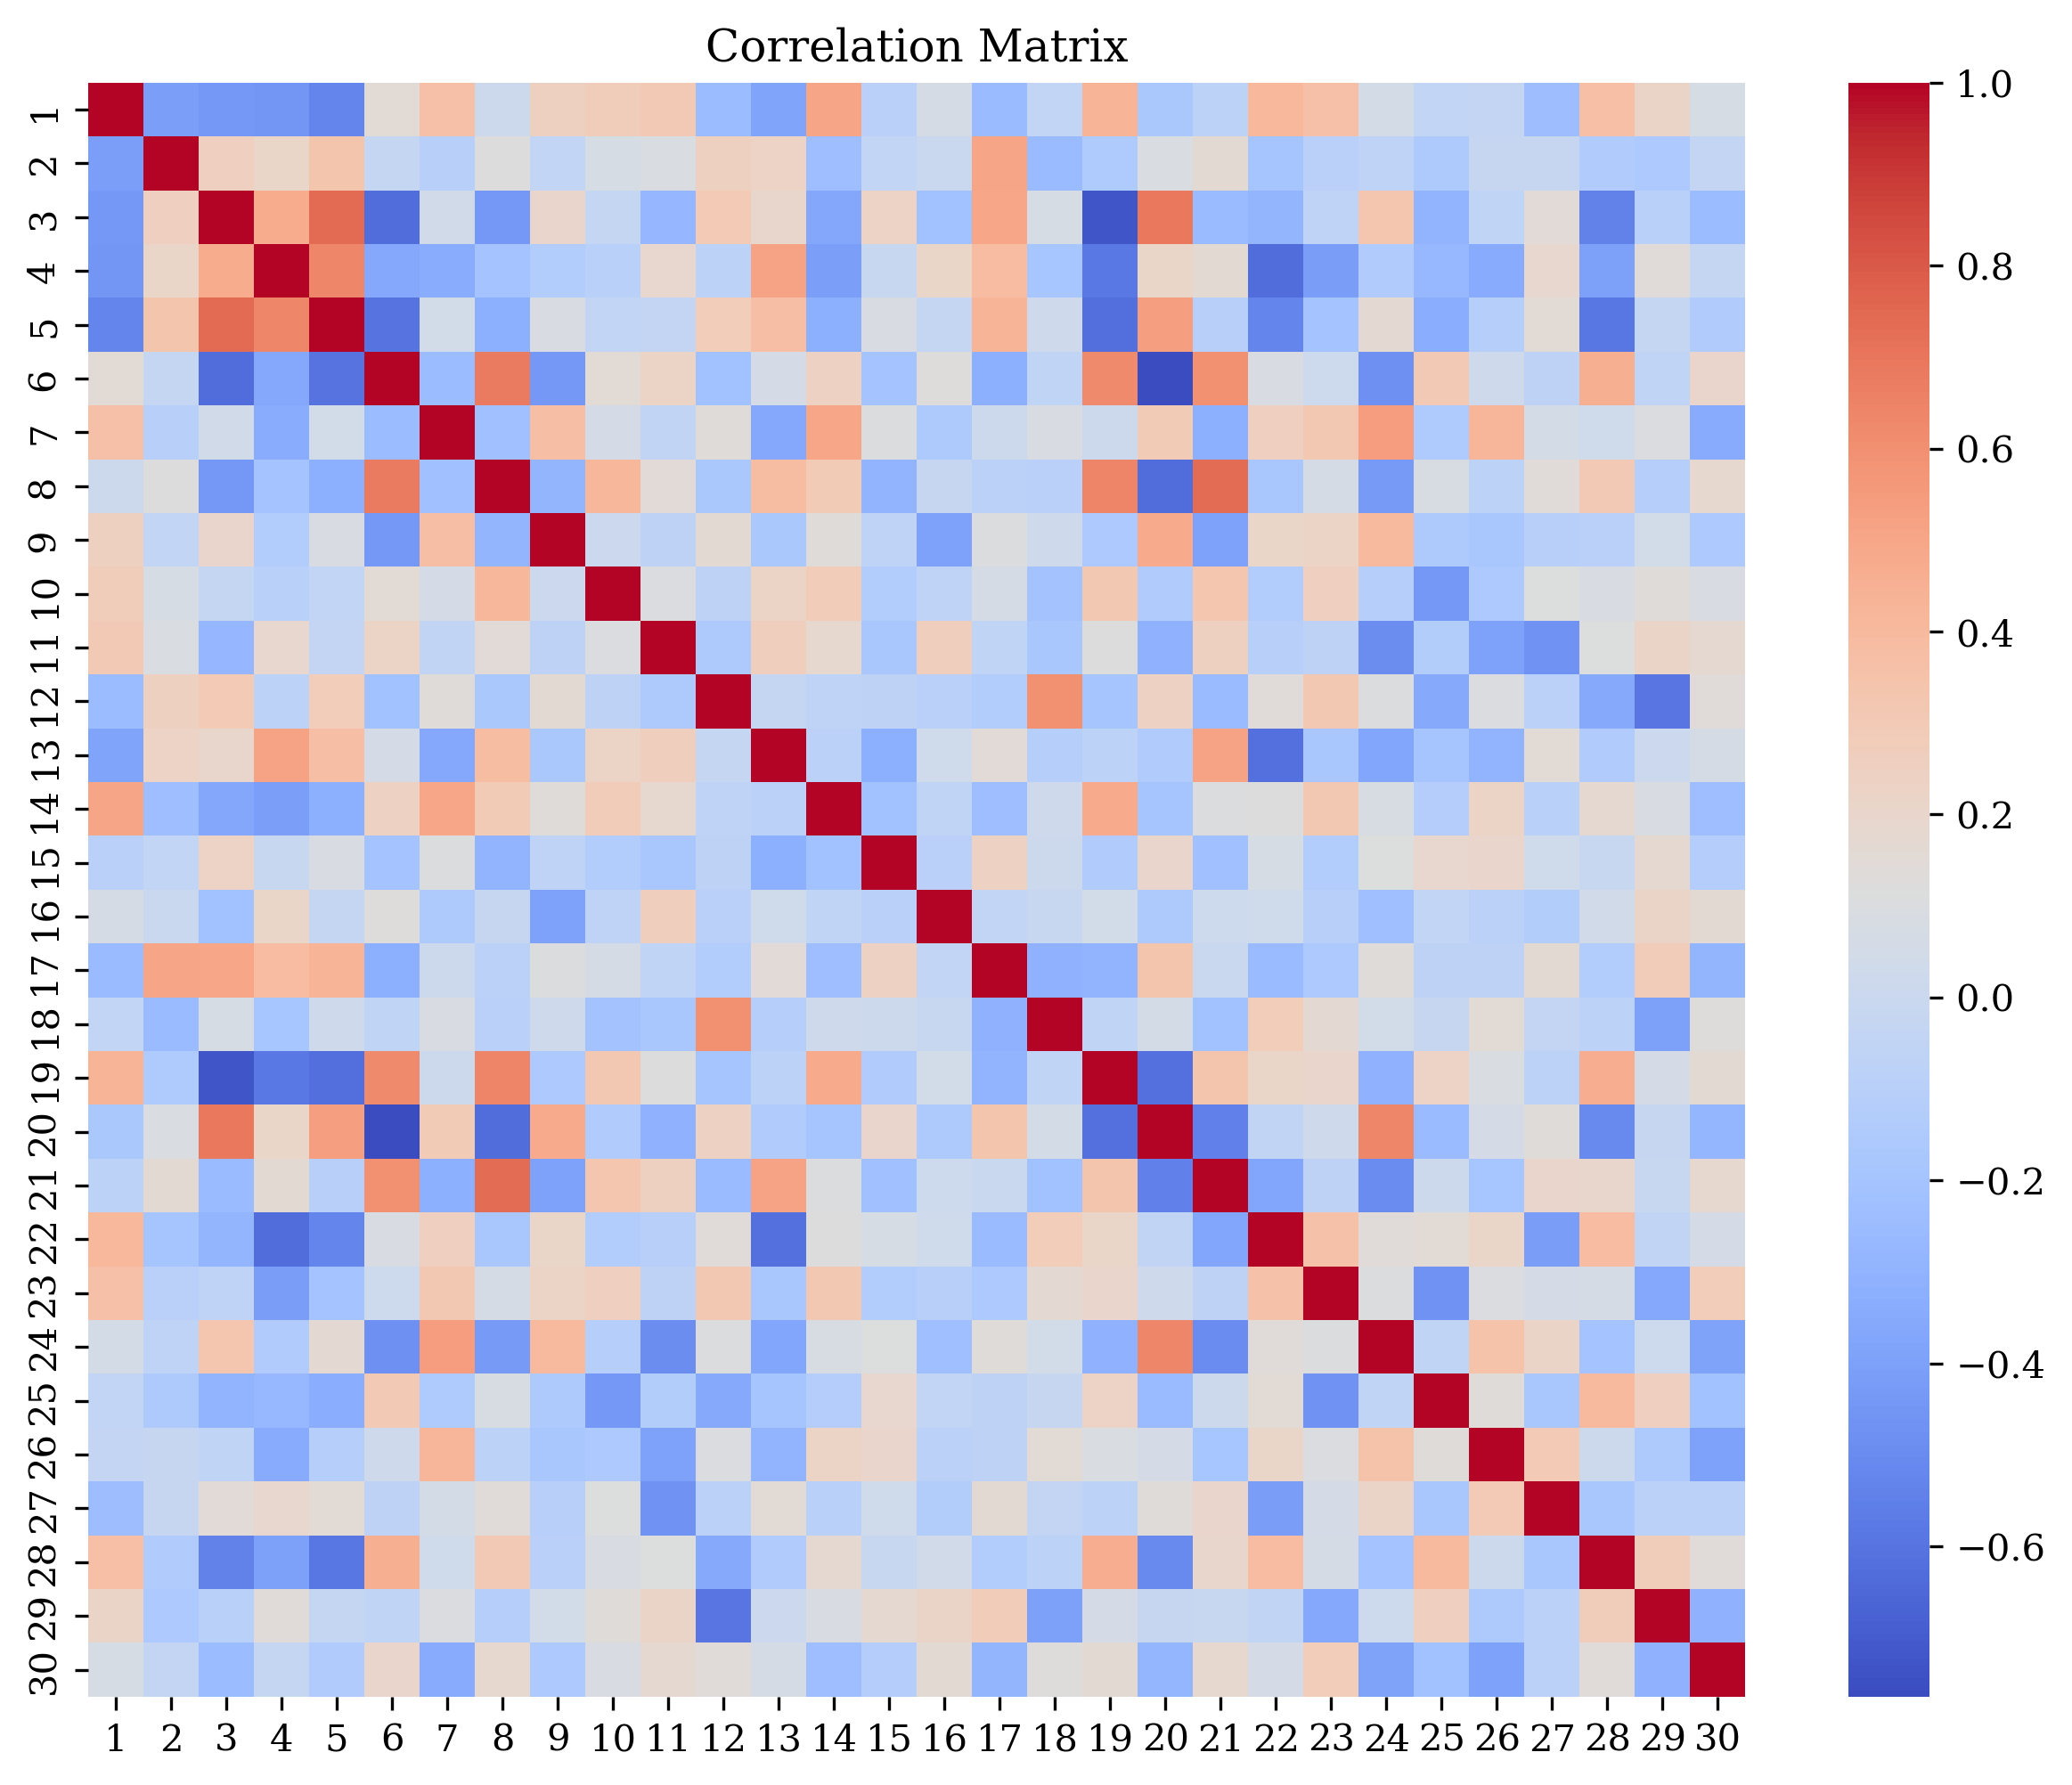

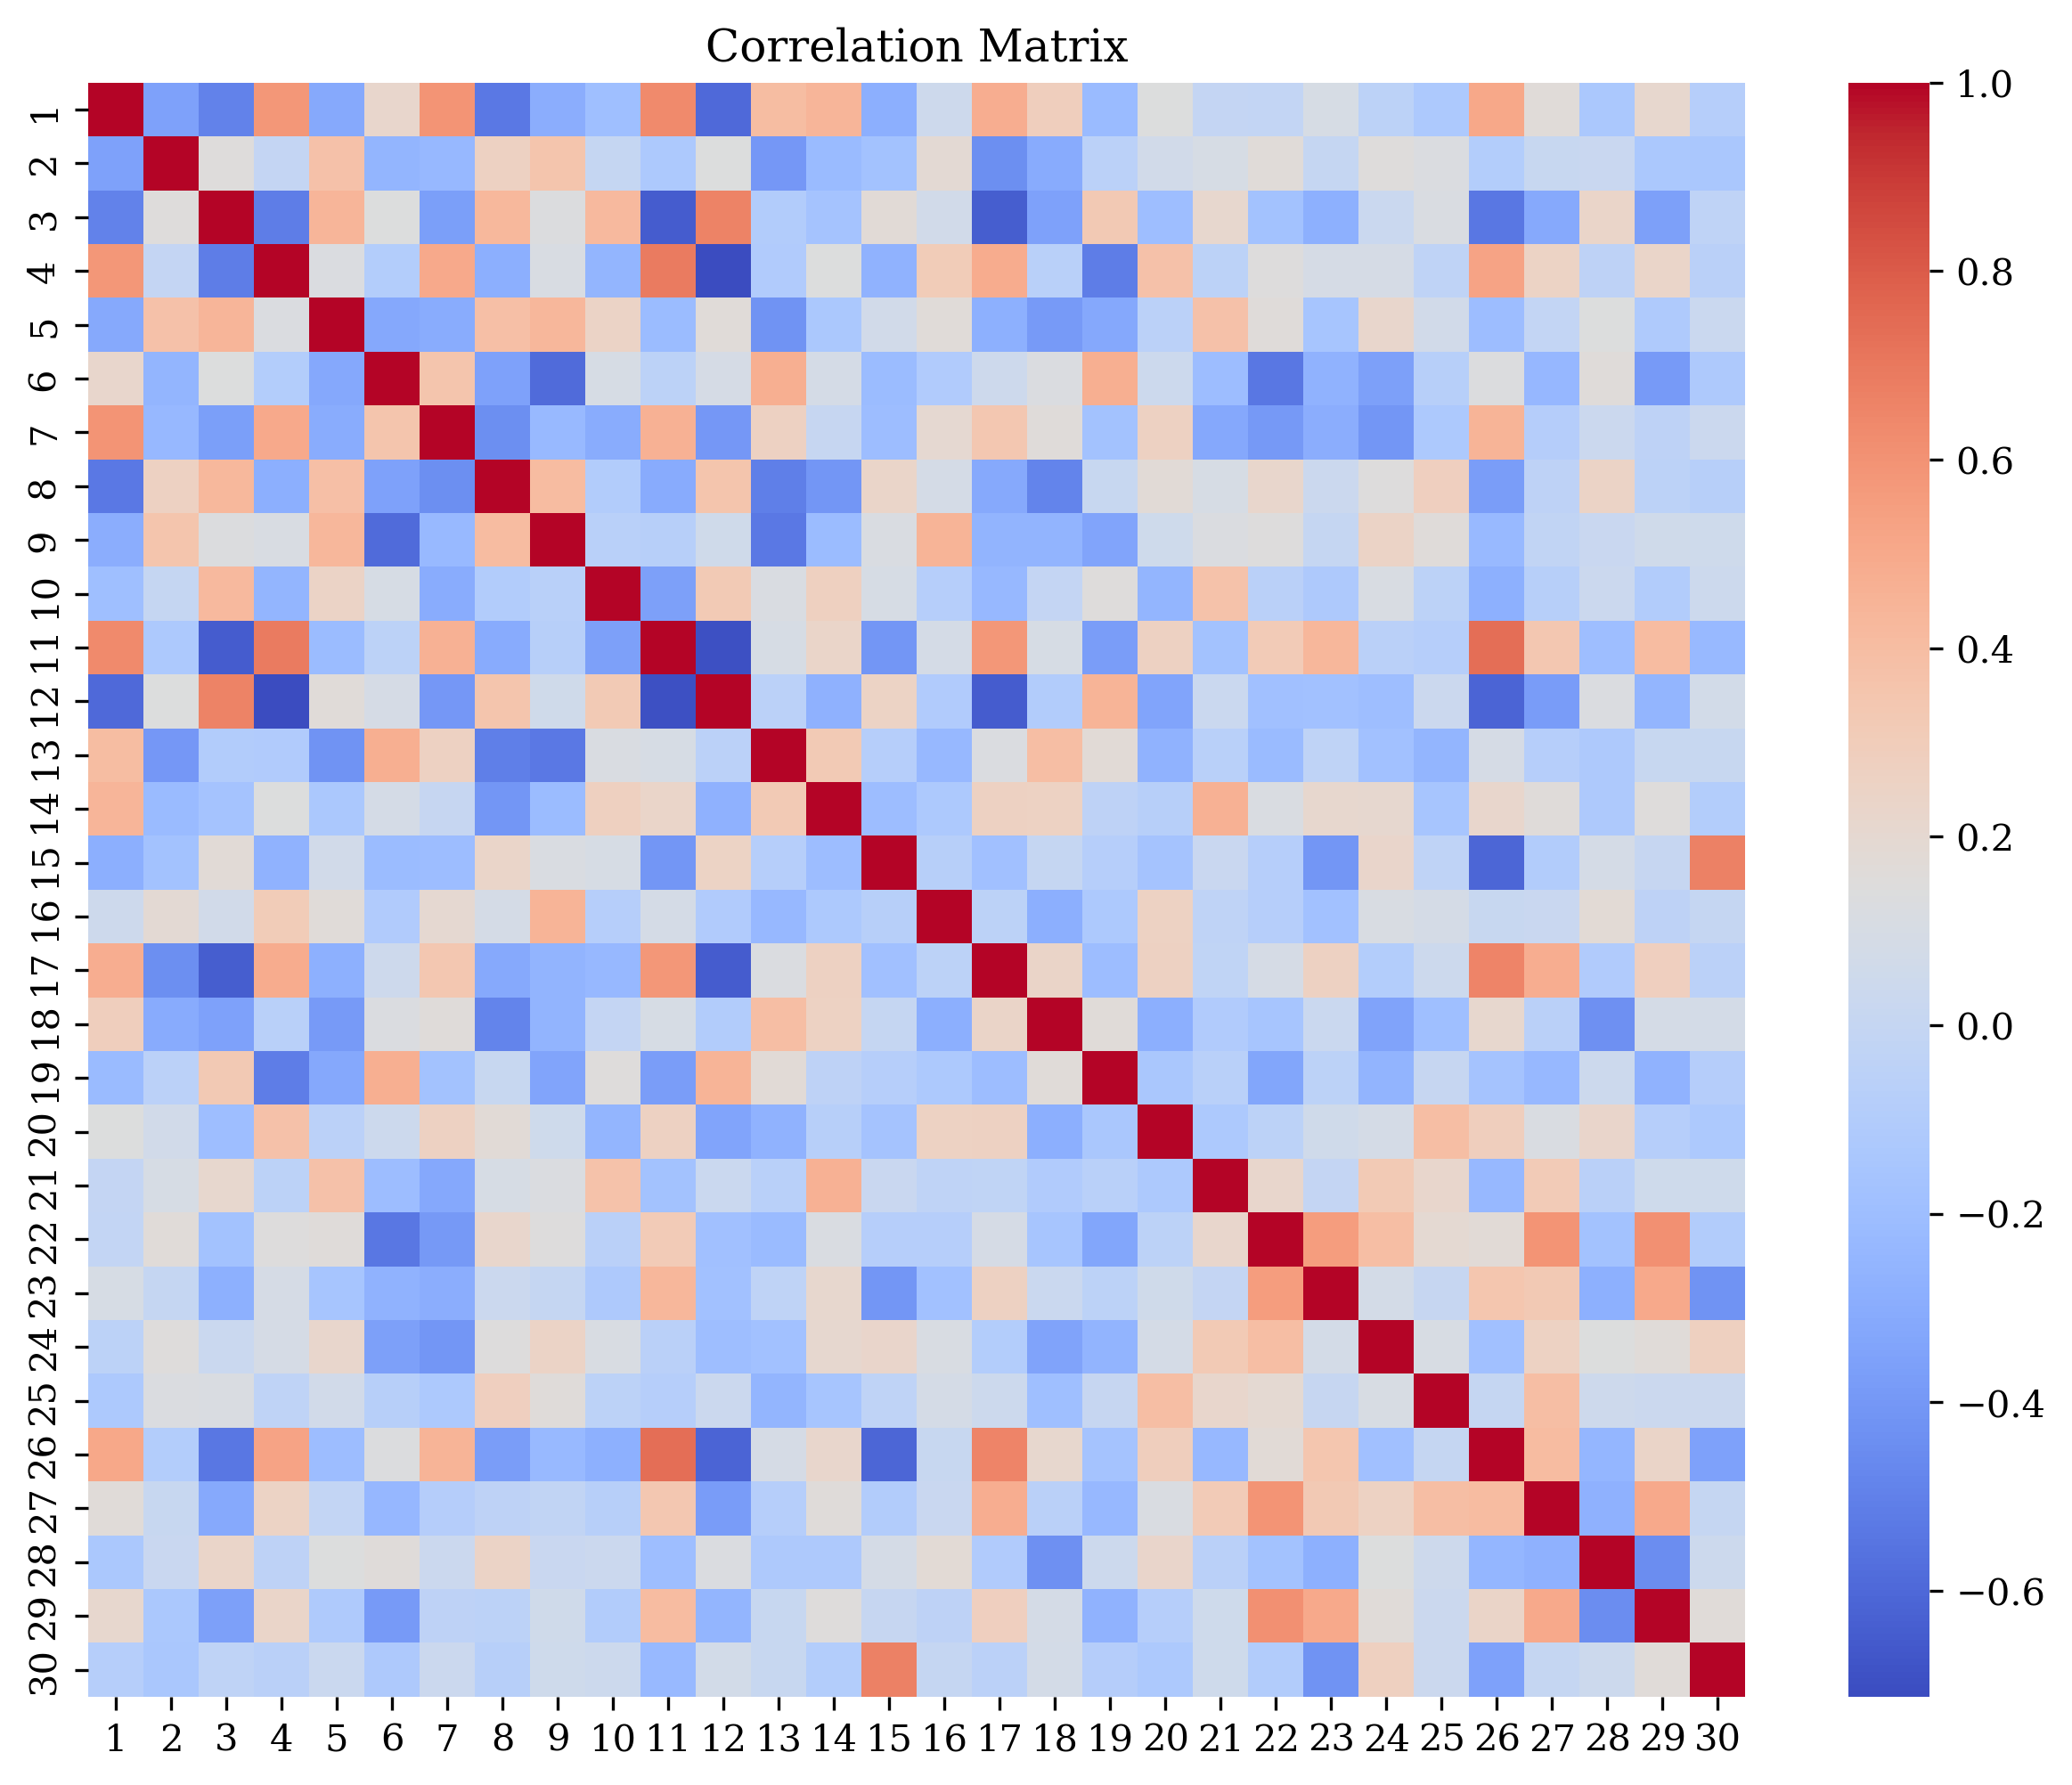

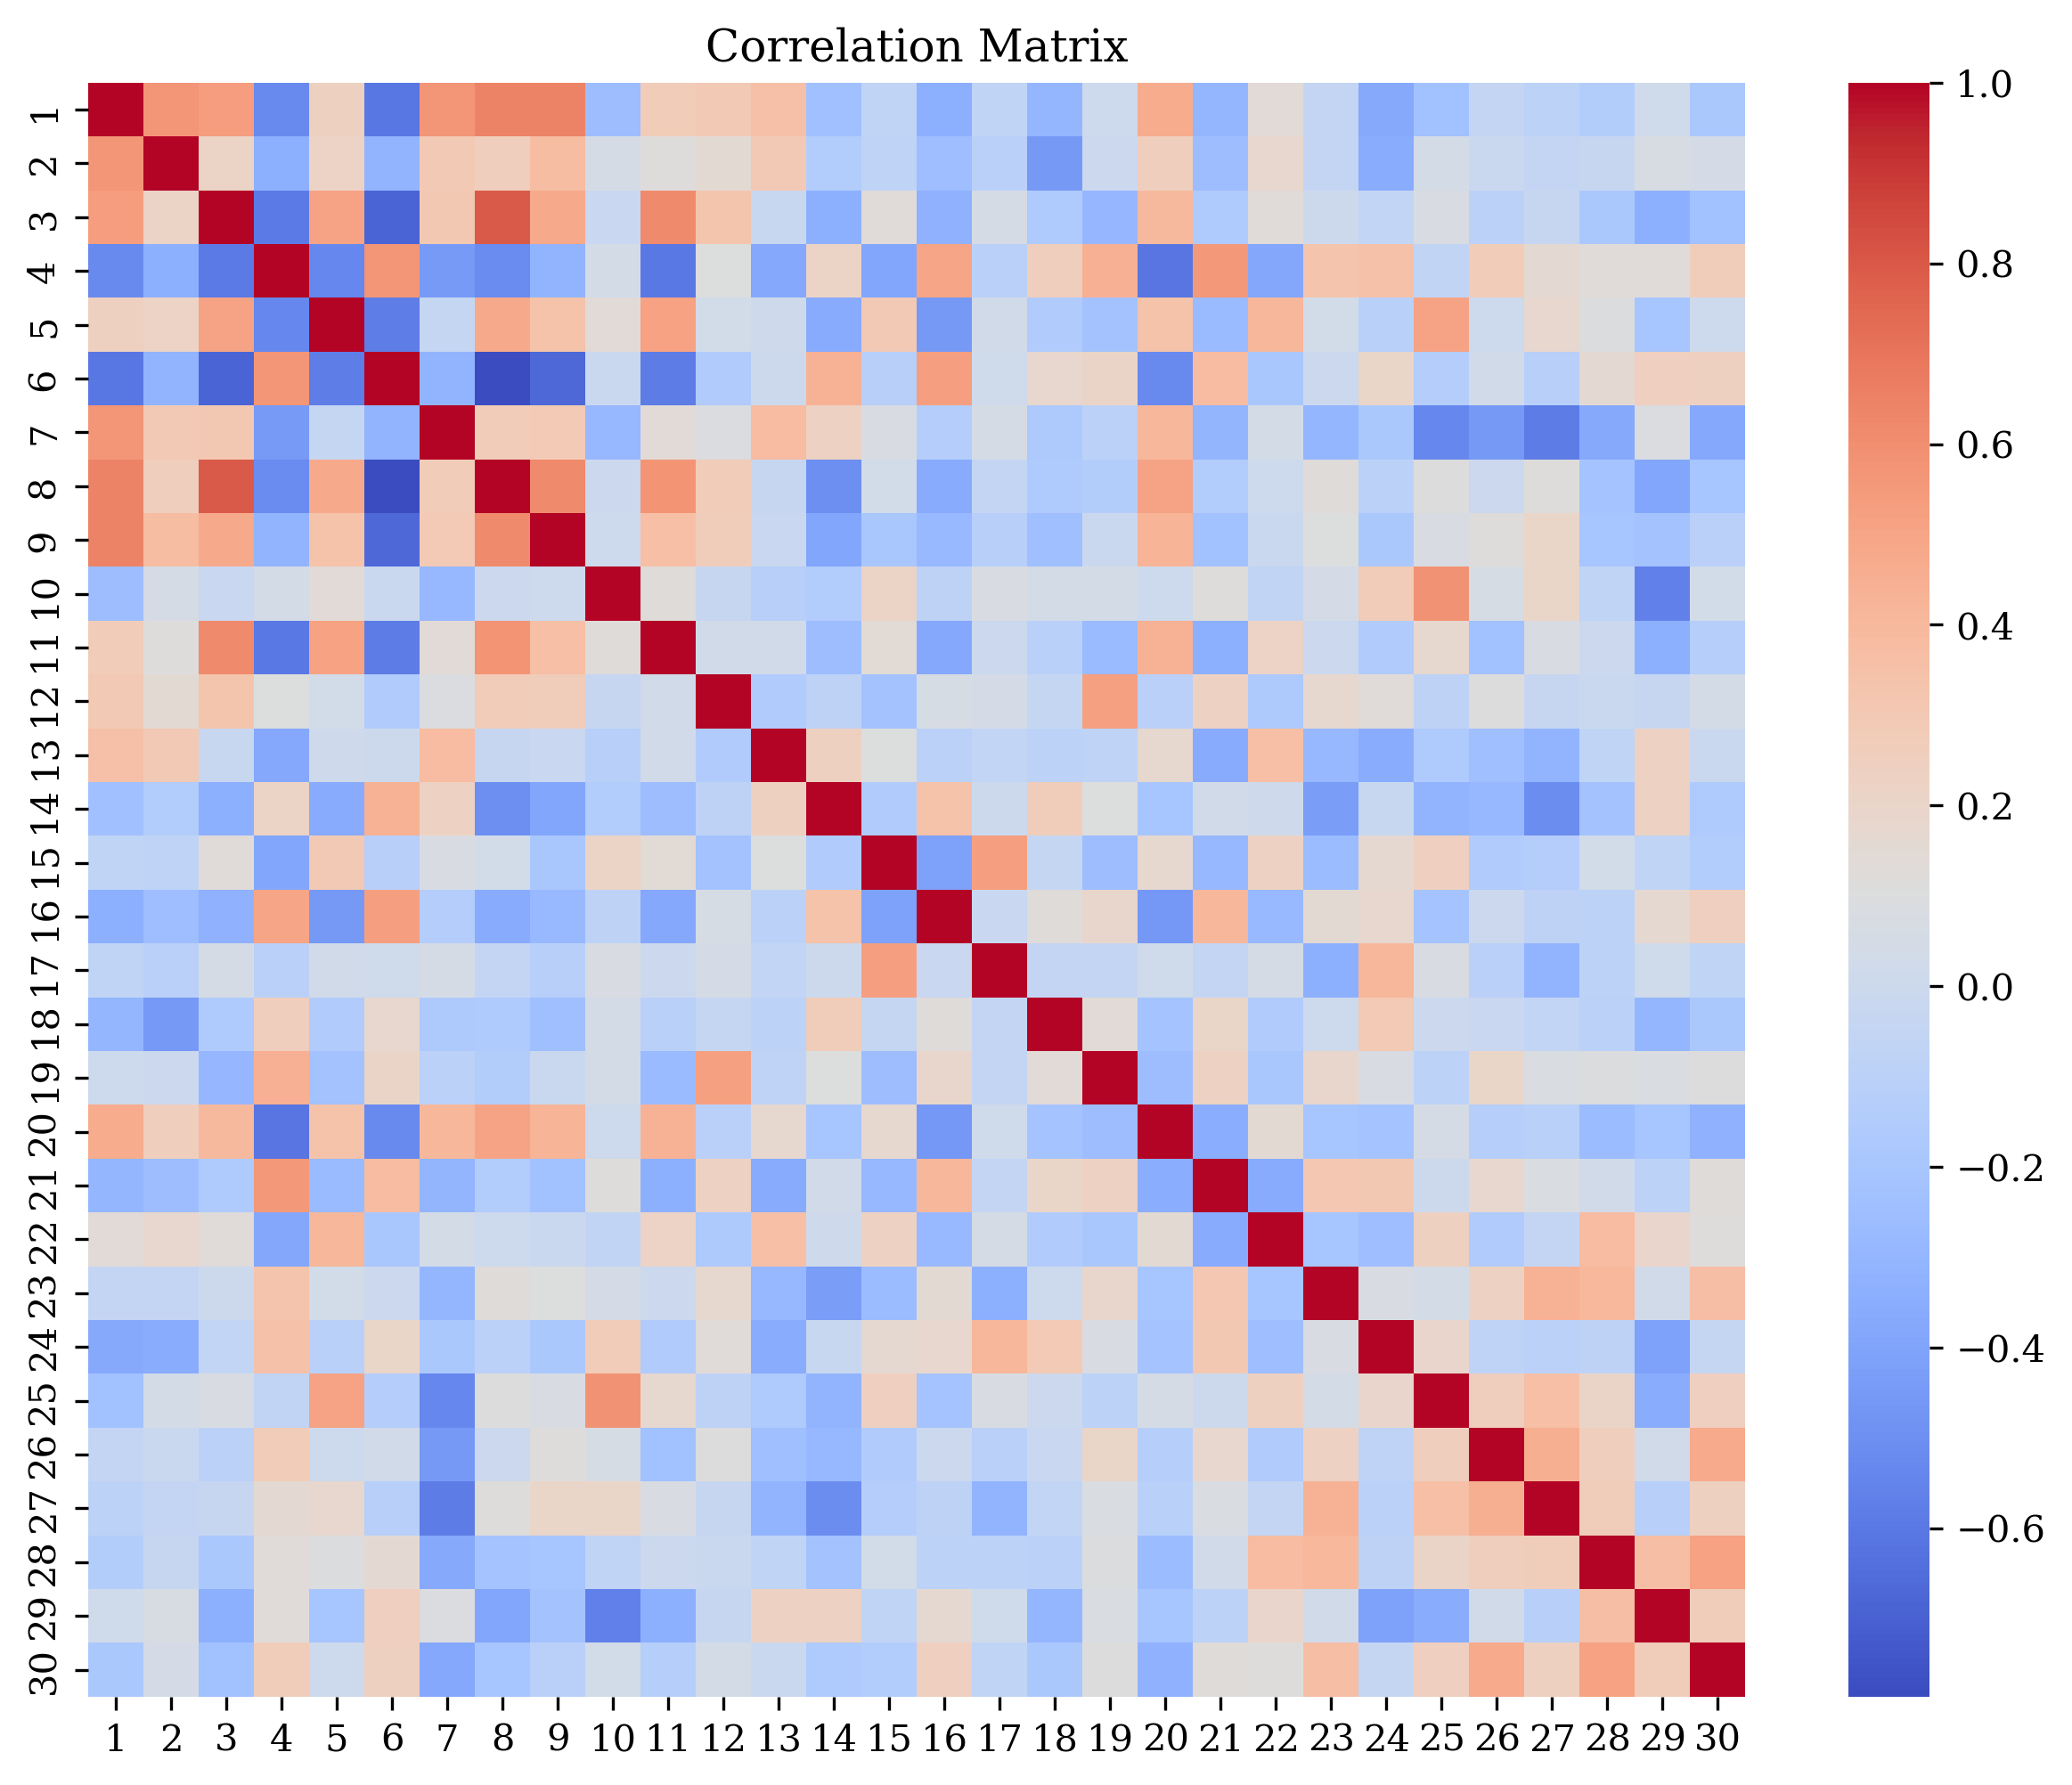

In [ ]:
def analyze_correlation(file_path):
    # Read the data file
    df = pd.read_csv(file_path, delimiter='\t')

    # Skip the first 3 columns
    df = df.iloc[:, 3:]

    # Number the remaining columns
    df.columns = range(1, len(df.columns) + 1)

    # Calculate correlation matrix
    correlation_matrix = df.corr()
    '''
    # Set figure size and DPI
    plt.figure(figsize=(12, 8), dpi=300)

    # Plot scatter plot for column 4 and column 9
    plt.scatter(df[4], df[5])
    plt.xlabel("Gene 1")
    plt.ylabel("Gene 5")
    plt.title("Scatter plot of Gene 1 vs Gene 5")

    # Calculate correlation for column 4 and column 9
    correlation = correlation_matrix.loc[4, 5]
    plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes)

    plt.show()
    '''
    # Set figure size and DPI for correlation matrix plot
    plt.figure(figsize=(10, 8), dpi=300)

    # Print correlation matrix as a table
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
    plt.title('Correlation Matrix')
    plt.show()

# Number of graphs
num_graphs = 10

analyze_correlation("/home/sanjana/Downloads/RACIPE/Periphery/c/graph_c_0_solution.dat")

# Analyze correlation for each - edge graph
for i in range(1, num_graphs + 1):
    file_path = f"/home/sanjana/Downloads/RACIPE/Periphery/c/-edge_graph_c_{i}_solution.dat"
    analyze_correlation(file_path)

# Analyze correlation for each + node graph
for i in range(1, num_graphs + 1):
    file_path = f"/home/sanjana/Downloads/RACIPE/Periphery/c/+node_graph_c_{i}_solution.dat"
    analyze_correlation(file_path)

## RMSE and Core Correlation

In [ ]:
def RACIPE_data_import(filename):
  Network = pd.read_table(filename[:-13] + '_solution.dat', sep ='\t', index_col  = False, header = None)
  Network_prs= pd.read_csv(filename[:-13] + '.prs', sep ='\t', index_col  = False)

  c = ['Model Number','Stable States','Number of Runs that converged']
  p = 'P'
  i = 0

  while p =='P':
    c.append(Network_prs.iloc[i,0][8:])
    p = Network_prs.iloc[i+1,0][0]
    i = i + 1
  Network.columns= c
  return Network

In [ ]:
cd /home/sanjana/Downloads/RACIPE/Periphery/c/

/home/sanjana/Downloads/RACIPE/Periphery/c


In [ ]:
ss = StandardScaler()

def rmse(*matrices):
    n = len(matrices)
    mse = np.sum([(np.sum((matrices[i] - matrices[j]) ** 2)) for i in range(n) for j in range(i + 1, n)]) / (n * (n - 1) / 2)
    rmse = np.sqrt(mse)
    return rmse

Networks_node=[]
Core_corr_mat_node=[]

### Base Core and Periphery

In [ ]:
base = RACIPE_data_import('graph_c_0_solution.dat')
base.iloc[:,3:] = ss.fit_transform(base.iloc[:,3:])
base_corr = base.loc[:,['1','4','5','9']].corr()
#base_corr
#base
cols=list(net.columns)[3:]
cols.remove('1')
cols.remove('4')
cols.remove('5')
cols.remove('9')
#cols
base_corr_peri = base.loc[:,cols].corr()
base_corr_peri

,6,7,8,11,13,14,15,18,19,2,3,16,17,10,12,20
6,1.000000,0.136882,0.694659,-0.065468,0.269981,-0.474079,0.182325,-0.330655,0.389033,0.229203,0.059617,0.066984,-0.045127,0.192172,-0.708958,0.663875
7,0.136882,1.000000,0.230763,-0.335365,0.099292,0.409684,0.411588,0.266655,-0.419203,0.114668,0.336534,-0.466088,-0.402040,-0.677815,-0.217983,0.382217
8,0.694659,0.230763,1.000000,-0.006853,0.226962,-0.218936,0.259487,-0.201293,0.252713,0.281031,0.195569,-0.162374,-0.142203,0.017399,-0.588078,0.639026
11,-0.065468,-0.335365,-0.006853,1.000000,-0.070852,-0.004147,0.034019,-0.044397,0.196114,-0.331737,-0.033658,0.070503,0.164655,0.212140,0.096337,-0.218995
13,0.269981,0.099292,0.226962,-0.070852,1.000000,-0.327561,-0.003014,-0.044172,-0.048649,0.051110,-0.017267,0.102126,-0.070372,-0.051054,-0.310353,0.359650
14,-0.474079,0.409684,-0.218936,-0.004147,-0.327561,1.000000,0.223033,0.449537,-0.511309,-0.077121,0.353323,-0.497954,-0.187891,-0.585894,0.346647,-0.396232
15,0.182325,0.411588,0.259487,0.034019,-0.003014,0.223033,1.000000,-0.070316,-0.337499,0.068421,0.291364,-0.578323,-0.377940,-0.216472,-0.236937,0.186711
18,-0.330655,0.266655,-0.201293,-0.044397,-0.044172,0.449537,-0.070316,1.000000,-0.312274,-0.036229,0.210729,-0.271562,-0.218416,-0.511475,0.224319,-0.270628
19,0.389033,-0.419203,0.252713,0.196114,-0.048649,-0.511309,-0.337499,-0.312274,1.000000,0.033304,-0.271857,0.416227,0.506693,0.522726,-0.056372,0.185164
2,0.229203,0.114668,0.281031,-0.331737,0.051110,-0.077121,0.068421,-0.036229,0.033304,1.000000,0.155407,-0.058705,-0.144257,0.075499,-0.237504,0.212882


### Node Core

In [ ]:
Networks_node_core=[]
corr_mat_node_core=[]

for i in range(1,11):
  sol_file='+node_graph_c_'+str(i)+'_solution.dat'
  net = RACIPE_data_import(sol_file)

  net.iloc[:,3:] = ss.fit_transform(net.iloc[:,3:])
  Networks_node_core.append(net)
  corr_mat_node_core.append(net.loc[:,['1','4','5','9']].corr())

"""for i in range(10):
  print(rmse(base_corr, corr_mat_node_core[i]))"""

rmse_values_node_core=[]
for i in range(10):
  rmse_values_node_core.append(rmse(base_corr, corr_mat_node_core[i]))
rmse_values_node_core
print(np.mean(rmse_values_node_core), np.std(rmse_values_node_core))

2.523646195480737 0.8129452736254451


### Node Periphery

In [ ]:
Networks_node_peri=[]
corr_mat_node_peri=[]

for i in range(1,11):
  sol_file='+node_graph_c_'+str(i)+'_solution.dat'
  net = RACIPE_data_import(sol_file)

  net.iloc[:,3:] = ss.fit_transform(net.iloc[:,3:])
  Networks_node_peri.append(net)
  corr_mat_node_peri.append(net.loc[:,cols].corr())

"""for i in range(10):
  print(rmse(base_corr_peri, corr_mat_node_peri[i]))"""

rmse_values_node_peri=[]
for i in range(10):
  rmse_values_node_peri.append(rmse(base_corr_peri, corr_mat_node_peri[i]))

rmse_values_node_peri
print(np.mean(rmse_values_node_peri), np.std(rmse_values_node_peri))

6.438354364626529 0.2588181440266194


### Edge Core

In [ ]:
Networks_edge_core=[]
corr_mat_edge_core=[]

for i in range(1,11):
  sol_file='-edge_graph_c_'+str(i)+'_solution.dat'
  net = RACIPE_data_import(sol_file)

  net.iloc[:,3:] = ss.fit_transform(net.iloc[:,3:])
  Networks_edge_core.append(net)
  corr_mat_edge_core.append(net.loc[:,['1','4','5','9']].corr())

"""for i in range(10):
  print(rmse(base_corr, corr_mat_edge_core[i]))"""

rmse_values_edge_core=[]
for i in range(10):
  rmse_values_edge_core.append(rmse(base_corr, corr_mat_edge_core[i]))
rmse_values_edge_core
print(np.mean(rmse_values_edge_core), np.std(rmse_values_edge_core))

2.227884270723156 1.0318335171965582


### Edge Periphery

In [ ]:
Networks_edge_peri=[]
corr_mat_edge_peri=[]

for i in range(1,11):
  sol_file='-edge_graph_c_'+str(i)+'_solution.dat'
  net = RACIPE_data_import(sol_file)

  net.iloc[:,3:] = ss.fit_transform(net.iloc[:,3:])
  Networks_edge_peri.append(net)
  corr_mat_edge_peri.append(net.loc[:,cols].corr())

"""for i in range(10):
  print(rmse(base_corr_peri,corr_mat_edge_peri[i]))"""

rmse_values_edge_peri=[]
for i in range(10):
  rmse_values_edge_peri.append(rmse(base_corr_peri, corr_mat_edge_peri[i]))

rmse_values_edge_peri
print(np.mean(rmse_values_edge_peri), np.std(rmse_values_edge_peri))

6.553783744958826 0.6559542465761576


## Generating the Correlation Matrices

### Base

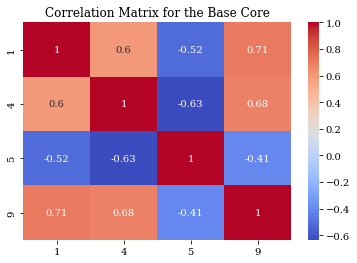

In [ ]:
sns.heatmap(base.loc[:,['1','4','5','9']].corr(), cmap='coolwarm', annot= True)
plt.title('Correlation Matrix for the Base Core')
plt.show()

### -Edge Case

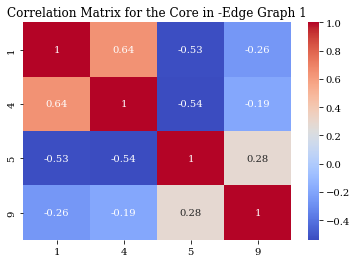

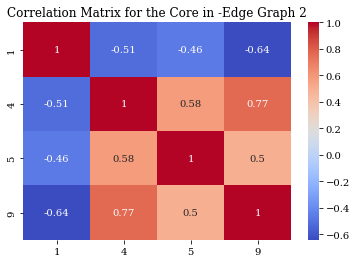

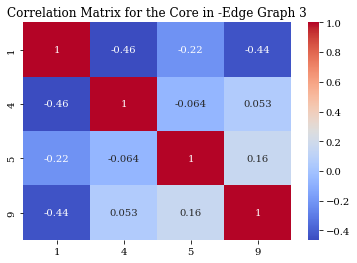

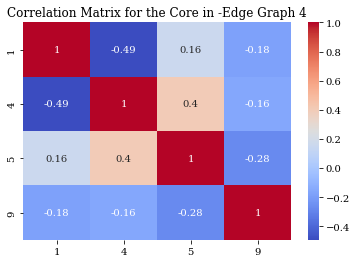

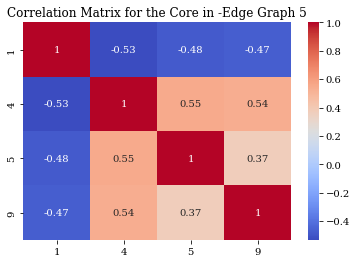

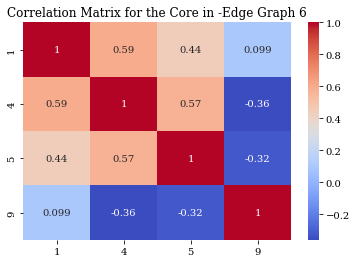

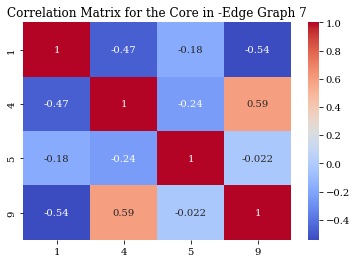

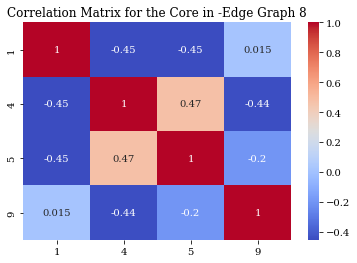

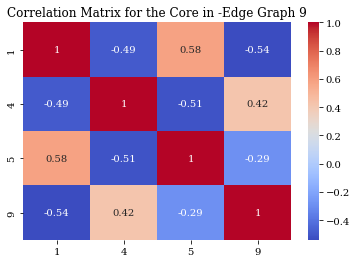

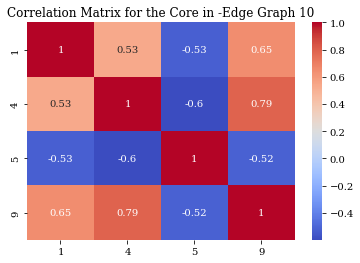

In [ ]:
for i in range(10):
    sns.heatmap(corr_mat_node_core[i], cmap='coolwarm',annot=True)
    plt.title(f'Correlation Matrix for the Core in -Edge Graph {i+1}')
    plt.show()

### +Node Case

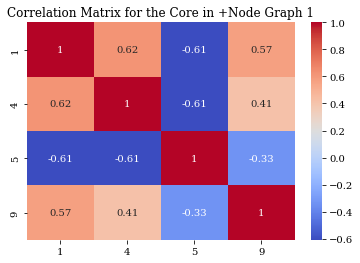

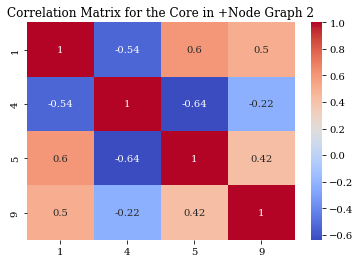

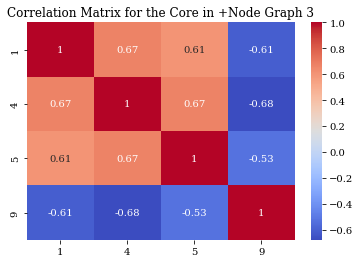

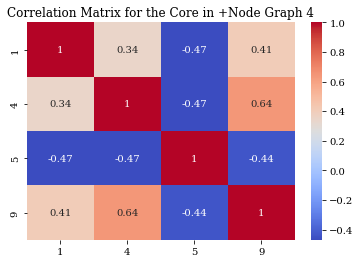

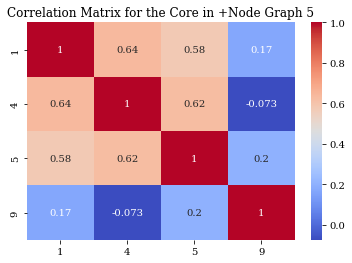

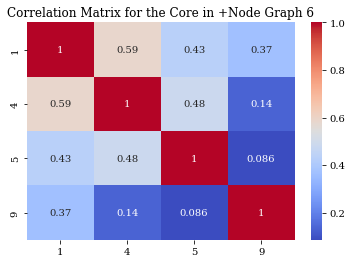

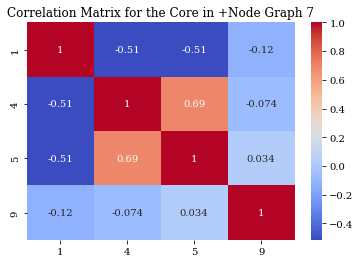

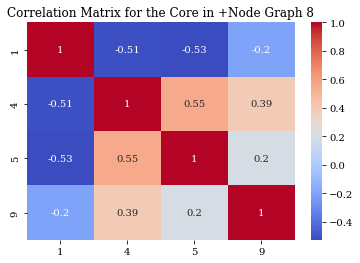

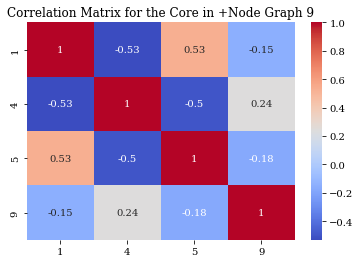

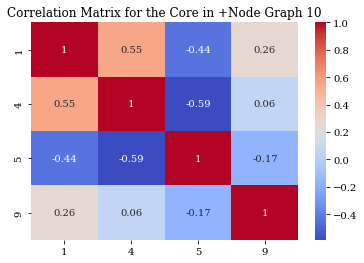

In [ ]:
for i in range(10):
    sns.heatmap(corr_mat_edge_core[i], cmap='coolwarm',annot=True)
    plt.title(f'Correlation Matrix for the Core in +Node Graph {i+1}')
    plt.show()

## Generating Statistical Graphs

In [ ]:
ploting_data=pd.DataFrame(columns=['rmse','Location','Perturbation Type'])

In [ ]:
ploting_data_nc=pd.DataFrame(columns=['rmse','Location','Perturbation Type'])
ploting_data_nc.loc[:,'rmse'] = rmse_values_node_core
ploting_data_nc.loc[:,'Location'] = 'Core'
ploting_data_nc.loc[:,'Perturbation Type'] = 'Node'

ploting_data=ploting_data.append(ploting_data_nc)
ploting_data

,rmse,Location,Perturbation Type
0,2.091413,Core,Node
1,3.275960,Core,Node
2,2.668656,Core,Node
3,2.904518,Core,Node
4,3.056505,Core,Node
5,2.770025,Core,Node
6,2.501155,Core,Node
7,2.866406,Core,Node
8,2.842202,Core,Node
9,0.259623,Core,Node


In [ ]:
ploting_data_np=pd.DataFrame(columns=['rmse','Location','Perturbation Type'])
ploting_data_np.loc[:,'rmse'] = rmse_values_node_peri
ploting_data_np.loc[:,'Location'] = 'Periphery'
ploting_data_np.loc[:,'Perturbation Type'] = 'Node'

ploting_data= ploting_data.append(ploting_data_np)
ploting_data

,rmse,Location,Perturbation Type
0,2.091413,Core,Node
1,3.275960,Core,Node
2,2.668656,Core,Node
3,2.904518,Core,Node
4,3.056505,Core,Node
5,2.770025,Core,Node
6,2.501155,Core,Node
7,2.866406,Core,Node
8,2.842202,Core,Node
9,0.259623,Core,Node


In [ ]:
ploting_data_ec=pd.DataFrame(columns=['rmse','Location','Perturbation Type'])
ploting_data_ec.loc[:,'rmse'] = rmse_values_edge_core
ploting_data_ec.loc[:,'Location'] = 'Core'
ploting_data_ec.loc[:,'Perturbation Type'] = 'Edge'

ploting_data= ploting_data.append(ploting_data_ec)
#ploting_data

In [ ]:
ploting_data_ep=pd.DataFrame(columns=['rmse','Location','Perturbation Type'])
ploting_data_ep.loc[:,'rmse'] = rmse_values_edge_peri
ploting_data_ep.loc[:,'Location'] = 'Periphery'
ploting_data_ep.loc[:,'Perturbation Type'] = 'Edge'

ploting_data= ploting_data.append(ploting_data_ep)
#ploting_data

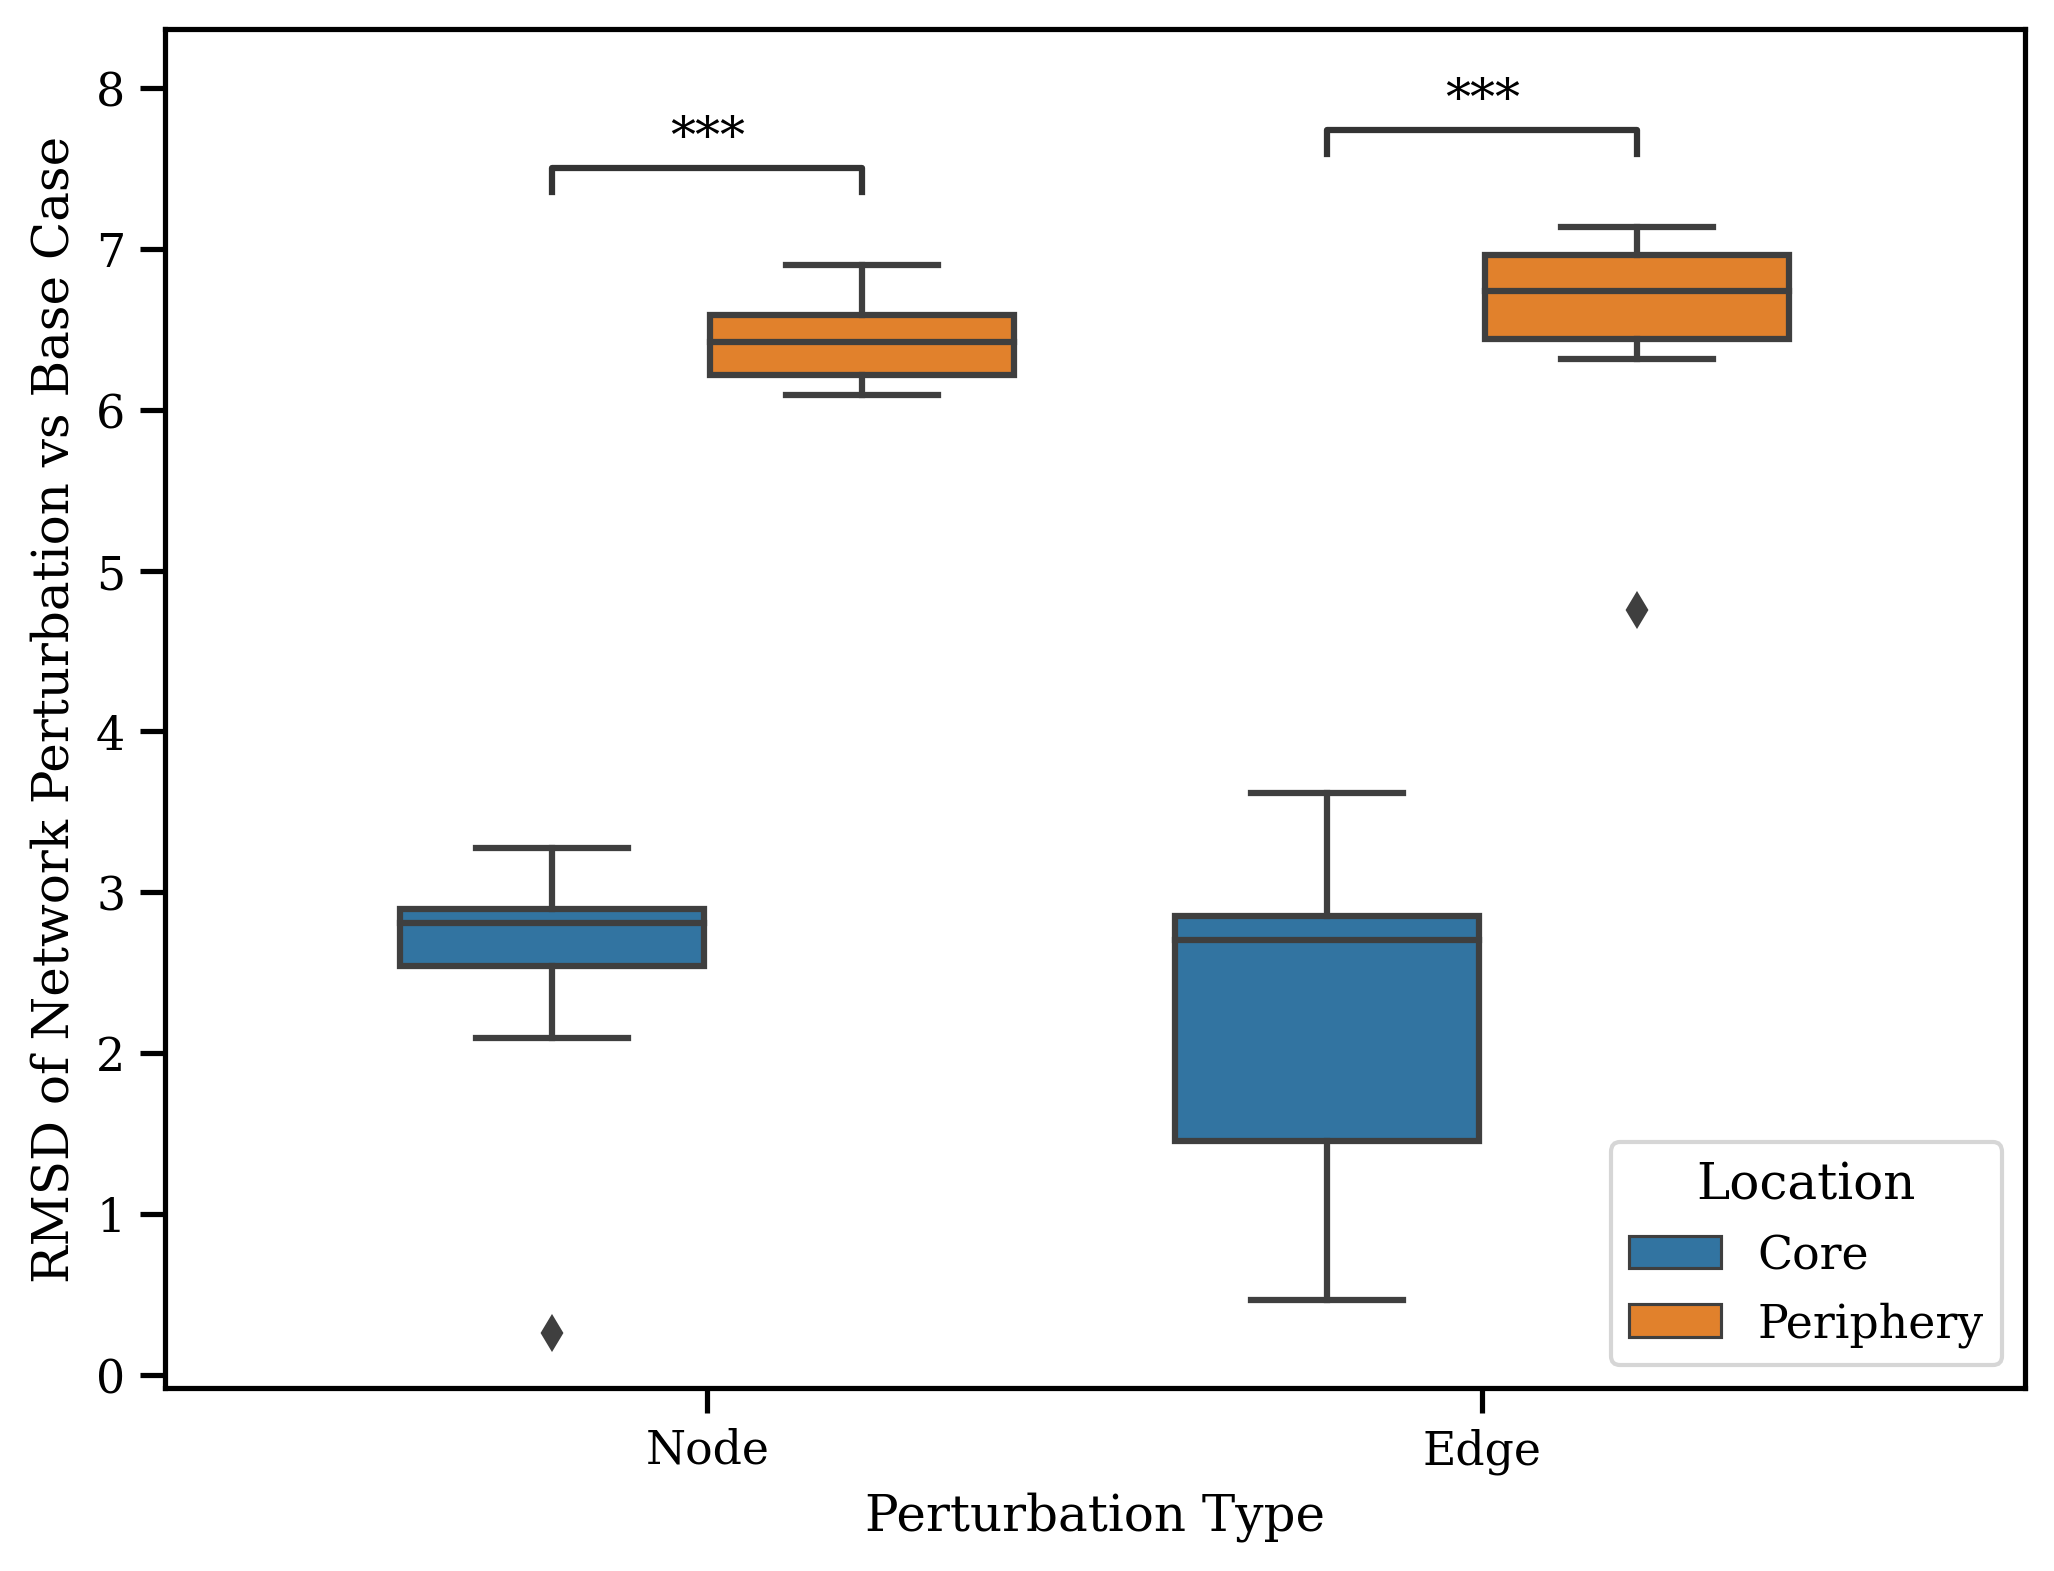

In [ ]:
pairs = [
    [( 'Edge','Core',), ( 'Edge','Periphery',)],
    [( 'Node','Core'),( 'Node','Periphery')],

]
hue_plot_params = {
    'data': ploting_data,
    'x': "Perturbation Type",
    'y': "rmse",

    "hue": "Location",

}

plt.figure(figsize=(8, 6), dpi=300)

with sns.plotting_context("notebook"):
    # Create new plot
    ax = sns.boxplot(y="rmse", hue="Location", x="Perturbation Type", data=ploting_data)


    # Plot with seaborn
    #ax = sns.boxplot(ax=ax, **hue_plot_params)

    # Add annotations
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="Mann-Whitney", verbose=False)
    _, results = annotator.apply_and_annotate()

    # Label and show
    #add_legend(ax)
    #label_plot_for_states(ax)
    plt.ylabel('RMSD of Network Perturbation vs Base Case')
    plt.show()